# Group - F10C : Jupyter Notebook source code

## Connecting to PostGIS Servers.

In [ ]:
import psycopg2
import psycopg2.extras

def pgconnect():
    YOUR_UNIKEY = ''#'<your_unikey>'
    YOUR_PW     = ''#'<your_SID>'
    try:
        conn = psycopg2.connect(host='soit-db-pro-1.ucc.usyd.edu.au',
                                database='y19s1d2x01_'+YOUR_UNIKEY,
                                user='y19s1d2x01_'+YOUR_UNIKEY,
                                password=YOUR_PW)
        print('connected')
    except Exception as e:
        print("unable to connect to the database")
        print(e)
        return None
    return conn

conn = pgconnect()

connected


## PgExec Function

In [ ]:
def pgexec( conn, sqlcmd, args, msg, silent=False ):
   """ utility function to execute some SQL statement
       can take optional arguments to fill in (dictionary)
       error and transaction handling built-in """
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
               cur.execute(sqlcmd)
            else:
               cur.execute(sqlcmd, args)
            if silent == False:
                print("success: " + msg)
            retval = True
         except Exception as e:
            if silent == False:
                print("db error: ")
                print(e)
   return retval

## PostGIS Function

In [ ]:
def pgquery( conn, sqlcmd, args=None, msg=False, returntype='tuple'):
    """ utility function to execute some SQL query statement
        it can take optional arguments (as a dictionary) to fill in for placeholders in the SQL
        will return the complete query result as return value - or in case of error: None
        error and transaction handling built-in (by using the 'with' clauses)"""
    retval = None
    with conn:
        cursortype = None if returntype != 'dict' else psycopg2.extras.RealDictCursor
        with conn.cursor(cursor_factory=cursortype) as cur:
            try:
                if args is None:
                    cur.execute(sqlcmd)
                else:
                    cur.execute(sqlcmd, args)
                if (cur.description != None ):
                    retval = cur.fetchall() # we use fetchall() as we expect only _small_ query results
                if msg != False:
                    print("success: " + msg)
            except psycopg2.DatabaseError as e:
                if e.pgcode != None and msg:
                    print("db read error: "+msg)
                    print(e)
            except Exception as e:
                print(e)
    return retval

## Importing the "Statistical Areas" dataset.

In [ ]:
import csv
import pprint
data = list(csv.DictReader(open('StatisticalAreas.csv')))
pprint.pprint(data[0])

OrderedDict([('area_id', '1'),
             ('area_name', 'New South Wales'),
             ('parent_area_id', '0')])


## Creating the table Statistical Areas table
Task performed: Inserting Data.

In [ ]:
conn = pgconnect()

pgexec (conn, "DROP TABLE IF EXISTS StatisticalAreas", None, "Reset Table StatisticalAreas")

schema = """CREATE TABLE IF NOT EXISTS StatisticalAreas (
                         area_id    INTEGER NOT NULL PRIMARY KEY,
                         area_name       VARCHAR(150),
                         parent_area_id   INTEGER
                   )"""
pgexec (conn, schema, None, "Create Table StatisticalAreas")

insert_stmt = """INSERT INTO StatisticalAreas(area_id,area_name,parent_area_id) VALUES (%(area_id)s, %(area_name)s, %(parent_area_id)s)"""

for row in data:
    pgexec (conn, insert_stmt, row, "row inserted")

connected
success: Reset Table StatisticalAreas
success: Create Table StatisticalAreas
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: ro

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted


## Importing the "Census Stats" dataset.

In [ ]:
data1 = list(csv.DictReader(open('CensusStats.csv')))
pprint.pprint(data1[0])

OrderedDict([('area_id', '102011028'),
             ('median_annual_household_income', '46996'),
             ('avg_monthly_rent', '1906')])


## Creating the table CensusStats table.
Task Performed: Inserting data and preprocessing done on empty cells to be replaced with "None" values.

In [ ]:
pgexec (conn, "DROP TABLE IF EXISTS CensusStats", None, "Reset Table CensusStats")

schema = """CREATE TABLE IF NOT EXISTS CensusStats (
                         area_id  INTEGER NOT NULL PRIMARY KEY,
                         median_annual_household_income  INTEGER,
                         avg_monthly_rent INTEGER
                   )"""
pgexec (conn, schema, None, "Create Table CensusStats")

insert_stmt = """INSERT INTO CensusStats(area_id,median_annual_household_income,avg_monthly_rent) VALUES (%(area_id)s, %(median_annual_household_income)s, %(avg_monthly_rent)s)"""

for row in data1:
    if row['median_annual_household_income'] == '':
        row['median_annual_household_income'] = None
    if row['avg_monthly_rent'] == '':
        row['avg_monthly_rent'] = None
    pgexec (conn, insert_stmt, row, "row inserted")

success: Reset Table CensusStats
success: Create Table CensusStats
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: 

## Creating an index for CensusStats using median_annual_household_income.

In [ ]:
index_query = "CREATE INDEX income_idx ON CensusStats(median_annual_household_income)"
pgexec(conn,index_query,None,"created index for CensusStats")

success: created index for CensusStats


True

## Creating an index for CensusStats using avg_monthly_rent.

In [ ]:
index_query = "CREATE INDEX rent_idx ON CensusStats(avg_monthly_rent)"
pgexec(conn,index_query,None,"created index for CensusStats")

success: created index for CensusStats


True

## Importing the "Business Stats" dataset.

In [ ]:
data2 = list(csv.DictReader(open('BusinessStats.csv')))
pprint.pprint(data2[0])

OrderedDict([('area_id', '102011028'),
             ('num_businesses', '738'),
             ('retail_trade', '35'),
             ('accommodation_and_food_services', '33'),
             ('health_care_and_social_assistance', '62'),
             ('education_and_training', '9'),
             ('arts_and_recreation_services', '20')])


## Creating the BusinessStats table.
Task performed: Inserting the data, and preprocessing it to convert any empty cells into 'None' values.

In [ ]:
pgexec (conn, "DROP TABLE IF EXISTS BusinessStats", None, "Reset Table BusinessStats")

schema = """CREATE TABLE IF NOT EXISTS BusinessStats (
                         area_id  INTEGER NOT NULL PRIMARY KEY,
                         num_businesses  INTEGER,
                         retail_trade   INTEGER,
                         accommodation_and_food_services INTEGER,
                         health_care_and_social_assistance INTEGER,
                         education_and_training INTEGER,
                         arts_and_recreation_services INTEGER
                   )"""
pgexec (conn, schema, None, "Create Table BusinessStats")

insert_stmt = """INSERT INTO BusinessStats(area_id,num_businesses,retail_trade,accommodation_and_food_services,health_care_and_social_assistance,education_and_training,arts_and_recreation_services) VALUES (%(area_id)s, %(num_businesses)s, %(retail_trade)s,%(accommodation_and_food_services)s,%(health_care_and_social_assistance)s,%(education_and_training)s,%(arts_and_recreation_services)s)"""

for row in data2:
    if row['num_businesses'] == '':
        row['num_businesses'] = None
    if row['retail_trade'] == '':
        row['retail_trade'] = None
    if row['accommodation_and_food_services'] == '':
        row['accommodation_and_food_services'] = None
    if row['health_care_and_social_assistance'] == '':
        row['health_care_and_social_assistance'] = None
    if row['education_and_training'] == '':
        row['education_and_training'] = None
    if row['arts_and_recreation_services'] == '':
        row['arts_and_recreation_services'] = None
    pgexec (conn, insert_stmt, row, "row inserted")

success: Reset Table BusinessStats
success: Create Table BusinessStats
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
succe

## Importing the "Bike Sharing Pods" dataset.

In [ ]:
data4 = list(csv.DictReader(open('BikeSharingPods.csv')))
pprint.pprint(data4[0])

OrderedDict([('station_id', '503'),
             ('name', 'Lavender Bay - Waiwera Street'),
             ('num_bikes', '9'),
             ('num_scooters', '4'),
             ('latitude', '-33.843322'),
             ('longitude', '151.205973'),
             ('description',
              'in a dedicated bay on Waiwera Street near the corner of '
              'Lavender Street. This dedicated station has been provided by '
              'North Sydney City Council for the benefit of local residents '
              'and businesses.')])


## Creating the BikeSharingPods Table.
Task performed: Inserting data, and preprocessing done to replace empty cells with "None" values.

In [ ]:
pgexec (conn, "DROP TABLE IF EXISTS BikeSharingPods", None, "Reset Table BikeSharingPods")

schema = """CREATE TABLE IF NOT EXISTS BikeSharingPods (
                         station_id  INTEGER NOT NULL PRIMARY KEY,
                         name  VARCHAR(150),
                         num_bikes   INTEGER,
                         num_scooters INTEGER,
                         latitude FLOAT,
                         longitude FLOAT,
                         description VARCHAR(1000)
                         )"""
pgexec (conn, schema, None, "Create Table BikeSharingPods")

insert_stmt = """INSERT INTO BikeSharingPods(station_id,name,num_bikes,num_scooters,latitude,longitude,description)
                VALUES (%(station_id)s, %(name)s, %(num_bikes)s,%(num_scooters)s,%(latitude)s,%(longitude)s,%(description)s)"""

for row in data4:
    if row['num_bikes'] == '':
        row['num_bikes'] = None
    if row['num_scooters'] == '':
        row['num_scooters'] = None
    if row['latitude'] == '':
        row['latitude'] = None
    if row['longitude'] == '':
        row['longitude'] = None
    if row['description'] == '':
        row['description'] = None
    pgquery(conn, insert_stmt, row, msg="inserted")

success: Reset Table BikeSharingPods
success: Create Table BikeSharingPods
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success: inserted
success

### Importing pprint library

In [ ]:
from pprint import pprint

## Adding Additonal Attribute to BikeSharingPods Table.
Task Perfomed: Adding an item onto the table of type GEOMETRY(Point, 4326).

In [ ]:
query = "ALTER TABLE BikeSharingPods ADD GeoLocation GEOMETRY(Point,4326)"
pgexec (conn, query, None, "table altered")

success: table altered


True

## Creating Spatial Index in BikeSharingPods using GeoLocation.

In [ ]:
index_query = "CREATE INDEX geom_idx1 ON BikeSharingPods USING GIST(GeoLocation)"
pgexec(conn,index_query,None,"created index for BikeSharingPods")

success: created index for BikeSharingPods


True

## Adding Additonal Attribute to BikeSharingPods Table.
Task Performed: Using the longitude and latitude values to create the Geometry data type.

In [ ]:
query = "UPDATE BikeSharingPods SET GeoLocation=st_SetSrid(st_MakePoint(longitude, latitude), 4326);"
pgexec (conn, query, None, "inserted")

success: inserted


True

## Loading Shapefile Data

In [ ]:
import shapefile
sf = shapefile.Reader("SA2_2016_AUST.shp",encoding="iso-8859-1")
print(sf)


shapefile Reader
    2310 shapes (type 'POLYGON')
    2310 records (13 fields)


## Creating the Neighbourhoods Table

In [ ]:
pgexec (conn, "DROP TABLE IF EXISTS Neighbourhoods", None, "Reset Table Neighbourhoods")

schema = """CREATE TABLE IF NOT EXISTS Neighbourhoods (
                         area_id  INTEGER NOT NULL PRIMARY KEY,
                         area_name  VARCHAR(150),
                         land_area   FLOAT,
                         population INTEGER,
                         number_of_dwellings INTEGER,
                         number_of_businesses INTEGER,
                         geom GEOMETRY(Polygon,4326)
                   )"""
pgexec (conn, schema, None, "Create Table Neighbourhoods")

db error: 
cannot drop table neighbourhoods because other objects depend on it
DETAIL:  view area_z depends on table neighbourhoods
HINT:  Use DROP ... CASCADE to drop the dependent objects too.

success: Create Table Neighbourhoods


True

## Loading the Neighbourhoods.csv dataset

In [ ]:
data3 = list(csv.DictReader(open('Neighbourhoods.csv')))
pprint(data3[0])

OrderedDict([('area_id', '102011028'),
             ('area_name', 'Avoca Beach - Copacabana'),
             ('land_area', '643.8'),
             ('population', '7590'),
             ('number_of_dwellings', '2325'),
             ('number_of_businesses', '738')])


## Inserting and preprocessing data into the Neighbourhoods Table.

In [ ]:
import re
insert_stmt = """INSERT INTO Neighbourhoods(area_id,area_name,land_area,population,number_of_dwellings
,number_of_businesses,geom) VALUES (%(area_id)s, %(area_name)s,
%(land_area)s,%(population)s,%(number_of_dwellings)s,%(number_of_businesses)s,
ST_Transform(ST_GEOMFROMTEXT(%(geom)s,4283),4326))"""

shapes = sf.shapes()
records= sf.records()

array = {}
for row in data3:
    if row['land_area'] == '':
        row['land_area'] = None
    if row['population'] == '':
        row['population'] = None
    if row['number_of_dwellings'] == '':
        row['number_of_dwellings'] = None
    if row['number_of_businesses'] == '':
        row['number_of_businesses'] = None
    array['area_id']=row['area_id']
    array['area_name']=row['area_name']
    array['land_area']=row['land_area']
    array['population']=row['population']
    array['number_of_dwellings']=row['number_of_dwellings']
    array['number_of_businesses']=row['number_of_businesses']
    array['geom'] = None
    for i in range(0, len(shapes)):
        record = sf.record(i)
        shape  = sf.shape(i)
        if row['area_id'] == record[0]:
            array['geom']="POLYGON(("
            i=0
            for x, y in shape.points:
               array['geom']+="%s %s," % (x,y)
               i += 1
               if i in shape.parts:
                   array['geom']= re.sub(",$", "),(", array['geom'])
            array['geom'] = re.sub(",$", "))", array['geom'])

    pgquery(conn, insert_stmt, args=array, msg="inserted")

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(102011028) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(102011029) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(102011030) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(102011031) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(102011032) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(102011033) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(102011034) al

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(116021562) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(116021563) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(116031313) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(116031314) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(116031315) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(116031316) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(116031317) al

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(119021363) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(119021364) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(119021366) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(119021367) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(119021573) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(119021574) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(119031368) al

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(121041416) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(121041417) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(122011418) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(122011419) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(122021420) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(122021421) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(122021422) al

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(125011473) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(125011475) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(125011582) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(125011583) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(125011584) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(125011585) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(125011586) al

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(127021519) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(127021520) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(127021521) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(127031522) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(127031523) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(127031524) already exists.

db read error: inserted
duplicate key value violates unique constraint "neighbourhoods_pkey"
DETAIL:  Key (area_id)=(127031598) al

## Creating Spatial Index in Neighbourhoods using geom.

In [ ]:
index_query = "CREATE INDEX geom_idx ON Neighbourhoods USING GIST(geom)"
pgexec(conn,index_query,None,"created index for Neighbourhoods")

db error: 
relation "geom_idx" already exists



False

## Loading in the additional dataset (Shapefile)

In [ ]:
sf2 = shapefile.Reader("Traffic_Volume_Viewer_-_2017_Data.shp",encoding="iso-8859-1")
print(sf2)

shapefile Reader
    10762 shapes (type 'POINT')
    10762 records (11 fields)


## Creating the Traffic Table

In [ ]:
import re

pgexec (conn, "DROP TABLE IF EXISTS Traffic", None, "Reset Table Traffic")

traffic_schema = '''CREATE TABLE Traffic (
                     station_id VARCHAR(10) NOT NULL,
                     suburb VARCHAR(80),
                     cardinal_direction_name VARCHAR(80),
                     classification_type VARCHAR(80),
                     road_name VARCHAR(80),
                     period VARCHAR(80),
                     traffic_count INTEGER,
                     wgs84_latitude FLOAT,
                     wgs84_longitude FLOAT,
                     year INTEGER,
                     the_geom GEOMETRY(Multipoint,4326))'''
pgexec (conn, traffic_schema, None, "Create Table Traffic")

success: Reset Table Traffic
success: Create Table Traffic


True

## Inserting data into Traffic table.

In [ ]:
insert_stmt = """INSERT INTO Traffic VALUES(%(station_id)s, %(suburb)s, %(cardinal_direction_name)s, %(classification_type)s,
            %(road_name)s, %(period)s,%(traffic_count)s,%(wgs84_latitude)s,
            %(wgs84_longitude)s,%(year)s,ST_GEOMFROMTEXT(%(the_geom)s, 4326))"""

shapes = sf2.shapes()
records= sf2.records()

row = {}
for i in range(0, len(shapes)):
    record = sf2.record(i)
    shape  = sf2.shape(i)
    row['station_id']=record[0]
    row['suburb']=record[1]
    row['cardinal_direction_name']=record[2]
    row['classification_type']=record[3]
    row['road_name']=record[4]
    row['period']=record[5]
    row['traffic_count']=record[6]
    row['wgs84_latitude']=record[7]
    row['wgs84_longitude']=record[8]
    row['year']=record[9]
    print(row)

    row['the_geom']="MULTIPOINT(("
    i=0
    for x, y in shape.points:
       row['the_geom']+="%s %s," % (x,y)
       # check for start of a new polygon part
       i += 1
       if i in shape.parts:
           row['the_geom']= re.sub(",$", "),(", row['the_geom'])
    # properly end the polygon string
    row['the_geom'] = re.sub(",$", "))", row['the_geom'])

    # finally: insert new row into the table
    pgquery(conn, insert_stmt, args=row, msg="inserted")

{'station_id': '01003', 'suburb': 'Sydney', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Sydney Harbour Tunnel', 'period': 'ALL DAYS', 'traffic_count': '47268', 'wgs84_latitude': '-33.860836', 'wgs84_longitude': '151.213791', 'year': '2017'}
success: inserted
{'station_id': '01003', 'suburb': 'Sydney', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Sydney Harbour Tunnel', 'period': 'ALL DAYS', 'traffic_count': '41895', 'wgs84_latitude': '-33.860836', 'wgs84_longitude': '151.213791', 'year': '2017', 'the_geom': 'MULTIPOINT((151.213791 -33.860836))'}
success: inserted
{'station_id': '01003', 'suburb': 'Sydney', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Sydney Harbour Tunnel', 'period': 'ALL DAYS', 'traffic_count': '89163', 'wgs84_latitude': '-33.860836', 'wgs84_longitude': '151.213791', 'year': '2017', 'the_geom': 'MULTIPOINT((151.213791

success: inserted
{'station_id': '02062', 'suburb': 'Newtown', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Enmore Road', 'period': 'ALL DAYS', 'traffic_count': '28335', 'wgs84_latitude': '-33.898201', 'wgs84_longitude': '151.177399', 'year': '2017', 'the_geom': 'MULTIPOINT((151.177399 -33.898201))'}
success: inserted
{'station_id': '02062', 'suburb': 'Newtown', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Enmore Road', 'period': 'AM PEAK', 'traffic_count': '4510', 'wgs84_latitude': '-33.898201', 'wgs84_longitude': '151.177399', 'year': '2017', 'the_geom': 'MULTIPOINT((151.177399 -33.898201))'}
success: inserted
{'station_id': '02062', 'suburb': 'Newtown', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Enmore Road', 'period': 'AM PEAK', 'traffic_count': '2016', 'wgs84_latitude': '-33.898201', 'wgs84_longitude': '151.177399', 'year': '2017

{'station_id': '02309', 'suburb': 'Alexandria', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': "O'riordan Street", 'period': 'WEEKDAYS', 'traffic_count': '13590', 'wgs84_latitude': '-33.907532', 'wgs84_longitude': '151.200974', 'year': '2017', 'the_geom': 'MULTIPOINT((151.200974 -33.907532))'}
success: inserted
{'station_id': '02309', 'suburb': 'Alexandria', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': "O'riordan Street", 'period': 'WEEKDAYS', 'traffic_count': '13234', 'wgs84_latitude': '-33.907532', 'wgs84_longitude': '151.200974', 'year': '2017', 'the_geom': 'MULTIPOINT((151.200974 -33.907532))'}
success: inserted
{'station_id': '02309', 'suburb': 'Alexandria', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': "O'riordan Street", 'period': 'WEEKDAYS', 'traffic_count': '26824', 'wgs84_latitude': '-33.907532', 'wgs84_longitude': '151.200974', 'ye

success: inserted
{'station_id': '02393', 'suburb': 'Darlinghurst', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Crown Street', 'period': 'WEEKDAYS', 'traffic_count': '5616', 'wgs84_latitude': '-33.874722', 'wgs84_longitude': '151.216217', 'year': '2017', 'the_geom': 'MULTIPOINT((151.216217 -33.874722))'}
success: inserted
{'station_id': '02393', 'suburb': 'Darlinghurst', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Crown Street', 'period': 'WEEKDAYS', 'traffic_count': '4101', 'wgs84_latitude': '-33.874722', 'wgs84_longitude': '151.216217', 'year': '2017', 'the_geom': 'MULTIPOINT((151.216217 -33.874722))'}
success: inserted
{'station_id': '02393', 'suburb': 'Darlinghurst', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Crown Street', 'period': 'WEEKDAYS', 'traffic_count': '9717', 'wgs84_latitude': '-33.874722', 'wgs84_longitude': '151.216

{'station_id': '05002', 'suburb': 'Pinny Beach', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '2726', 'wgs84_latitude': '-33.100418', 'wgs84_longitude': '151.629105', 'year': '2017', 'the_geom': 'MULTIPOINT((151.629105 -33.100418))'}
success: inserted
{'station_id': '05002', 'suburb': 'Pinny Beach', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '3438', 'wgs84_latitude': '-33.100418', 'wgs84_longitude': '151.629105', 'year': '2017', 'the_geom': 'MULTIPOINT((151.629105 -33.100418))'}
success: inserted
{'station_id': '05002', 'suburb': 'Pinny Beach', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '6164', 'wgs84_latitude': '-33.100418', 'wgs84_longitude': '151.629105', 'year': '

{'station_id': '05013', 'suburb': 'Blue Haven', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '17460', 'wgs84_latitude': '-33.208641', 'wgs84_longitude': '151.516586', 'year': '2017', 'the_geom': 'MULTIPOINT((151.516586 -33.208641))'}
success: inserted
{'station_id': '05055', 'suburb': 'Tarro', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '30308', 'wgs84_latitude': '-32.810490', 'wgs84_longitude': '151.673676', 'year': '2017', 'the_geom': 'MULTIPOINT((151.516586 -33.208641))'}
success: inserted
{'station_id': '05055', 'suburb': 'Tarro', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'New England Highway', 'period': 'AM PEAK', 'traffic_count': '10305', 'wgs84_latitude': '-32.810490', 'wgs84_longitude': '151.673676', 'year': '

{'station_id': '05150', 'suburb': 'Millers Forest', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Raymond Terrace Road', 'period': 'WEEKENDS', 'traffic_count': '4119', 'wgs84_latitude': '-32.752235', 'wgs84_longitude': '151.725220', 'year': '2017', 'the_geom': 'MULTIPOINT((151.72522 -32.752235))'}
success: inserted
{'station_id': '05167', 'suburb': 'Milbrodale', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Putty Road', 'period': 'ALL DAYS', 'traffic_count': '337', 'wgs84_latitude': '-32.694839', 'wgs84_longitude': '150.989945', 'year': '2017', 'the_geom': 'MULTIPOINT((151.72522 -32.752235))'}
success: inserted
{'station_id': '05167', 'suburb': 'Milbrodale', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Putty Road', 'period': 'ALL DAYS', 'traffic_count': '322', 'wgs84_latitude': '-32.694839', 'wgs84_longitude': '150.989945', 'year': '2017', 'the_geom': 'MULTIP

success: inserted
{'station_id': '05194', 'suburb': 'Abermain', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Cessnock Road', 'period': 'OFF PEAK', 'traffic_count': '3808', 'wgs84_latitude': '-32.821819', 'wgs84_longitude': '151.419708', 'year': '2017', 'the_geom': 'MULTIPOINT((151.419708 -32.821819))'}
success: inserted
{'station_id': '05194', 'suburb': 'Abermain', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Cessnock Road', 'period': 'OFF PEAK', 'traffic_count': '7835', 'wgs84_latitude': '-32.821819', 'wgs84_longitude': '151.419708', 'year': '2017', 'the_geom': 'MULTIPOINT((151.419708 -32.821819))'}
success: inserted
{'station_id': '05194', 'suburb': 'Abermain', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Cessnock Road', 'period': 'PM PEAK', 'traffic_count': '2355', 'wgs84_latitude': '-32.821819', 'wgs84_longitude': '151.419708', 'yea

{'station_id': '05196', 'suburb': 'Freemans Waterhole', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Freemans Drive', 'period': 'WEEKDAYS', 'traffic_count': '9656', 'wgs84_latitude': '-32.9706268310547', 'wgs84_longitude': '151.482223510742', 'year': '2017', 'the_geom': 'MULTIPOINT((151.482223510742 -32.9706268310547))'}
success: inserted
{'station_id': '05196', 'suburb': 'Freemans Waterhole', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Freemans Drive', 'period': 'WEEKENDS', 'traffic_count': '5125', 'wgs84_latitude': '-32.9706268310547', 'wgs84_longitude': '151.482223510742', 'year': '2017', 'the_geom': 'MULTIPOINT((151.482223510742 -32.9706268310547))'}
success: inserted
{'station_id': '05196', 'suburb': 'Freemans Waterhole', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Freemans Drive', 'period': 'WEEKENDS', 'traffic_count': '5892', '

success: inserted
{'station_id': '05202', 'suburb': 'Mayfield', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Maitland Road', 'period': 'WEEKENDS', 'traffic_count': '7986', 'wgs84_latitude': '-32.905552', 'wgs84_longitude': '151.746658', 'year': '2017', 'the_geom': 'MULTIPOINT((151.746658 -32.905552))'}
success: inserted
{'station_id': '05204', 'suburb': 'New Lambton Heights', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Lookout Road', 'period': 'ALL DAYS', 'traffic_count': '21578', 'wgs84_latitude': '-32.925560', 'wgs84_longitude': '151.696289', 'year': '2017', 'the_geom': 'MULTIPOINT((151.746658 -32.905552))'}
success: inserted
{'station_id': '05204', 'suburb': 'New Lambton Heights', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Lookout Road', 'period': 'ALL DAYS', 'traffic_count': '21482', 'wgs84_latitude': '-32.925560', 'wgs84_longitude': '151.696289', '

success: inserted
{'station_id': '05205', 'suburb': 'Broadmeadow', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Belford Street', 'period': 'WEEKENDS', 'traffic_count': '8087', 'wgs84_latitude': '-32.923946', 'wgs84_longitude': '151.741364', 'year': '2017', 'the_geom': 'MULTIPOINT((151.741364 -32.923946))'}
success: inserted
{'station_id': '05207', 'suburb': 'Waratah', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Maud Street', 'period': 'ALL DAYS', 'traffic_count': '8556', 'wgs84_latitude': '-32.896118', 'wgs84_longitude': '151.720154', 'year': '2017', 'the_geom': 'MULTIPOINT((151.741364 -32.923946))'}
success: inserted
{'station_id': '05207', 'suburb': 'Waratah', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Maud Street', 'period': 'ALL DAYS', 'traffic_count': '10382', 'wgs84_latitude': '-32.896118', 'wgs84_longitude': '151.720154', 'year': '2017', 'the_geom

success: inserted
{'station_id': '05209', 'suburb': 'Wickham', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hannell Street', 'period': 'OFF PEAK', 'traffic_count': '8424', 'wgs84_latitude': '-32.919144', 'wgs84_longitude': '151.759262', 'year': '2017', 'the_geom': 'MULTIPOINT((151.759262 -32.919144))'}
success: inserted
{'station_id': '05209', 'suburb': 'Wickham', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hannell Street', 'period': 'PM PEAK', 'traffic_count': '5601', 'wgs84_latitude': '-32.919144', 'wgs84_longitude': '151.759262', 'year': '2017', 'the_geom': 'MULTIPOINT((151.759262 -32.919144))'}
success: inserted
{'station_id': '05209', 'suburb': 'Wickham', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hannell Street', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '10628', 'wgs84_latitude': '-32.919144', 'wgs84_longitude': '151.759262', 'year': '2017', 

success: inserted
{'station_id': '05213', 'suburb': 'Belmont', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Croudace Bay Road', 'period': 'AM PEAK', 'traffic_count': '1515', 'wgs84_latitude': '-33.025345', 'wgs84_longitude': '151.650024', 'year': '2017', 'the_geom': 'MULTIPOINT((151.650024 -33.025345))'}
success: inserted
{'station_id': '05213', 'suburb': 'Belmont', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Croudace Bay Road', 'period': 'AM PEAK', 'traffic_count': '3053', 'wgs84_latitude': '-33.025345', 'wgs84_longitude': '151.650024', 'year': '2017', 'the_geom': 'MULTIPOINT((151.650024 -33.025345))'}
success: inserted
{'station_id': '05213', 'suburb': 'Belmont', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Croudace Bay Road', 'period': 'OFF PEAK', 'traffic_count': '2913', 'wgs84_latitude': '-33.025345', 'wgs84_longitude': '151.65002

success: inserted
{'station_id': '05223', 'suburb': 'Denman', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Palace Street', 'period': 'ALL DAYS', 'traffic_count': '1391', 'wgs84_latitude': '-32.380688', 'wgs84_longitude': '150.690872', 'year': '2017', 'the_geom': 'MULTIPOINT((150.690872 -32.380688))'}
success: inserted
{'station_id': '05223', 'suburb': 'Denman', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Palace Street', 'period': 'AM PEAK', 'traffic_count': '589', 'wgs84_latitude': '-32.380688', 'wgs84_longitude': '150.690872', 'year': '2017', 'the_geom': 'MULTIPOINT((150.690872 -32.380688))'}
success: inserted
{'station_id': '05223', 'suburb': 'Denman', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Palace Street', 'period': 'AM PEAK', 'traffic_count': '300', 'wgs84_latitude': '-32.380688', 'wgs84_longitude': '150.690872', 'year': '2017', '

success: inserted
{'station_id': '05962', 'suburb': 'Kooragang', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Nelson Bay Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '9277', 'wgs84_latitude': '-32.884647', 'wgs84_longitude': '151.786591', 'year': '2017', 'the_geom': 'MULTIPOINT((151.786591 -32.884647))'}
success: inserted
{'station_id': '05962', 'suburb': 'Kooragang', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Nelson Bay Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '17956', 'wgs84_latitude': '-32.884647', 'wgs84_longitude': '151.786591', 'year': '2017', 'the_geom': 'MULTIPOINT((151.786591 -32.884647))'}
success: inserted
{'station_id': '05962', 'suburb': 'Kooragang', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Nelson Bay Road', 'period': 'WEEKDAYS', 'traffic_count': '13424', 'wgs84_latitude': '-32.884647', 'wgs84_long

{'station_id': '07051', 'suburb': 'Bomaderry', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'AM PEAK', 'traffic_count': '4825', 'wgs84_latitude': '-34.863758', 'wgs84_longitude': '150.601425', 'year': '2017', 'the_geom': 'MULTIPOINT((150.601425 -34.863758))'}
success: inserted
{'station_id': '07051', 'suburb': 'Bomaderry', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'OFF PEAK', 'traffic_count': '13607', 'wgs84_latitude': '-34.863758', 'wgs84_longitude': '150.601425', 'year': '2017', 'the_geom': 'MULTIPOINT((150.601425 -34.863758))'}
success: inserted
{'station_id': '07051', 'suburb': 'Bomaderry', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'PM PEAK', 'traffic_count': '8441', 'wgs84_latitude': '-34.863758', 'wgs84_longitude': '150.601425', 'year': '2017', 'the_geom': 'MULT

{'station_id': '07097', 'suburb': 'Spring Hill', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Five Islands Road', 'period': 'ALL DAYS', 'traffic_count': '33453', 'wgs84_latitude': '-34.465855', 'wgs84_longitude': '150.874085', 'year': '2017', 'the_geom': 'MULTIPOINT((150.874085 -34.465855))'}
success: inserted
{'station_id': '07097', 'suburb': 'Spring Hill', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Five Islands Road', 'period': 'ALL DAYS', 'traffic_count': '4171', 'wgs84_latitude': '-34.465855', 'wgs84_longitude': '150.874085', 'year': '2017', 'the_geom': 'MULTIPOINT((150.874085 -34.465855))'}
success: inserted
{'station_id': '07097', 'suburb': 'Spring Hill', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Five Islands Road', 'period': 'AM PEAK', 'traffic_count': '6361', 'wgs84_latitude': '-34.465855', 'wgs84_lo

success: inserted
{'station_id': '07097', 'suburb': 'Spring Hill', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Five Islands Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '9594', 'wgs84_latitude': '-34.465855', 'wgs84_longitude': '150.874085', 'year': '2017', 'the_geom': 'MULTIPOINT((150.874085 -34.465855))'}
success: inserted
{'station_id': '07097', 'suburb': 'Spring Hill', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Five Islands Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1012', 'wgs84_latitude': '-34.465855', 'wgs84_longitude': '150.874085', 'year': '2017', 'the_geom': 'MULTIPOINT((150.874085 -34.465855))'}
success: inserted
{'station_id': '07097', 'suburb': 'Spring Hill', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Five Islands Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '24239', 'wgs84_latitude': '-3

{'station_id': '07101', 'suburb': 'Gerringong', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Fern Street', 'period': 'WEEKENDS', 'traffic_count': '6456', 'wgs84_latitude': '-34.7533569335938', 'wgs84_longitude': '150.826431274414', 'year': '2017', 'the_geom': 'MULTIPOINT((150.826431274414 -34.7533569335938))'}
success: inserted
{'station_id': '07101', 'suburb': 'Gerringong', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Fern Street', 'period': 'WEEKENDS', 'traffic_count': '5462', 'wgs84_latitude': '-34.7533569335938', 'wgs84_longitude': '150.826431274414', 'year': '2017', 'the_geom': 'MULTIPOINT((150.826431274414 -34.7533569335938))'}
success: inserted
{'station_id': '07101', 'suburb': 'Gerringong', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Fern Street', 'period': 'WEEKENDS', 'traffic_count': '11918', 'wgs84_latitude': '-34.7533569335

{'station_id': '07355', 'suburb': 'Falls Creek', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Jervis Bay Road', 'period': 'ALL DAYS', 'traffic_count': '4393', 'wgs84_latitude': '-34.986893', 'wgs84_longitude': '150.592178', 'year': '2017', 'the_geom': 'MULTIPOINT((150.592178 -34.986893))'}
success: inserted
{'station_id': '07355', 'suburb': 'Falls Creek', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Jervis Bay Road', 'period': 'ALL DAYS', 'traffic_count': '4221', 'wgs84_latitude': '-34.986893', 'wgs84_longitude': '150.592178', 'year': '2017', 'the_geom': 'MULTIPOINT((150.592178 -34.986893))'}
success: inserted
{'station_id': '07355', 'suburb': 'Falls Creek', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Jervis Bay Road', 'period': 'AM PEAK', 'traffic_count': '2277', 'wgs84_latitude': '-34.986893', 'wgs84_longitude': '150.592178', 'year': '20

{'station_id': '07593', 'suburb': 'Figtree', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '9010', 'wgs84_latitude': '-34.439182', 'wgs84_longitude': '150.857620', 'year': '2017', 'the_geom': 'MULTIPOINT((150.85762 -34.439182))'}
success: inserted
{'station_id': '07593', 'suburb': 'Figtree', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '9124', 'wgs84_latitude': '-34.439182', 'wgs84_longitude': '150.857620', 'year': '2017', 'the_geom': 'MULTIPOINT((150.85762 -34.439182))'}
success: inserted
{'station_id': '07593', 'suburb': 'Figtree', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '18134', 'wgs84_latitude': '-34.439182', 'wgs84_longitude': '150.857620'

success: inserted
{'station_id': '07737', 'suburb': 'Menangle Park', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Motorway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '25639', 'wgs84_latitude': '-34.115025', 'wgs84_longitude': '150.759109', 'year': '2017', 'the_geom': 'MULTIPOINT((150.759109 -34.115025))'}
success: inserted
{'station_id': '07737', 'suburb': 'Menangle Park', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Motorway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '53011', 'wgs84_latitude': '-34.115025', 'wgs84_longitude': '150.759109', 'year': '2017', 'the_geom': 'MULTIPOINT((150.759109 -34.115025))'}
success: inserted
{'station_id': '07737', 'suburb': 'Menangle Park', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Motorway', 'period': 'WEEKDAYS', 'traffic_count': '25769', 'wgs84_latitude': '-34.115025', 'wgs

success: inserted
{'station_id': '07766', 'suburb': 'Russell Vale', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'WEEKDAYS', 'traffic_count': '6881', 'wgs84_latitude': '-34.359959', 'wgs84_longitude': '150.899597', 'year': '2017', 'the_geom': 'MULTIPOINT((150.899597 -34.359959))'}
success: inserted
{'station_id': '07766', 'suburb': 'Russell Vale', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'WEEKENDS', 'traffic_count': '5450', 'wgs84_latitude': '-34.359959', 'wgs84_longitude': '150.899597', 'year': '2017', 'the_geom': 'MULTIPOINT((150.899597 -34.359959))'}
success: inserted
{'station_id': '07770', 'suburb': 'Woodlands', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Motorway', 'period': 'ALL DAYS', 'traffic_count': '12122', 'wgs84_latitude': '-34.437912', 'wgs84_longitude': '150.420670', 'year': '

{'station_id': '08002', 'suburb': 'Stony Creek', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Snowy Mountains Highway', 'period': 'AM PEAK', 'traffic_count': '428', 'wgs84_latitude': '-36.631699', 'wgs84_longitude': '149.814713', 'year': '2017', 'the_geom': 'MULTIPOINT((149.814713 -36.631699))'}
success: inserted
{'station_id': '08002', 'suburb': 'Stony Creek', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Snowy Mountains Highway', 'period': 'AM PEAK', 'traffic_count': '219', 'wgs84_latitude': '-36.631699', 'wgs84_longitude': '149.814713', 'year': '2017', 'the_geom': 'MULTIPOINT((149.814713 -36.631699))'}
success: inserted
{'station_id': '08002', 'suburb': 'Stony Creek', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Snowy Mountains Highway', 'period': 'AM PEAK', 'traffic_count': '209', 'wgs84_latitude': '-36.631699', 'wgs84_longitude': '149.8

success: inserted
{'station_id': '08052', 'suburb': 'North Batemans Bay', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '8814', 'wgs84_latitude': '-35.699673', 'wgs84_longitude': '150.184463', 'year': '2017', 'the_geom': 'MULTIPOINT((150.184463 -35.699673))'}
success: inserted
{'station_id': '08052', 'suburb': 'North Batemans Bay', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'WEEKDAYS', 'traffic_count': '4004', 'wgs84_latitude': '-35.699673', 'wgs84_longitude': '150.184463', 'year': '2017', 'the_geom': 'MULTIPOINT((150.184463 -35.699673))'}
success: inserted
{'station_id': '08052', 'suburb': 'North Batemans Bay', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'WEEKDAYS', 'traffic_count': '4896', 'wgs84_latitude': '-35.69

{'station_id': '08062', 'suburb': 'Bodalla', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'WEEKENDS', 'traffic_count': '4731', 'wgs84_latitude': '-36.105434', 'wgs84_longitude': '150.056808', 'year': '2017', 'the_geom': 'MULTIPOINT((150.056808 -36.105434))'}
success: inserted
{'station_id': '08080', 'suburb': 'Pine Valley', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Snowy Mountains Highway', 'period': 'ALL DAYS', 'traffic_count': '3590', 'wgs84_latitude': '-36.241871', 'wgs84_longitude': '149.064804', 'year': '2017', 'the_geom': 'MULTIPOINT((150.056808 -36.105434))'}
success: inserted
{'station_id': '08080', 'suburb': 'Pine Valley', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Snowy Mountains Highway', 'period': 'ALL DAYS', 'traffic_count': '1823', 'wgs84_latitude': '-36.241871', 'wgs84_lon

success: inserted
{'station_id': '08082', 'suburb': 'Bunyan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Monaro Highway', 'period': 'OFF PEAK', 'traffic_count': '1078', 'wgs84_latitude': '-36.155613', 'wgs84_longitude': '149.151504', 'year': '2017', 'the_geom': 'MULTIPOINT((149.151504 -36.155613))'}
success: inserted
{'station_id': '08082', 'suburb': 'Bunyan', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Monaro Highway', 'period': 'OFF PEAK', 'traffic_count': '2104', 'wgs84_latitude': '-36.155613', 'wgs84_longitude': '149.151504', 'year': '2017', 'the_geom': 'MULTIPOINT((149.151504 -36.155613))'}
success: inserted
{'station_id': '08082', 'suburb': 'Bunyan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Monaro Highway', 'period': 'PM PEAK', 'traffic_count': '506', 'wgs84_latitude': '-36.155613', 'wgs84_longitude': '149.151504', 'year': 

success: inserted
{'station_id': '08177', 'suburb': 'Bombala', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Monaro Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1066', 'wgs84_latitude': '-36.893013', 'wgs84_longitude': '149.239685', 'year': '2017', 'the_geom': 'MULTIPOINT((149.239685 -36.893013))'}
success: inserted
{'station_id': '08177', 'suburb': 'Bombala', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Monaro Highway', 'period': 'WEEKDAYS', 'traffic_count': '594', 'wgs84_latitude': '-36.893013', 'wgs84_longitude': '149.239685', 'year': '2017', 'the_geom': 'MULTIPOINT((149.239685 -36.893013))'}
success: inserted
{'station_id': '08177', 'suburb': 'Bombala', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Monaro Highway', 'period': 'WEEKDAYS', 'traffic_count': '607', 'wgs84_latitude': '-36.893013', 'wgs84_longitude': '149.239685'

success: inserted
{'station_id': '100001', 'suburb': 'Canley Heights', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Cambridge Street', 'period': 'OFF PEAK', 'traffic_count': '1054', 'wgs84_latitude': '-33.878181', 'wgs84_longitude': '150.924942', 'year': '2017', 'the_geom': 'MULTIPOINT((150.924942 -33.878181))'}
success: inserted
{'station_id': '100001', 'suburb': 'Canley Heights', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Cambridge Street', 'period': 'OFF PEAK', 'traffic_count': '21931', 'wgs84_latitude': '-33.878181', 'wgs84_longitude': '150.924942', 'year': '2017', 'the_geom': 'MULTIPOINT((150.924942 -33.878181))'}
success: inserted
{'station_id': '100001', 'suburb': 'Canley Heights', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Cambridge Street', 'period': 'OFF PEAK', 'traffic_count': '19888', 'wgs84_latit

success: inserted
{'station_id': '100001', 'suburb': 'Canley Heights', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Cambridge Street', 'period': 'WEEKENDS', 'traffic_count': '17454', 'wgs84_latitude': '-33.878181', 'wgs84_longitude': '150.924942', 'year': '2017', 'the_geom': 'MULTIPOINT((150.924942 -33.878181))'}
success: inserted
{'station_id': '100001', 'suburb': 'Canley Heights', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Cambridge Street', 'period': 'WEEKENDS', 'traffic_count': '543', 'wgs84_latitude': '-33.878181', 'wgs84_longitude': '150.924942', 'year': '2017', 'the_geom': 'MULTIPOINT((150.924942 -33.878181))'}
success: inserted
{'station_id': '100001', 'suburb': 'Canley Heights', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Cambridge Street', 'period': 'WEEKENDS', 'traffic_count': '18138', 'wgs84_latitude': '-33.878181', 'wgs84_longitude': '1

{'station_id': '100004', 'suburb': 'Clifton', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Lawrence Hargrave Drive', 'period': 'OFF PEAK', 'traffic_count': '1203', 'wgs84_latitude': '-34.259789', 'wgs84_longitude': '150.969467', 'year': '2017', 'the_geom': 'MULTIPOINT((150.969467 -34.259789))'}
success: inserted
{'station_id': '100004', 'suburb': 'Clifton', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Lawrence Hargrave Drive', 'period': 'OFF PEAK', 'traffic_count': '1109', 'wgs84_latitude': '-34.259789', 'wgs84_longitude': '150.969467', 'year': '2017', 'the_geom': 'MULTIPOINT((150.969467 -34.259789))'}
success: inserted
{'station_id': '100004', 'suburb': 'Clifton', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Lawrence Hargrave Drive', 'period': 'OFF PEAK', 'traffic_count': '94', 'wgs84_latitude': '-34.259789', 'wgs84_longitude': '150.969467', 'year': '

{'station_id': '100004', 'suburb': 'Clifton', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Lawrence Hargrave Drive', 'period': 'WEEKDAYS', 'traffic_count': '4035', 'wgs84_latitude': '-34.259789', 'wgs84_longitude': '150.969467', 'year': '2017', 'the_geom': 'MULTIPOINT((150.969467 -34.259789))'}
success: inserted
{'station_id': '100004', 'suburb': 'Clifton', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Lawrence Hargrave Drive', 'period': 'WEEKDAYS', 'traffic_count': '371', 'wgs84_latitude': '-34.259789', 'wgs84_longitude': '150.969467', 'year': '2017', 'the_geom': 'MULTIPOINT((150.969467 -34.259789))'}
success: inserted
{'station_id': '100004', 'suburb': 'Clifton', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Lawrence Hargrave Drive', 'period': 'WEEKENDS', 'traffic_count': '2962', 'wgs84_latitude': '-34.259789', '

success: inserted
{'station_id': '10032', 'suburb': 'Centennial Park', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Oxford Street', 'period': 'ALL DAYS', 'traffic_count': '35499', 'wgs84_latitude': '-33.890221', 'wgs84_longitude': '151.239777', 'year': '2017', 'the_geom': 'MULTIPOINT((151.230606 -33.876652))'}
success: inserted
{'station_id': '10032', 'suburb': 'Centennial Park', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Oxford Street', 'period': 'AM PEAK', 'traffic_count': '7214', 'wgs84_latitude': '-33.890221', 'wgs84_longitude': '151.239777', 'year': '2017', 'the_geom': 'MULTIPOINT((151.239777 -33.890221))'}
success: inserted
{'station_id': '10032', 'suburb': 'Centennial Park', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Oxford Street', 'period': 'OFF PEAK', 'traffic_count': '18548', 'wgs84_latitude': '-33.890221', 'wgs84_longitude': '151.239777', 'yea

success: inserted
{'station_id': '18041', 'suburb': 'St Peters', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Canal Road', 'period': 'ALL DAYS', 'traffic_count': '31683', 'wgs84_latitude': '-33.919224', 'wgs84_longitude': '151.177978', 'year': '2017', 'the_geom': 'MULTIPOINT((151.209625 -33.936672))'}
success: inserted
{'station_id': '18041', 'suburb': 'St Peters', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Canal Road', 'period': 'ALL DAYS', 'traffic_count': '27857', 'wgs84_latitude': '-33.919224', 'wgs84_longitude': '151.177978', 'year': '2017', 'the_geom': 'MULTIPOINT((151.177978 -33.919224))'}
success: inserted
{'station_id': '18041', 'suburb': 'St Peters', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Canal Road', 'period': 'ALL DAYS', 'traffic_count': '3826', 'wgs84_latitude': '-33.919224', 'w

{'station_id': '18041', 'suburb': 'St Peters', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Canal Road', 'period': 'PM PEAK', 'traffic_count': '625', 'wgs84_latitude': '-33.919224', 'wgs84_longitude': '151.177978', 'year': '2017', 'the_geom': 'MULTIPOINT((151.177978 -33.919224))'}
success: inserted
{'station_id': '18041', 'suburb': 'St Peters', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Canal Road', 'period': 'PM PEAK', 'traffic_count': '2268', 'wgs84_latitude': '-33.919224', 'wgs84_longitude': '151.177978', 'year': '2017', 'the_geom': 'MULTIPOINT((151.177978 -33.919224))'}
success: inserted
{'station_id': '18041', 'suburb': 'St Peters', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Canal Road', 'period': 'PM PEAK', 'traffic_count': '2066', 'wgs84_latitude': '-33.919224', 'wgs84_longitude': '151.177978', 'year': '2017', 'the_geom': 'MU

success: inserted
{'station_id': '18041', 'suburb': 'St Peters', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Canal Road', 'period': 'WEEKENDS', 'traffic_count': '779', 'wgs84_latitude': '-33.919224', 'wgs84_longitude': '151.177978', 'year': '2017', 'the_geom': 'MULTIPOINT((151.177978 -33.919224))'}
success: inserted
{'station_id': '18041', 'suburb': 'St Peters', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Canal Road', 'period': 'WEEKENDS', 'traffic_count': '15750', 'wgs84_latitude': '-33.919224', 'wgs84_longitude': '151.177978', 'year': '2017', 'the_geom': 'MULTIPOINT((151.177978 -33.919224))'}
success: inserted
{'station_id': '18041', 'suburb': 'St Peters', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Canal Road', 'period': 'WEEKENDS', 'traffic_count': '14849', 'wgs84_latitude': '-33.919224', 'wgs84_longitude': '151.177978', 'year': '2017', 'the_geom':

{'station_id': '21032', 'suburb': 'Cammeray', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Strathallen Avenue', 'period': 'WEEKDAYS', 'traffic_count': '24764', 'wgs84_latitude': '-33.817001', 'wgs84_longitude': '151.212357', 'year': '2017', 'the_geom': 'MULTIPOINT((151.212357 -33.817001))'}
success: inserted
{'station_id': '21032', 'suburb': 'Cammeray', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Strathallen Avenue', 'period': 'WEEKENDS', 'traffic_count': '10975', 'wgs84_latitude': '-33.817001', 'wgs84_longitude': '151.212357', 'year': '2017', 'the_geom': 'MULTIPOINT((151.212357 -33.817001))'}
success: inserted
{'station_id': '21032', 'suburb': 'Cammeray', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Strathallen Avenue', 'period': 'WEEKENDS', 'traffic_count': '9357', 'wgs84_latitude': '-33.817001', 'wgs84_longitude': '151.212357', 'yea

success: inserted
{'station_id': '23001', 'suburb': 'Wolli Creek', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '25066', 'wgs84_latitude': '-33.929401', 'wgs84_longitude': '151.156433', 'year': '2017', 'the_geom': 'MULTIPOINT((151.156433 -33.929401))'}
success: inserted
{'station_id': '23001', 'suburb': 'Wolli Creek', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'WEEKDAYS', 'traffic_count': '37455', 'wgs84_latitude': '-33.929401', 'wgs84_longitude': '151.156433', 'year': '2017', 'the_geom': 'MULTIPOINT((151.156433 -33.929401))'}
success: inserted
{'station_id': '23001', 'suburb': 'Wolli Creek', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'WEEKENDS', 'traffic_count': '33245', 'wgs84_latitude': '-33.929401', 'wgs84_longitude': '151.156433'

{'station_id': '23055', 'suburb': 'Brighton-Le-Sands', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'General Holmes Drive', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '23658', 'wgs84_latitude': '-33.954906463623', 'wgs84_longitude': '151.158676147461', 'year': '2017', 'the_geom': 'MULTIPOINT((151.158676147461 -33.954906463623))'}
success: inserted
{'station_id': '23055', 'suburb': 'Brighton-Le-Sands', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'General Holmes Drive', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '23981', 'wgs84_latitude': '-33.954906463623', 'wgs84_longitude': '151.158676147461', 'year': '2017', 'the_geom': 'MULTIPOINT((151.158676147461 -33.954906463623))'}
success: inserted
{'station_id': '23055', 'suburb': 'Brighton-Le-Sands', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'General Holmes Drive', 'period': 'PUBLIC HOL

{'station_id': '23067', 'suburb': 'Arncliffe', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Marsh Street', 'period': 'PM PEAK', 'traffic_count': '7781', 'wgs84_latitude': '-33.934475', 'wgs84_longitude': '151.158310', 'year': '2017', 'the_geom': 'MULTIPOINT((151.15831 -33.934475))'}
success: inserted
{'station_id': '23067', 'suburb': 'Arncliffe', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Marsh Street', 'period': 'PM PEAK', 'traffic_count': '97', 'wgs84_latitude': '-33.934475', 'wgs84_longitude': '151.158310', 'year': '2017', 'the_geom': 'MULTIPOINT((151.15831 -33.934475))'}
success: inserted
{'station_id': '23067', 'suburb': 'Arncliffe', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Marsh Street', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '50877', 'wgs84_latitude': '-33.934475', 'wgs84_longitude': '151.158310', 'year': '2017', 'th

{'station_id': '24008', 'suburb': 'Wiley Park', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'King Georges Road', 'period': 'AM PEAK', 'traffic_count': '5035', 'wgs84_latitude': '-33.922554', 'wgs84_longitude': '151.068237', 'year': '2017', 'the_geom': 'MULTIPOINT((151.068237 -33.922554))'}
success: inserted
{'station_id': '24008', 'suburb': 'Wiley Park', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'King Georges Road', 'period': 'AM PEAK', 'traffic_count': '4784', 'wgs84_latitude': '-33.922554', 'wgs84_longitude': '151.068237', 'year': '2017', 'the_geom': 'MULTIPOINT((151.068237 -33.922554))'}
success: inserted
{'station_id': '24008', 'suburb': 'Wiley Park', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'King Georges Road', 'period': 'AM PEAK', 'traffic_count': '9819', 'wgs84_latitude': '-33.922554', 'wgs84_longitude': '151.068237', 'year'

success: inserted
{'station_id': '24014', 'suburb': 'Roselands', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Canterbury Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '15305', 'wgs84_latitude': '-33.928268', 'wgs84_longitude': '151.077286', 'year': '2017', 'the_geom': 'MULTIPOINT((151.077286 -33.928268))'}
success: inserted
{'station_id': '24014', 'suburb': 'Roselands', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Canterbury Road', 'period': 'WEEKDAYS', 'traffic_count': '42136', 'wgs84_latitude': '-33.928268', 'wgs84_longitude': '151.077286', 'year': '2017', 'the_geom': 'MULTIPOINT((151.077286 -33.928268))'}
success: inserted
{'station_id': '24014', 'suburb': 'Roselands', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Canterbury Road', 'period': 'WEEKDAYS', 'traffic_count': '22291', 'wgs84_latitude': '-33.928268', 'wgs84_longitude': '1

success: inserted
{'station_id': '24026', 'suburb': 'Roselands', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'King Georges Road', 'period': 'WEEKDAYS', 'traffic_count': '36138', 'wgs84_latitude': '-33.934917', 'wgs84_longitude': '151.073700', 'year': '2017', 'the_geom': 'MULTIPOINT((151.0737 -33.934917))'}
success: inserted
{'station_id': '24026', 'suburb': 'Roselands', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'King Georges Road', 'period': 'WEEKDAYS', 'traffic_count': '74988', 'wgs84_latitude': '-33.934917', 'wgs84_longitude': '151.073700', 'year': '2017', 'the_geom': 'MULTIPOINT((151.0737 -33.934917))'}
success: inserted
{'station_id': '24026', 'suburb': 'Roselands', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'King Georges Road', 'period': 'WEEKENDS', 'traffic_count': '38121', 'wgs84_latitude': '-33.934917', 'wgs84_longitude': '15

{'station_id': '25001', 'suburb': 'Summer Hill', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Liverpool Road', 'period': 'PM PEAK', 'traffic_count': '4605', 'wgs84_latitude': '-33.889008', 'wgs84_longitude': '151.133102', 'year': '2017', 'the_geom': 'MULTIPOINT((151.133102 -33.889008))'}
success: inserted
{'station_id': '25001', 'suburb': 'Summer Hill', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Liverpool Road', 'period': 'PM PEAK', 'traffic_count': '7014', 'wgs84_latitude': '-33.889008', 'wgs84_longitude': '151.133102', 'year': '2017', 'the_geom': 'MULTIPOINT((151.133102 -33.889008))'}
success: inserted
{'station_id': '25001', 'suburb': 'Summer Hill', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Liverpool Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '7219', 'wgs84_latitude': '-33.889008', 'wgs84_longitude': '151.133102', 'yea

{'station_id': '28008', 'suburb': 'Homebush West', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Centenary Drive', 'period': 'OFF PEAK', 'traffic_count': '28222', 'wgs84_latitude': '-33.863270', 'wgs84_longitude': '151.066605', 'year': '2017', 'the_geom': 'MULTIPOINT((151.066605 -33.86327))'}
success: inserted
{'station_id': '28008', 'suburb': 'Homebush West', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Centenary Drive', 'period': 'OFF PEAK', 'traffic_count': '27493', 'wgs84_latitude': '-33.863270', 'wgs84_longitude': '151.066605', 'year': '2017', 'the_geom': 'MULTIPOINT((151.066605 -33.86327))'}
success: inserted
{'station_id': '28008', 'suburb': 'Homebush West', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Centenary Drive', 'period': 'OFF PEAK', 'traffic_count': '729', 'wgs84_latitude': '-33.863270', 'wgs84_longitude': '151.066605', 'year': '2017', '

success: inserted
{'station_id': '28008', 'suburb': 'Homebush West', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Centenary Drive', 'period': 'WEEKDAYS', 'traffic_count': '2383', 'wgs84_latitude': '-33.863270', 'wgs84_longitude': '151.066605', 'year': '2017', 'the_geom': 'MULTIPOINT((151.066605 -33.86327))'}
success: inserted
{'station_id': '28008', 'suburb': 'Homebush West', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Centenary Drive', 'period': 'WEEKENDS', 'traffic_count': '41864', 'wgs84_latitude': '-33.863270', 'wgs84_longitude': '151.066605', 'year': '2017', 'the_geom': 'MULTIPOINT((151.066605 -33.86327))'}
success: inserted
{'station_id': '28008', 'suburb': 'Homebush West', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Centenary Drive', 'period': 'WEEKENDS', 'traffic_count': '41540', 'wgs84_latitude': '-33.863270', 'wgs84_long

success: inserted
{'station_id': '28022', 'suburb': 'Strathfield South', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Liverpool Road', 'period': 'WEEKDAYS', 'traffic_count': '26766', 'wgs84_latitude': '-33.887241', 'wgs84_longitude': '151.073135', 'year': '2017', 'the_geom': 'MULTIPOINT((151.073135 -33.887241))'}
success: inserted
{'station_id': '28022', 'suburb': 'Strathfield South', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Liverpool Road', 'period': 'WEEKDAYS', 'traffic_count': '29101', 'wgs84_latitude': '-33.887241', 'wgs84_longitude': '151.073135', 'year': '2017', 'the_geom': 'MULTIPOINT((151.073135 -33.887241))'}
success: inserted
{'station_id': '28022', 'suburb': 'Strathfield South', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Liverpool Road', 'period': 'WEEKENDS', 'traffic_count': '45902', 'wgs84_latitude': '-33.887241', 'wgs84_

{'station_id': '29005', 'suburb': 'Rhodes', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Concord Road', 'period': 'PM PEAK', 'traffic_count': '12026', 'wgs84_latitude': '-33.824696', 'wgs84_longitude': '151.093216', 'year': '2017', 'the_geom': 'MULTIPOINT((151.093216 -33.824696))'}
success: inserted
{'station_id': '29005', 'suburb': 'Rhodes', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Concord Road', 'period': 'PM PEAK', 'traffic_count': '11574', 'wgs84_latitude': '-33.824696', 'wgs84_longitude': '151.093216', 'year': '2017', 'the_geom': 'MULTIPOINT((151.093216 -33.824696))'}
success: inserted
{'station_id': '29005', 'suburb': 'Rhodes', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Concord Road', 'period': 'PM PEAK', 'traffic_count': '452', 'wgs84_latitude': '-33.824696', 'wgs84_longitude': '151.093216', 'year': '2017', 'the_geom': 'MULTIPOINT((151.093

success: inserted
{'station_id': '30005', 'suburb': 'Five Dock', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Parramatta Road', 'period': 'ALL DAYS', 'traffic_count': '80405', 'wgs84_latitude': '-33.869789', 'wgs84_longitude': '151.112778', 'year': '2017', 'the_geom': 'MULTIPOINT((151.093216 -33.824696))'}
success: inserted
{'station_id': '30005', 'suburb': 'Five Dock', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Parramatta Road', 'period': 'ALL DAYS', 'traffic_count': '43741', 'wgs84_latitude': '-33.869789', 'wgs84_longitude': '151.112778', 'year': '2017', 'the_geom': 'MULTIPOINT((151.112778 -33.869789))'}
success: inserted
{'station_id': '30005', 'suburb': 'Five Dock', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Parramatta Road', 'period': 'ALL DAYS', 'traffic_count': '36664', 'wgs84_latitude': '-33.869789', 'wgs84_longitude': '151.1127

{'station_id': '32022', 'suburb': 'Lane Cove', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Epping Road', 'period': 'PM PEAK', 'traffic_count': '4484', 'wgs84_latitude': '-33.812298', 'wgs84_longitude': '151.170197', 'year': '2017', 'the_geom': 'MULTIPOINT((151.170197 -33.812298))'}
success: inserted
{'station_id': '32022', 'suburb': 'Lane Cove', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Epping Road', 'period': 'PM PEAK', 'traffic_count': '5698', 'wgs84_latitude': '-33.812298', 'wgs84_longitude': '151.170197', 'year': '2017', 'the_geom': 'MULTIPOINT((151.170197 -33.812298))'}
success: inserted
{'station_id': '32022', 'suburb': 'Lane Cove', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Epping Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '27843', 'wgs84_latitude': '-33.812298', 'wgs84_longitude': '151.170197', 'year': '2017', 'the_g

{'station_id': '33014', 'suburb': 'Lane Cove North', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'ALL DAYS', 'traffic_count': '4161', 'wgs84_latitude': '-33.806141', 'wgs84_longitude': '151.179520', 'year': '2017', 'the_geom': 'MULTIPOINT((151.17952 -33.806141))'}
success: inserted
{'station_id': '33014', 'suburb': 'Lane Cove North', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '8155', 'wgs84_latitude': '-33.806141', 'wgs84_longitude': '151.179520', 'year': '2017', 'the_geom': 'MULTIPOINT((151.17952 -33.806141))'}
success: inserted
{'station_id': '33014', 'suburb': 'Lane Cove North', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '7178', 'wgs84_latitude': '-33.806141', 'wgs84_longitude': '151.17952

{'station_id': '33023', 'suburb': 'Castlecrag', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Eastern Valley Way', 'period': 'AM PEAK', 'traffic_count': '8298', 'wgs84_latitude': '-33.799751', 'wgs84_longitude': '151.210465', 'year': '2017', 'the_geom': 'MULTIPOINT((151.210465 -33.799751))'}
success: inserted
{'station_id': '33023', 'suburb': 'Castlecrag', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Eastern Valley Way', 'period': 'AM PEAK', 'traffic_count': '645', 'wgs84_latitude': '-33.799751', 'wgs84_longitude': '151.210465', 'year': '2017', 'the_geom': 'MULTIPOINT((151.210465 -33.799751))'}
success: inserted
{'station_id': '33023', 'suburb': 'Castlecrag', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Eastern Valley Way', 'period': 'OFF PEAK', 'traffic_count': '7712', 'wgs84_latitude': '-33.799751', 'wgs84_longi

success: inserted
{'station_id': '33023', 'suburb': 'Castlecrag', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Eastern Valley Way', 'period': 'WEEKDAYS', 'traffic_count': '15356', 'wgs84_latitude': '-33.799751', 'wgs84_longitude': '151.210465', 'year': '2017', 'the_geom': 'MULTIPOINT((151.210465 -33.799751))'}
success: inserted
{'station_id': '33023', 'suburb': 'Castlecrag', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Eastern Valley Way', 'period': 'WEEKDAYS', 'traffic_count': '976', 'wgs84_latitude': '-33.799751', 'wgs84_longitude': '151.210465', 'year': '2017', 'the_geom': 'MULTIPOINT((151.210465 -33.799751))'}
success: inserted
{'station_id': '33023', 'suburb': 'Castlecrag', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Eastern Valley Way', 'period': 'WEEKDAYS', 'traffic_count': '32760', 'wgs84_latitude': '-33.799751', 'wgs84_lon

{'station_id': '33098', 'suburb': 'Willoughby', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Willoughby Road', 'period': 'WEEKENDS', 'traffic_count': '15174', 'wgs84_latitude': '-33.811386', 'wgs84_longitude': '151.199509', 'year': '2017', 'the_geom': 'MULTIPOINT((151.199509 -33.811386))'}
success: inserted
{'station_id': '33098', 'suburb': 'Willoughby', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Willoughby Road', 'period': 'WEEKENDS', 'traffic_count': '15252', 'wgs84_latitude': '-33.811386', 'wgs84_longitude': '151.199509', 'year': '2017', 'the_geom': 'MULTIPOINT((151.199509 -33.811386))'}
success: inserted
{'station_id': '33098', 'suburb': 'Willoughby', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Willoughby Road', 'period': 'WEEKENDS', 'traffic_count': '30426', 'wgs84_latitude': '-33.811386', 'wgs84_longitude': '151.199509', 'year'

{'station_id': '36002', 'suburb': 'Taren Point', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Taren Point Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '35209', 'wgs84_latitude': '-34.011719', 'wgs84_longitude': '151.126007', 'year': '2017', 'the_geom': 'MULTIPOINT((151.126007 -34.011719))'}
success: inserted
{'station_id': '36002', 'suburb': 'Taren Point', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Taren Point Road', 'period': 'WEEKDAYS', 'traffic_count': '29955', 'wgs84_latitude': '-34.011719', 'wgs84_longitude': '151.126007', 'year': '2017', 'the_geom': 'MULTIPOINT((151.126007 -34.011719))'}
success: inserted
{'station_id': '36002', 'suburb': 'Taren Point', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Taren Point Road', 'period': 'WEEKDAYS', 'traffic_count': '31281', 'wgs84_latitude': '-34.011719', 'wgs84_longitude': '151.12

success: inserted
{'station_id': '37005', 'suburb': 'Waterfall', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '22653', 'wgs84_latitude': '-34.132504', 'wgs84_longitude': '150.993759', 'year': '2017', 'the_geom': 'MULTIPOINT((150.993759 -34.132504))'}
success: inserted
{'station_id': '37005', 'suburb': 'Waterfall', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'WEEKDAYS', 'traffic_count': '24280', 'wgs84_latitude': '-34.132504', 'wgs84_longitude': '150.993759', 'year': '2017', 'the_geom': 'MULTIPOINT((150.993759 -34.132504))'}
success: inserted
{'station_id': '37005', 'suburb': 'Waterfall', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Princes Highway', 'period': 'WEEKENDS', 'traffic_count': '23360', 'wgs84_latitude': '-34.132504', 'wgs84_longitude': '150.993759', 'yea

success: inserted
{'station_id': '40041', 'suburb': 'Blakehurst', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'King Georges Road', 'period': 'ALL DAYS', 'traffic_count': '21712', 'wgs84_latitude': '-33.984394', 'wgs84_longitude': '151.109436', 'year': '2017', 'the_geom': 'MULTIPOINT((151.000855 -34.072643))'}
success: inserted
{'station_id': '40041', 'suburb': 'Blakehurst', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'King Georges Road', 'period': 'ALL DAYS', 'traffic_count': '20049', 'wgs84_latitude': '-33.984394', 'wgs84_longitude': '151.109436', 'year': '2017', 'the_geom': 'MULTIPOINT((151.109436 -33.984394))'}
success: inserted
{'station_id': '40041', 'suburb': 'Blakehurst', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'King Georges Road', 'period': 'ALL DAYS', 'traffic_count': '1663', 'wgs84_latitude': '-33.984394', 'wgs84_longitude': '151.109436',

{'station_id': '42001', 'suburb': 'Padstow Heights', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Alfords Point Road', 'period': 'AM PEAK', 'traffic_count': '6590', 'wgs84_latitude': '-33.977142', 'wgs84_longitude': '151.030533', 'year': '2017', 'the_geom': 'MULTIPOINT((151.030533 -33.977142))'}
success: inserted
{'station_id': '42001', 'suburb': 'Padstow Heights', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Alfords Point Road', 'period': 'AM PEAK', 'traffic_count': '83', 'wgs84_latitude': '-33.977142', 'wgs84_longitude': '151.030533', 'year': '2017', 'the_geom': 'MULTIPOINT((151.030533 -33.977142))'}
success: inserted
{'station_id': '42001', 'suburb': 'Padstow Heights', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Alfords Point Road', 'period': 'AM PEAK', 'traffic_count': '4151', 'wgs84_latitude': '-33.977142', 'wgs84_longitude': '151.030533', 'year'

success: inserted
{'station_id': '42001', 'suburb': 'Padstow Heights', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Alfords Point Road', 'period': 'WEEKENDS', 'traffic_count': '15894', 'wgs84_latitude': '-33.977142', 'wgs84_longitude': '151.030533', 'year': '2017', 'the_geom': 'MULTIPOINT((151.030533 -33.977142))'}
success: inserted
{'station_id': '42001', 'suburb': 'Padstow Heights', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Alfords Point Road', 'period': 'WEEKENDS', 'traffic_count': '15777', 'wgs84_latitude': '-33.977142', 'wgs84_longitude': '151.030533', 'year': '2017', 'the_geom': 'MULTIPOINT((151.030533 -33.977142))'}
success: inserted
{'station_id': '42001', 'suburb': 'Padstow Heights', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Alfords Point Road', 'period': 'WEEKENDS', 'traffic_count': '117', 'wgs84_latitude': '-33.977142', 'wgs84_longitud

success: inserted
{'station_id': '43216', 'suburb': 'Regents Park', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Joseph Street', 'period': 'OFF PEAK', 'traffic_count': '14830', 'wgs84_latitude': '-33.8876495361328', 'wgs84_longitude': '151.039489746094', 'year': '2017', 'the_geom': 'MULTIPOINT((151.039489746094 -33.8876495361328))'}
success: inserted
{'station_id': '43216', 'suburb': 'Regents Park', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Joseph Street', 'period': 'OFF PEAK', 'traffic_count': '15696', 'wgs84_latitude': '-33.8876495361328', 'wgs84_longitude': '151.039489746094', 'year': '2017', 'the_geom': 'MULTIPOINT((151.039489746094 -33.8876495361328))'}
success: inserted
{'station_id': '43216', 'suburb': 'Regents Park', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Joseph Street', 'period': 'OFF PEAK', 'traffic_count': '30526', '

{'station_id': '43239', 'suburb': 'Greenacre', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '12820', 'wgs84_latitude': '-33.9051513671875', 'wgs84_longitude': '151.041351318359', 'year': '2017', 'the_geom': 'MULTIPOINT((151.041351318359 -33.9051513671875))'}
success: inserted
{'station_id': '43239', 'suburb': 'Greenacre', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'OFF PEAK', 'traffic_count': '13860', 'wgs84_latitude': '-33.9051513671875', 'wgs84_longitude': '151.041351318359', 'year': '2017', 'the_geom': 'MULTIPOINT((151.041351318359 -33.9051513671875))'}
success: inserted
{'station_id': '43239', 'suburb': 'Greenacre', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'OFF PEAK', 'traffic_count': '16018', 'wgs84_latitude': '-33.905151367

{'station_id': '44001', 'suburb': 'Milperra', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Newbridge Road', 'period': 'ALL DAYS', 'traffic_count': '41567', 'wgs84_latitude': '-33.9292488098145', 'wgs84_longitude': '150.979049682617', 'year': '2017', 'the_geom': 'MULTIPOINT((151.037201 -33.961929))'}
success: inserted
{'station_id': '44001', 'suburb': 'Milperra', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Newbridge Road', 'period': 'AM PEAK', 'traffic_count': '12762', 'wgs84_latitude': '-33.9292488098145', 'wgs84_longitude': '150.979049682617', 'year': '2017', 'the_geom': 'MULTIPOINT((150.979049682617 -33.9292488098145))'}
success: inserted
{'station_id': '44001', 'suburb': 'Milperra', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Newbridge Road', 'period': 'OFF PEAK', 'traffic_count': '21967', 'wgs84_latitude': '-33.9292488098145', 'wgs84_longitude': '150.97

{'station_id': '44139', 'suburb': 'Lansvale', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '6409', 'wgs84_latitude': '-33.8911323547363', 'wgs84_longitude': '150.965896606445', 'year': '2017', 'the_geom': 'MULTIPOINT((150.965896606445 -33.8911323547363))'}
success: inserted
{'station_id': '44139', 'suburb': 'Lansvale', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '15091', 'wgs84_latitude': '-33.8911323547363', 'wgs84_longitude': '150.965896606445', 'year': '2017', 'the_geom': 'MULTIPOINT((150.965896606445 -33.8911323547363))'}
success: inserted
{'station_id': '44139', 'suburb': 'Lansvale', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'OFF PEAK', 'traffic_count': '16052', 'wgs84_latitude': '-33.8911323547363'

{'station_id': '47024', 'suburb': 'Auburn', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Parramatta Road', 'period': 'AM PEAK', 'traffic_count': '3056', 'wgs84_latitude': '-33.838890', 'wgs84_longitude': '151.029022', 'year': '2017', 'the_geom': 'MULTIPOINT((151.029022 -33.83889))'}
success: inserted
{'station_id': '47024', 'suburb': 'Auburn', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Parramatta Road', 'period': 'AM PEAK', 'traffic_count': '2665', 'wgs84_latitude': '-33.838890', 'wgs84_longitude': '151.029022', 'year': '2017', 'the_geom': 'MULTIPOINT((151.029022 -33.83889))'}
success: inserted
{'station_id': '47024', 'suburb': 'Auburn', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Parramatta Road', 'period': 'AM PEAK', 'traffic_count': '391', 'wgs84_latitude': '-33.838890', 'wgs84_longitude': '151.029022', 'year': '2017', 'the_geom': 'MULTIPOINT((151.0

{'station_id': '47024', 'suburb': 'Auburn', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Parramatta Road', 'period': 'WEEKDAYS', 'traffic_count': '29897', 'wgs84_latitude': '-33.838890', 'wgs84_longitude': '151.029022', 'year': '2017', 'the_geom': 'MULTIPOINT((151.029022 -33.83889))'}
success: inserted
{'station_id': '47024', 'suburb': 'Auburn', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Parramatta Road', 'period': 'WEEKDAYS', 'traffic_count': '3505', 'wgs84_latitude': '-33.838890', 'wgs84_longitude': '151.029022', 'year': '2017', 'the_geom': 'MULTIPOINT((151.029022 -33.83889))'}
success: inserted
{'station_id': '47024', 'suburb': 'Auburn', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Parramatta Road', 'period': 'WEEKDAYS', 'traffic_count': '14776', 'wgs84_latitude': '-33.838890', 'wgs84_longitude': '151.029022', 'y

{'station_id': '50001', 'suburb': 'Rydalmere', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Silverwater Road', 'period': 'PM PEAK', 'traffic_count': '8751', 'wgs84_latitude': '-33.823917', 'wgs84_longitude': '151.051331', 'year': '2017', 'the_geom': 'MULTIPOINT((151.051331 -33.823917))'}
success: inserted
{'station_id': '50001', 'suburb': 'Rydalmere', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Silverwater Road', 'period': 'PM PEAK', 'traffic_count': '19966', 'wgs84_latitude': '-33.823917', 'wgs84_longitude': '151.051331', 'year': '2017', 'the_geom': 'MULTIPOINT((151.051331 -33.823917))'}
success: inserted
{'station_id': '50001', 'suburb': 'Rydalmere', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Silverwater Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '20597', 'wgs84_latitude': '-33.823917', 'wgs84_longitude': '151.051331', 'y

success: inserted
{'station_id': '50207', 'suburb': 'Parramatta', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Victoria Road', 'period': 'WEEKDAYS', 'traffic_count': '63693', 'wgs84_latitude': '-33.809143', 'wgs84_longitude': '151.025696', 'year': '2017', 'the_geom': 'MULTIPOINT((151.025696 -33.809143))'}
success: inserted
{'station_id': '50207', 'suburb': 'Parramatta', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Victoria Road', 'period': 'WEEKDAYS', 'traffic_count': '32024', 'wgs84_latitude': '-33.809143', 'wgs84_longitude': '151.025696', 'year': '2017', 'the_geom': 'MULTIPOINT((151.025696 -33.809143))'}
success: inserted
{'station_id': '50207', 'suburb': 'Parramatta', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Victoria Road', 'period': 'WEEKDAYS', 'traffic_count': '31669', 'wgs84_latitude': '-33.809143', 'wgs84_longitude': '151.025696'

success: inserted
{'station_id': '50231', 'suburb': 'Carlingford', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Marsden Road', 'period': 'OFF PEAK', 'traffic_count': '6546', 'wgs84_latitude': '-33.789280', 'wgs84_longitude': '151.062759', 'year': '2017', 'the_geom': 'MULTIPOINT((151.062759 -33.78928))'}
success: inserted
{'station_id': '50231', 'suburb': 'Carlingford', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Marsden Road', 'period': 'OFF PEAK', 'traffic_count': '5876', 'wgs84_latitude': '-33.789280', 'wgs84_longitude': '151.062759', 'year': '2017', 'the_geom': 'MULTIPOINT((151.062759 -33.78928))'}
success: inserted
{'station_id': '50231', 'suburb': 'Carlingford', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Marsden Road', 'period': 'OFF PEAK', 'traffic_count': '670', 'wgs84_latitude': '-33.789280', 'wgs84_longitude': '151.062759', 'year': '2017', 

success: inserted
{'station_id': '50231', 'suburb': 'Carlingford', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Marsden Road', 'period': 'WEEKDAYS', 'traffic_count': '13308', 'wgs84_latitude': '-33.789280', 'wgs84_longitude': '151.062759', 'year': '2017', 'the_geom': 'MULTIPOINT((151.062759 -33.78928))'}
success: inserted
{'station_id': '50231', 'suburb': 'Carlingford', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Marsden Road', 'period': 'WEEKDAYS', 'traffic_count': '12167', 'wgs84_latitude': '-33.789280', 'wgs84_longitude': '151.062759', 'year': '2017', 'the_geom': 'MULTIPOINT((151.062759 -33.78928))'}
success: inserted
{'station_id': '50231', 'suburb': 'Carlingford', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Marsden Road', 'period': 'WEEKDAYS', 'traffic_count': '1141', 'wgs84_latitude': '-33.789280', 'wgs84_longitude': '151.062759', 'year': '2017

success: inserted
{'station_id': '50233', 'suburb': 'Ermington', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Silverwater Road', 'period': 'OFF PEAK', 'traffic_count': '4998', 'wgs84_latitude': '-33.807297', 'wgs84_longitude': '151.053345', 'year': '2017', 'the_geom': 'MULTIPOINT((151.053345 -33.807297))'}
success: inserted
{'station_id': '50233', 'suburb': 'Ermington', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Silverwater Road', 'period': 'OFF PEAK', 'traffic_count': '517', 'wgs84_latitude': '-33.807297', 'wgs84_longitude': '151.053345', 'year': '2017', 'the_geom': 'MULTIPOINT((151.053345 -33.807297))'}
success: inserted
{'station_id': '50233', 'suburb': 'Ermington', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Silverwater Road', 'period': 'OFF PEAK', 'traffic_count': '11903', 'wgs84_latitude': '-33.807297', 'wgs84_longitude': '

success: inserted
{'station_id': '50260', 'suburb': 'Rydalmere', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Silverwater Road', 'period': 'WEEKENDS', 'traffic_count': '23826', 'wgs84_latitude': '-33.819763', 'wgs84_longitude': '151.051880', 'year': '2017', 'the_geom': 'MULTIPOINT((151.05188 -33.819763))'}
success: inserted
{'station_id': '50260', 'suburb': 'Rydalmere', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Silverwater Road', 'period': 'WEEKENDS', 'traffic_count': '1011', 'wgs84_latitude': '-33.819763', 'wgs84_longitude': '151.051880', 'year': '2017', 'the_geom': 'MULTIPOINT((151.05188 -33.819763))'}
success: inserted
{'station_id': '50374', 'suburb': 'North Parramatta', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pennant Hills Road', 'period': 'ALL DAYS', 'traffic_count': '7365', 'wgs84_latitude': '-33.795948', 'wgs84_longitude': '151.012634',

success: inserted
{'station_id': '50385', 'suburb': 'North Parramatta', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Church Street', 'period': 'WEEKENDS', 'traffic_count': '12398', 'wgs84_latitude': '-33.794579', 'wgs84_longitude': '151.000626', 'year': '2017', 'the_geom': 'MULTIPOINT((151.000626 -33.794579))'}
success: inserted
{'station_id': '50385', 'suburb': 'North Parramatta', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Church Street', 'period': 'WEEKENDS', 'traffic_count': '26270', 'wgs84_latitude': '-33.794579', 'wgs84_longitude': '151.000626', 'year': '2017', 'the_geom': 'MULTIPOINT((151.000626 -33.794579))'}
success: inserted
{'station_id': '51235', 'suburb': 'Ryde', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Victoria Road', 'period': 'ALL DAYS', 'traffic_count': '58366', 'wgs84_latitude': '-33.815510', 'wg

{'station_id': '51235', 'suburb': 'Ryde', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Victoria Road', 'period': 'WEEKENDS', 'traffic_count': '49881', 'wgs84_latitude': '-33.815510', 'wgs84_longitude': '151.101105', 'year': '2017', 'the_geom': 'MULTIPOINT((151.101105 -33.81551))'}
success: inserted
{'station_id': '51235', 'suburb': 'Ryde', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Victoria Road', 'period': 'WEEKENDS', 'traffic_count': '48443', 'wgs84_latitude': '-33.815510', 'wgs84_longitude': '151.101105', 'year': '2017', 'the_geom': 'MULTIPOINT((151.101105 -33.81551))'}
success: inserted
{'station_id': '51235', 'suburb': 'Ryde', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Victoria Road', 'period': 'WEEKENDS', 'traffic_count': '1438', 'wgs84_latitude': '-33.815510', 'wgs84_longitude': '151.1011

success: inserted
{'station_id': '53004', 'suburb': 'Gordon', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'ALL DAYS', 'traffic_count': '1508', 'wgs84_latitude': '-33.753170', 'wgs84_longitude': '151.151077', 'year': '2017', 'the_geom': 'MULTIPOINT((151.151077 -33.75317))'}
success: inserted
{'station_id': '53004', 'suburb': 'Gordon', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'ALL DAYS', 'traffic_count': '25190', 'wgs84_latitude': '-33.753170', 'wgs84_longitude': '151.151077', 'year': '2017', 'the_geom': 'MULTIPOINT((151.151077 -33.75317))'}
success: inserted
{'station_id': '53004', 'suburb': 'Gordon', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'ALL DAYS', 'traffic_count': '23648', 'wgs84_latitude': '-33.753170', 'wgs84_longitude': '151.151077', 'year': '2017', 'th

success: inserted
{'station_id': '53004', 'suburb': 'Gordon', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'OFF PEAK', 'traffic_count': '1954', 'wgs84_latitude': '-33.753170', 'wgs84_longitude': '151.151077', 'year': '2017', 'the_geom': 'MULTIPOINT((151.151077 -33.75317))'}
success: inserted
{'station_id': '53004', 'suburb': 'Gordon', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '7495', 'wgs84_latitude': '-33.753170', 'wgs84_longitude': '151.151077', 'year': '2017', 'the_geom': 'MULTIPOINT((151.151077 -33.75317))'}
success: inserted
{'station_id': '53004', 'suburb': 'Gordon', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '7107', 'wgs84_latitude': '-33.753170', 'wgs84_longitude': '151.151077', 'ye

success: inserted
{'station_id': '53004', 'suburb': 'Gordon', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '21813', 'wgs84_latitude': '-33.753170', 'wgs84_longitude': '151.151077', 'year': '2017', 'the_geom': 'MULTIPOINT((151.151077 -33.75317))'}
success: inserted
{'station_id': '53004', 'suburb': 'Gordon', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '787', 'wgs84_latitude': '-33.753170', 'wgs84_longitude': '151.151077', 'year': '2017', 'the_geom': 'MULTIPOINT((151.151077 -33.75317))'}
success: inserted
{'station_id': '53004', 'suburb': 'Gordon', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '45115', 'wgs84_latitude': '-33.753170', 'wgs84_longitude': '151.151077', 

success: inserted
{'station_id': '53053', 'suburb': 'St Ives', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Eastern Arterial Road', 'period': 'WEEKENDS', 'traffic_count': '6800', 'wgs84_latitude': '-33.75', 'wgs84_longitude': '151.173416137695', 'year': '2017', 'the_geom': 'MULTIPOINT((151.173416137695 -33.75))'}
success: inserted
{'station_id': '53053', 'suburb': 'St Ives', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Eastern Arterial Road', 'period': 'WEEKENDS', 'traffic_count': '5991', 'wgs84_latitude': '-33.75', 'wgs84_longitude': '151.173416137695', 'year': '2017', 'the_geom': 'MULTIPOINT((151.173416137695 -33.75))'}
success: inserted
{'station_id': '53053', 'suburb': 'St Ives', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Eastern Arterial Road', 'period': 'WEEKENDS', 'traffic_count': '12791', 'wgs84_latitude': '-33.75', 'wgs84_lon

success: inserted
{'station_id': '53209', 'suburb': 'Wahroonga', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'OFF PEAK', 'traffic_count': '14987', 'wgs84_latitude': '-33.718727', 'wgs84_longitude': '151.110672', 'year': '2017', 'the_geom': 'MULTIPOINT((151.110672 -33.718727))'}
success: inserted
{'station_id': '53209', 'suburb': 'Wahroonga', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '15793', 'wgs84_latitude': '-33.718727', 'wgs84_longitude': '151.110672', 'year': '2017', 'the_geom': 'MULTIPOINT((151.110672 -33.718727))'}
success: inserted
{'station_id': '53209', 'suburb': 'Wahroonga', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '7040', 'wgs84_latitude': '-33.718727', 'wgs84_longitude': '151.110672'

success: inserted
{'station_id': '55028', 'suburb': 'North Narrabeen', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pittwater Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '20362', 'wgs84_latitude': '-33.706745', 'wgs84_longitude': '151.297028', 'year': '2017', 'the_geom': 'MULTIPOINT((151.297028 -33.706745))'}
success: inserted
{'station_id': '55028', 'suburb': 'North Narrabeen', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pittwater Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '21279', 'wgs84_latitude': '-33.706745', 'wgs84_longitude': '151.297028', 'year': '2017', 'the_geom': 'MULTIPOINT((151.297028 -33.706745))'}
success: inserted
{'station_id': '55028', 'suburb': 'North Narrabeen', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pittwater Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '41641', 'wgs84_latitude': '-

success: inserted
{'station_id': '55050', 'suburb': 'Beacon Hill', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Warringah Road', 'period': 'ALL DAYS', 'traffic_count': '23516', 'wgs84_latitude': '-33.753262', 'wgs84_longitude': '151.257889', 'year': '2017', 'the_geom': 'MULTIPOINT((151.257889 -33.753262))'}
success: inserted
{'station_id': '55050', 'suburb': 'Beacon Hill', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Warringah Road', 'period': 'ALL DAYS', 'traffic_count': '794', 'wgs84_latitude': '-33.753262', 'wgs84_longitude': '151.257889', 'year': '2017', 'the_geom': 'MULTIPOINT((151.257889 -33.753262))'}
success: inserted
{'station_id': '55050', 'suburb': 'Beacon Hill', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Warringah Road', 'period': 'ALL DAYS', 'traffic_count': '24153', 'wgs84_latitude': '-33.753262', 'wgs84_longitude': '151.257889', 'year': '

{'station_id': '57024', 'suburb': 'Ingleside', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mona Vale Road', 'period': 'ALL DAYS', 'traffic_count': '16671', 'wgs84_latitude': '-33.686592', 'wgs84_longitude': '151.256943', 'year': '2017', 'the_geom': 'MULTIPOINT((151.256943 -33.686592))'}
success: inserted
{'station_id': '57024', 'suburb': 'Ingleside', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mona Vale Road', 'period': 'ALL DAYS', 'traffic_count': '15762', 'wgs84_latitude': '-33.686592', 'wgs84_longitude': '151.256943', 'year': '2017', 'the_geom': 'MULTIPOINT((151.256943 -33.686592))'}
success: inserted
{'station_id': '57024', 'suburb': 'Ingleside', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mona Vale Road', 'period': 'ALL DAYS', 'traffic_count': '909', 'wgs84_latitude': '-33.686592', 'wgs84_longitude': '151.256943', 'year': '2017', 'the_geom': 'MULT

{'station_id': '57024', 'suburb': 'Ingleside', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mona Vale Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '25143', 'wgs84_latitude': '-33.686592', 'wgs84_longitude': '151.256943', 'year': '2017', 'the_geom': 'MULTIPOINT((151.256943 -33.686592))'}
success: inserted
{'station_id': '57024', 'suburb': 'Ingleside', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mona Vale Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '24360', 'wgs84_latitude': '-33.686592', 'wgs84_longitude': '151.256943', 'year': '2017', 'the_geom': 'MULTIPOINT((151.256943 -33.686592))'}
success: inserted
{'station_id': '57024', 'suburb': 'Ingleside', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mona Vale Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '783', 'wgs84_latitude': '-

success: inserted
{'station_id': '57025', 'suburb': 'Belrose', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Forest Way', 'period': 'ALL DAYS', 'traffic_count': '38822', 'wgs84_latitude': '-33.725773', 'wgs84_longitude': '151.219788', 'year': '2017', 'the_geom': 'MULTIPOINT((151.219788 -33.725773))'}
success: inserted
{'station_id': '57025', 'suburb': 'Belrose', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Forest Way', 'period': 'AM PEAK', 'traffic_count': '5490', 'wgs84_latitude': '-33.725773', 'wgs84_longitude': '151.219788', 'year': '2017', 'the_geom': 'MULTIPOINT((151.219788 -33.725773))'}
success: inserted
{'station_id': '57025', 'suburb': 'Belrose', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Forest Way', 'period': 'AM PEAK', 'traffic_count': '5476', 'wgs84_latitude': '-33.725773', 'wgs84_longitude': '151.219788', 'year': '2017', 

success: inserted
{'station_id': '60005', 'suburb': 'Liverpool', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '9889', 'wgs84_latitude': '-33.937553', 'wgs84_longitude': '150.913849', 'year': '2017', 'the_geom': 'MULTIPOINT((150.913849 -33.937553))'}
success: inserted
{'station_id': '60005', 'suburb': 'Liverpool', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '7267', 'wgs84_latitude': '-33.937553', 'wgs84_longitude': '150.913849', 'year': '2017', 'the_geom': 'MULTIPOINT((150.913849 -33.937553))'}
success: inserted
{'station_id': '60005', 'suburb': 'Liverpool', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '17156', 'wgs84_latitude': '-33.937553', 'wgs84_longitude': '150.913849', 'year

success: inserted
{'station_id': '60032', 'suburb': 'Liverpool', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Elizabeth Drive', 'period': 'PM PEAK', 'traffic_count': '7962', 'wgs84_latitude': '-33.914284', 'wgs84_longitude': '150.907883', 'year': '2017', 'the_geom': 'MULTIPOINT((150.907883 -33.914284))'}
success: inserted
{'station_id': '60032', 'suburb': 'Liverpool', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Elizabeth Drive', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '31259', 'wgs84_latitude': '-33.914284', 'wgs84_longitude': '150.907883', 'year': '2017', 'the_geom': 'MULTIPOINT((150.907883 -33.914284))'}
success: inserted
{'station_id': '60032', 'suburb': 'Liverpool', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Elizabeth Drive', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '15882', 'wgs84_latitude': '-33.914284', 'wgs84_longitude

success: inserted
{'station_id': '6105', 'suburb': 'Meadow Flat', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'AM PEAK', 'traffic_count': '733', 'wgs84_latitude': '-33.437302', 'wgs84_longitude': '149.929047', 'year': '2017', 'the_geom': 'MULTIPOINT((149.929047 -33.437302))'}
success: inserted
{'station_id': '6105', 'suburb': 'Meadow Flat', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'AM PEAK', 'traffic_count': '215', 'wgs84_latitude': '-33.437302', 'wgs84_longitude': '149.929047', 'year': '2017', 'the_geom': 'MULTIPOINT((149.929047 -33.437302))'}
success: inserted
{'station_id': '6105', 'suburb': 'Meadow Flat', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'AM PEAK', 'traffic_count': '867', 'wgs84_latitude': '-33.437302', 'wgs84_longitude': '149.929047'

success: inserted
{'station_id': '6105', 'suburb': 'Meadow Flat', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '3881', 'wgs84_latitude': '-33.437302', 'wgs84_longitude': '149.929047', 'year': '2017', 'the_geom': 'MULTIPOINT((149.929047 -33.437302))'}
success: inserted
{'station_id': '6105', 'suburb': 'Meadow Flat', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '405', 'wgs84_latitude': '-33.437302', 'wgs84_longitude': '149.929047', 'year': '2017', 'the_geom': 'MULTIPOINT((149.929047 -33.437302))'}
success: inserted
{'station_id': '6105', 'suburb': 'Meadow Flat', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKDAYS', 'traffic_count': '8291', 'wgs84_latitude': '-33.43

success: inserted
{'station_id': '6107', 'suburb': 'Raglan', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sydney Road', 'period': 'AM PEAK', 'traffic_count': '474', 'wgs84_latitude': '-33.424236', 'wgs84_longitude': '149.665482', 'year': '2017', 'the_geom': 'MULTIPOINT((149.665482 -33.424236))'}
success: inserted
{'station_id': '6107', 'suburb': 'Raglan', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Sydney Road', 'period': 'AM PEAK', 'traffic_count': '1065', 'wgs84_latitude': '-33.424236', 'wgs84_longitude': '149.665482', 'year': '2017', 'the_geom': 'MULTIPOINT((149.665482 -33.424236))'}
success: inserted
{'station_id': '6107', 'suburb': 'Raglan', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Sydney Road', 'period': 'AM PEAK', 'traffic_count': '816', 'wgs84_latitude': '-33.424236', 'wgs84_longitude': '149.665482', 'year': '2017', 'the_ge

success: inserted
{'station_id': '6107', 'suburb': 'Raglan', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sydney Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '489', 'wgs84_latitude': '-33.424236', 'wgs84_longitude': '149.665482', 'year': '2017', 'the_geom': 'MULTIPOINT((149.665482 -33.424236))'}
success: inserted
{'station_id': '6107', 'suburb': 'Raglan', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Sydney Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '4564', 'wgs84_latitude': '-33.424236', 'wgs84_longitude': '149.665482', 'year': '2017', 'the_geom': 'MULTIPOINT((149.665482 -33.424236))'}
success: inserted
{'station_id': '6107', 'suburb': 'Raglan', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Sydney Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '4129', 'wgs84_latitude': '-33.424236', 'wgs84_longitude': '149.665482', 'year': '2017', '

success: inserted
{'station_id': '6109', 'suburb': 'Yarra', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Federal Highway', 'period': 'OFF PEAK', 'traffic_count': '566', 'wgs84_latitude': '-34.820808', 'wgs84_longitude': '149.599777', 'year': '2017', 'the_geom': 'MULTIPOINT((149.599777 -34.820808))'}
success: inserted
{'station_id': '6109', 'suburb': 'Yarra', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Federal Highway', 'period': 'PM PEAK', 'traffic_count': '1600', 'wgs84_latitude': '-34.820808', 'wgs84_longitude': '149.599777', 'year': '2017', 'the_geom': 'MULTIPOINT((149.599777 -34.820808))'}
success: inserted
{'station_id': '6109', 'suburb': 'Yarra', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Federal Highway', 'period': 'PM PEAK', 'traffic_count': '1419', 'wgs84_latitude': '-34.820808', 'wgs84_longitude': '149.599777', 'year': '2017', 'the_geom': 

success: inserted
{'station_id': '6110', 'suburb': 'Collector', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Federal Highway', 'period': 'WEEKDAYS', 'traffic_count': '1102', 'wgs84_latitude': '-34.912457', 'wgs84_longitude': '149.442764', 'year': '2017', 'the_geom': 'MULTIPOINT((149.442764 -34.912457))'}
success: inserted
{'station_id': '6110', 'suburb': 'Collector', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Federal Highway', 'period': 'WEEKENDS', 'traffic_count': '8363', 'wgs84_latitude': '-34.912457', 'wgs84_longitude': '149.442764', 'year': '2017', 'the_geom': 'MULTIPOINT((149.442764 -34.912457))'}
success: inserted
{'station_id': '6110', 'suburb': 'Collector', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Federal Highway', 'period': 'WEEKENDS', 'traffic_count': '7838', 'wgs84_latitude': '-34.912457', 'wgs84_longitude': '149.442764', 'year': '2017

{'station_id': '6114', 'suburb': 'Bredbo', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Monaro Highway', 'period': 'AM PEAK', 'traffic_count': '72', 'wgs84_latitude': '-35.975777', 'wgs84_longitude': '149.138184', 'year': '2017', 'the_geom': 'MULTIPOINT((149.138184 -35.975777))'}
success: inserted
{'station_id': '6114', 'suburb': 'Bredbo', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Monaro Highway', 'period': 'OFF PEAK', 'traffic_count': '1144', 'wgs84_latitude': '-35.975777', 'wgs84_longitude': '149.138184', 'year': '2017', 'the_geom': 'MULTIPOINT((149.138184 -35.975777))'}
success: inserted
{'station_id': '6114', 'suburb': 'Bredbo', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Monaro Highway', 'period': 'OFF PEAK', 'traffic_count': '981', 'wgs84_latitude': '-35.975777', 'wgs84_longitude': '149.138184', 'year': '2017', 'the_geom': 'MULTIPOINT((149.13

success: inserted
{'station_id': '6115', 'suburb': 'Woodburn', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '1901', 'wgs84_latitude': '-29.066118', 'wgs84_longitude': '153.360901', 'year': '2017', 'the_geom': 'MULTIPOINT((153.360901 -29.066118))'}
success: inserted
{'station_id': '6115', 'suburb': 'Woodburn', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '1436', 'wgs84_latitude': '-29.066118', 'wgs84_longitude': '153.360901', 'year': '2017', 'the_geom': 'MULTIPOINT((153.360901 -29.066118))'}
success: inserted
{'station_id': '6115', 'suburb': 'Woodburn', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '465', 'wgs84_latitude': '-29.06

success: inserted
{'station_id': '6115', 'suburb': 'Woodburn', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '1308', 'wgs84_latitude': '-29.066118', 'wgs84_longitude': '153.360901', 'year': '2017', 'the_geom': 'MULTIPOINT((153.360901 -29.066118))'}
success: inserted
{'station_id': '6115', 'suburb': 'Woodburn', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '5081', 'wgs84_latitude': '-29.066118', 'wgs84_longitude': '153.360901', 'year': '2017', 'the_geom': 'MULTIPOINT((153.360901 -29.066118))'}
success: inserted
{'station_id': '6115', 'suburb': 'Woodburn', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '3683', 'wgs84_latitude': '-29.066118', 'wgs84_longitude': '153.360901', 'year': '2017', 

{'station_id': '6116', 'suburb': 'Wardell', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '2653', 'wgs84_latitude': '-28.952976', 'wgs84_longitude': '153.464539', 'year': '2017', 'the_geom': 'MULTIPOINT((153.464539 -28.952976))'}
success: inserted
{'station_id': '6116', 'suburb': 'Wardell', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '2122', 'wgs84_latitude': '-28.952976', 'wgs84_longitude': '153.464539', 'year': '2017', 'the_geom': 'MULTIPOINT((153.464539 -28.952976))'}
success: inserted
{'station_id': '6116', 'suburb': 'Wardell', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '531', 'wgs84_latitude': '-28.952976', 'wgs84_longitu

success: inserted
{'station_id': '6116', 'suburb': 'Wardell', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '6455', 'wgs84_latitude': '-28.952976', 'wgs84_longitude': '153.464539', 'year': '2017', 'the_geom': 'MULTIPOINT((153.464539 -28.952976))'}
success: inserted
{'station_id': '6116', 'suburb': 'Wardell', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '4974', 'wgs84_latitude': '-28.952976', 'wgs84_longitude': '153.464539', 'year': '2017', 'the_geom': 'MULTIPOINT((153.464539 -28.952976))'}
success: inserted
{'station_id': '6116', 'suburb': 'Wardell', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '1481', 'wgs84_latitude': '-28.952976', 'wgs84_longitude': '153.464539', 'year': '2017', 'th

success: inserted
{'station_id': '6119-PR', 'suburb': 'Nabiac', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '2999', 'wgs84_latitude': '-32.088028', 'wgs84_longitude': '152.405975', 'year': '2017', 'the_geom': 'MULTIPOINT((152.405975 -32.088028))'}
success: inserted
{'station_id': '6119-PR', 'suburb': 'Nabiac', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '690', 'wgs84_latitude': '-32.088028', 'wgs84_longitude': '152.405975', 'year': '2017', 'the_geom': 'MULTIPOINT((152.405975 -32.088028))'}
success: inserted
{'station_id': '6119-PR', 'suburb': 'Nabiac', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'OFF PEAK', 'traffic_count': '4879', 'wgs84_latitude': '-32.088028', 'wgs84_lo

success: inserted
{'station_id': '6119-PR', 'suburb': 'Nabiac', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '8950', 'wgs84_latitude': '-32.088028', 'wgs84_longitude': '152.405975', 'year': '2017', 'the_geom': 'MULTIPOINT((152.405975 -32.088028))'}
success: inserted
{'station_id': '6119-PR', 'suburb': 'Nabiac', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '7121', 'wgs84_latitude': '-32.088028', 'wgs84_longitude': '152.405975', 'year': '2017', 'the_geom': 'MULTIPOINT((152.405975 -32.088028))'}
success: inserted
{'station_id': '6119-PR', 'suburb': 'Nabiac', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '1829', 'wgs84_latitude': '-32.088028', 'wgs84_longitude': '152.405975', 'year': '2017

success: inserted
{'station_id': '6120-PR', 'suburb': 'Kiwarrak', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '4972', 'wgs84_latitude': '-31.968466', 'wgs84_longitude': '152.463989', 'year': '2017', 'the_geom': 'MULTIPOINT((152.463989 -31.968466))'}
success: inserted
{'station_id': '6120-PR', 'suburb': 'Kiwarrak', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '4158', 'wgs84_latitude': '-31.968466', 'wgs84_longitude': '152.463989', 'year': '2017', 'the_geom': 'MULTIPOINT((152.463989 -31.968466))'}
success: inserted
{'station_id': '6120-PR', 'suburb': 'Kiwarrak', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '814', 'wgs84_latitude'

{'station_id': '6120-PR', 'suburb': 'Kiwarrak', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '2079', 'wgs84_latitude': '-31.968466', 'wgs84_longitude': '152.463989', 'year': '2017', 'the_geom': 'MULTIPOINT((152.463989 -31.968466))'}
success: inserted
{'station_id': '6120-PR', 'suburb': 'Kiwarrak', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '11119', 'wgs84_latitude': '-31.968466', 'wgs84_longitude': '152.463989', 'year': '2017', 'the_geom': 'MULTIPOINT((152.463989 -31.968466))'}
success: inserted
{'station_id': '6120-PR', 'suburb': 'Kiwarrak', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '9126', 'wgs84_latitude': '-31.968466', 'wgs84_longitude': '152.463989

{'station_id': '6124', 'suburb': 'South Kempsey', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Macleay Valley Way', 'period': 'PM PEAK', 'traffic_count': '1040', 'wgs84_latitude': '-31.105118', 'wgs84_longitude': '152.831375', 'year': '2017', 'the_geom': 'MULTIPOINT((152.831375 -31.105118))'}
success: inserted
{'station_id': '6124', 'suburb': 'South Kempsey', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Macleay Valley Way', 'period': 'PM PEAK', 'traffic_count': '919', 'wgs84_latitude': '-31.105118', 'wgs84_longitude': '152.831375', 'year': '2017', 'the_geom': 'MULTIPOINT((152.831375 -31.105118))'}
success: inserted
{'station_id': '6124', 'suburb': 'South Kempsey', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Macleay Valley Way', 'period': 'PM PEAK', 'traffic_count': '121', 'wgs84_latitude': '-31.105118', 'wgs84_longitude': '152.831375', 'year': '2017',

success: inserted
{'station_id': '6126', 'suburb': 'Blackmans Point', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '1953', 'wgs84_latitude': '-31.406260', 'wgs84_longitude': '152.820175', 'year': '2017', 'the_geom': 'MULTIPOINT((152.820175 -31.40626))'}
success: inserted
{'station_id': '6126', 'suburb': 'Blackmans Point', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '7037', 'wgs84_latitude': '-31.406260', 'wgs84_longitude': '152.820175', 'year': '2017', 'the_geom': 'MULTIPOINT((152.820175 -31.40626))'}
success: inserted
{'station_id': '6126', 'suburb': 'Blackmans Point', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '6095', 'wgs84_latitude': '-31.406260', 'wgs84_longitude': '152.820175

success: inserted
{'station_id': '6128-PR', 'suburb': 'Lake Innes', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'OFF PEAK', 'traffic_count': '1997', 'wgs84_latitude': '-31.515654', 'wgs84_longitude': '152.794846', 'year': '2017', 'the_geom': 'MULTIPOINT((152.794846 -31.515654))'}
success: inserted
{'station_id': '6128-PR', 'suburb': 'Lake Innes', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '1892', 'wgs84_latitude': '-31.515654', 'wgs84_longitude': '152.794846', 'year': '2017', 'the_geom': 'MULTIPOINT((152.794846 -31.515654))'}
success: inserted
{'station_id': '6128-PR', 'suburb': 'Lake Innes', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '1530', 'wgs84_latitude': '-31.515654', 'wgs84_longitude

success: inserted
{'station_id': '6128-PR', 'suburb': 'Lake Innes', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '7597', 'wgs84_latitude': '-31.515654', 'wgs84_longitude': '152.794846', 'year': '2017', 'the_geom': 'MULTIPOINT((152.794846 -31.515654))'}
success: inserted
{'station_id': '6128-PR', 'suburb': 'Lake Innes', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '6698', 'wgs84_latitude': '-31.515654', 'wgs84_longitude': '152.794846', 'year': '2017', 'the_geom': 'MULTIPOINT((152.794846 -31.515654))'}
success: inserted
{'station_id': '6128-PR', 'suburb': 'Lake Innes', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '899', 'wgs84_latitude': '-31.515654', 'wgs84_longitude': '152.794846', 'y

success: inserted
{'station_id': '6133', 'suburb': 'Inverell', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Gwydir Highway', 'period': 'OFF PEAK', 'traffic_count': '377', 'wgs84_latitude': '-29.777054', 'wgs84_longitude': '151.170212', 'year': '2017', 'the_geom': 'MULTIPOINT((151.170212 -29.777054))'}
success: inserted
{'station_id': '6133', 'suburb': 'Inverell', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Gwydir Highway', 'period': 'OFF PEAK', 'traffic_count': '279', 'wgs84_latitude': '-29.777054', 'wgs84_longitude': '151.170212', 'year': '2017', 'the_geom': 'MULTIPOINT((151.170212 -29.777054))'}
success: inserted
{'station_id': '6133', 'suburb': 'Inverell', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Gwydir Highway', 'period': 'OFF PEAK', 'traffic_count': '98', 'wgs84_latitude': '-29.777054', 'wgs84_longitude': '151.170212', 'year': '2017', 'the_geom'

{'station_id': '6133', 'suburb': 'Inverell', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Gwydir Highway', 'period': 'WEEKDAYS', 'traffic_count': '589', 'wgs84_latitude': '-29.777054', 'wgs84_longitude': '151.170212', 'year': '2017', 'the_geom': 'MULTIPOINT((151.170212 -29.777054))'}
success: inserted
{'station_id': '6133', 'suburb': 'Inverell', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Gwydir Highway', 'period': 'WEEKDAYS', 'traffic_count': '187', 'wgs84_latitude': '-29.777054', 'wgs84_longitude': '151.170212', 'year': '2017', 'the_geom': 'MULTIPOINT((151.170212 -29.777054))'}
success: inserted
{'station_id': '6133', 'suburb': 'Inverell', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Gwydir Highway', 'period': 'WEEKENDS', 'traffic_count': '1129', 'wgs84_latitude': '-29.777054', 'wgs84_longitude': '151.170212', 'year': '2017', 'the_ge

{'station_id': '6134', 'suburb': 'Glen Innes', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Gwydir Highway', 'period': 'WEEKENDS', 'traffic_count': '83', 'wgs84_latitude': '-29.730248', 'wgs84_longitude': '151.699600', 'year': '2017', 'the_geom': 'MULTIPOINT((151.6996 -29.730248))'}
success: inserted
{'station_id': '6135-PR', 'suburb': 'Bowning', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'ALL DAYS', 'traffic_count': '7818', 'wgs84_latitude': '-34.791008', 'wgs84_longitude': '148.863480', 'year': '2017', 'the_geom': 'MULTIPOINT((151.6996 -29.730248))'}
success: inserted
{'station_id': '6135-PR', 'suburb': 'Bowning', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'ALL DAYS', 'traffic_count': '5658', 'wgs84_latitude': '-34.791008', 'wgs84_longitude': '148.863480', 'year': '2017', 'the_geom': 'MULTIPOINT((1

{'station_id': '6135-PR', 'suburb': 'Bowning', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '467', 'wgs84_latitude': '-34.791008', 'wgs84_longitude': '148.863480', 'year': '2017', 'the_geom': 'MULTIPOINT((148.86348 -34.791008))'}
success: inserted
{'station_id': '6135-PR', 'suburb': 'Bowning', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '2119', 'wgs84_latitude': '-34.791008', 'wgs84_longitude': '148.863480', 'year': '2017', 'the_geom': 'MULTIPOINT((148.86348 -34.791008))'}
success: inserted
{'station_id': '6135-PR', 'suburb': 'Bowning', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '1512', 'wgs84_latitude': '-34.791008', 'wgs84_longitude': '148.863480', 'year': '2017', 'the_geom': 'MULTIPOINT((14

success: inserted
{'station_id': '6135-PR', 'suburb': 'Bowning', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKENDS', 'traffic_count': '13016', 'wgs84_latitude': '-34.791008', 'wgs84_longitude': '148.863480', 'year': '2017', 'the_geom': 'MULTIPOINT((148.86348 -34.791008))'}
success: inserted
{'station_id': '6135-PR', 'suburb': 'Bowning', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKENDS', 'traffic_count': '2514', 'wgs84_latitude': '-34.791008', 'wgs84_longitude': '148.863480', 'year': '2017', 'the_geom': 'MULTIPOINT((148.86348 -34.791008))'}
success: inserted
{'station_id': '6136', 'suburb': 'Coolac', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'ALL DAYS', 'traffic_count': '5168', 'wgs84_latitude': '-34.905838', 'wgs84_longitude'

success: inserted
{'station_id': '6139', 'suburb': 'Coolac', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'OFF PEAK', 'traffic_count': '1718', 'wgs84_latitude': '-34.905685', 'wgs84_longitude': '148.184982', 'year': '2017', 'the_geom': 'MULTIPOINT((148.184982 -34.905685))'}
success: inserted
{'station_id': '6139', 'suburb': 'Coolac', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'OFF PEAK', 'traffic_count': '1292', 'wgs84_latitude': '-34.905685', 'wgs84_longitude': '148.184982', 'year': '2017', 'the_geom': 'MULTIPOINT((148.184982 -34.905685))'}
success: inserted
{'station_id': '6139', 'suburb': 'Coolac', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '1238', 'wgs84_latitude': '-34.905685', 'wgs84_longitude': '148.184982', 'year': '2017', 'the_geom': 'MUL

{'station_id': '6141', 'suburb': 'Forbes', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '315', 'wgs84_latitude': '-33.410191', 'wgs84_longitude': '147.969162', 'year': '2017', 'the_geom': 'MULTIPOINT((147.969162 -33.410191))'}
success: inserted
{'station_id': '6141', 'suburb': 'Forbes', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '219', 'wgs84_latitude': '-33.410191', 'wgs84_longitude': '147.969162', 'year': '2017', 'the_geom': 'MULTIPOINT((147.969162 -33.410191))'}
success: inserted
{'station_id': '6141', 'suburb': 'Forbes', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '96', 'wgs84_latitude': '-33.410191', 'wgs84_longitude': '147.969162', 'year': '2017', 'the_geom': 'MULTIPOINT((147.96916

success: inserted
{'station_id': '6141', 'suburb': 'Forbes', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '1576', 'wgs84_latitude': '-33.410191', 'wgs84_longitude': '147.969162', 'year': '2017', 'the_geom': 'MULTIPOINT((147.969162 -33.410191))'}
success: inserted
{'station_id': '6141', 'suburb': 'Forbes', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '666', 'wgs84_latitude': '-33.410191', 'wgs84_longitude': '147.969162', 'year': '2017', 'the_geom': 'MULTIPOINT((147.969162 -33.410191))'}
success: inserted
{'station_id': '6142', 'suburb': 'Wyalong', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '1094', 'wgs84_latitude': '-33.924088', 'wgs84_longitude':

success: inserted
{'station_id': '6143', 'suburb': 'Wyalong', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '792', 'wgs84_latitude': '-33.924194', 'wgs84_longitude': '147.258545', 'year': '2017', 'the_geom': 'MULTIPOINT((147.258545 -33.924194))'}
success: inserted
{'station_id': '6143', 'suburb': 'Wyalong', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '230', 'wgs84_latitude': '-33.924194', 'wgs84_longitude': '147.258545', 'year': '2017', 'the_geom': 'MULTIPOINT((147.258545 -33.924194))'}
success: inserted
{'station_id': '6143', 'suburb': 'Wyalong', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '144', 'wgs84_latitude': '-33.924194', 'wgs84_longitude': '147.258545', 'year':

{'station_id': '6143', 'suburb': 'Wyalong', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '811', 'wgs84_latitude': '-33.924194', 'wgs84_longitude': '147.258545', 'year': '2017', 'the_geom': 'MULTIPOINT((147.258545 -33.924194))'}
success: inserted
{'station_id': '6143', 'suburb': 'Wyalong', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '344', 'wgs84_latitude': '-33.924194', 'wgs84_longitude': '147.258545', 'year': '2017', 'the_geom': 'MULTIPOINT((147.258545 -33.924194))'}
success: inserted
{'station_id': '6143', 'suburb': 'Wyalong', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '2308', 'wgs84_latitude': '-33.924194', 'wgs84_longitude': '147.258545', '

{'station_id': '6144', 'suburb': 'Forbes', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '239', 'wgs84_latitude': '-33.410091', 'wgs84_longitude': '147.969513', 'year': '2017', 'the_geom': 'MULTIPOINT((147.969513 -33.410091))'}
success: inserted
{'station_id': '6144', 'suburb': 'Forbes', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '156', 'wgs84_latitude': '-33.410091', 'wgs84_longitude': '147.969513', 'year': '2017', 'the_geom': 'MULTIPOINT((147.969513 -33.410091))'}
success: inserted
{'station_id': '6144', 'suburb': 'Forbes', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '83', 'wgs84_latitude': '-33.410091', 'wgs84_longitude': '147.969513', 'year': '2017', 'the_geom': 'MULTIPOINT((147.96951

success: inserted
{'station_id': '6144', 'suburb': 'Forbes', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '920', 'wgs84_latitude': '-33.410091', 'wgs84_longitude': '147.969513', 'year': '2017', 'the_geom': 'MULTIPOINT((147.969513 -33.410091))'}
success: inserted
{'station_id': '6144', 'suburb': 'Forbes', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '361', 'wgs84_latitude': '-33.410091', 'wgs84_longitude': '147.969513', 'year': '2017', 'the_geom': 'MULTIPOINT((147.969513 -33.410091))'}
success: inserted
{'station_id': '6144', 'suburb': 'Forbes', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '2585', 'wgs84_latitude': '-33.410091', 'wgs84_longitude': 

{'station_id': '6145', 'suburb': 'Eumungerie', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '779', 'wgs84_latitude': '-31.995474', 'wgs84_longitude': '148.579636', 'year': '2017', 'the_geom': 'MULTIPOINT((148.579636 -31.995474))'}
success: inserted
{'station_id': '6145', 'suburb': 'Eumungerie', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '296', 'wgs84_latitude': '-31.995474', 'wgs84_longitude': '148.579636', 'year': '2017', 'the_geom': 'MULTIPOINT((148.579636 -31.995474))'}
success: inserted
{'station_id': '6145', 'suburb': 'Eumungerie', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '204', 'wgs84_latitude': '-31.995474', 'wgs84_longitude': '148.579636', 'year': '2017', 

success: inserted
{'station_id': '6145', 'suburb': 'Eumungerie', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '880', 'wgs84_latitude': '-31.995474', 'wgs84_longitude': '148.579636', 'year': '2017', 'the_geom': 'MULTIPOINT((148.579636 -31.995474))'}
success: inserted
{'station_id': '6145', 'suburb': 'Eumungerie', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '313', 'wgs84_latitude': '-31.995474', 'wgs84_longitude': '148.579636', 'year': '2017', 'the_geom': 'MULTIPOINT((148.579636 -31.995474))'}
success: inserted
{'station_id': '6145', 'suburb': 'Eumungerie', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '1161', 'wgs84_latitude': '-31.995474', 'wgs84_longitude': '148.579636', 'year': '2017',

{'station_id': '6147', 'suburb': 'Gilgandra', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKDAYS', 'traffic_count': '1116', 'wgs84_latitude': '-31.748240', 'wgs84_longitude': '148.641083', 'year': '2017', 'the_geom': 'MULTIPOINT((148.641083 -31.74824))'}
success: inserted
{'station_id': '6147', 'suburb': 'Gilgandra', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKDAYS', 'traffic_count': '514', 'wgs84_latitude': '-31.748240', 'wgs84_longitude': '148.641083', 'year': '2017', 'the_geom': 'MULTIPOINT((148.641083 -31.74824))'}
success: inserted
{'station_id': '6147', 'suburb': 'Gilgandra', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '1336', 'wgs84_latitude': '-31.748240', 'wgs84_longitude': '148.641083', 'year': '2017', 'the_geom': 'MULTIPOI

success: inserted
{'station_id': '6149', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '505', 'wgs84_latitude': '-32.657825', 'wgs84_longitude': '148.199264', 'year': '2017', 'the_geom': 'MULTIPOINT((148.199264 -32.657825))'}
success: inserted
{'station_id': '6149', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '1336', 'wgs84_latitude': '-32.657825', 'wgs84_longitude': '148.199264', 'year': '2017', 'the_geom': 'MULTIPOINT((148.199264 -32.657825))'}
success: inserted
{'station_id': '6149', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '872', 'wgs84_latitude': '-32.657825', 'wgs84_longitude': '148.199264', 'year': '2017', 't

{'station_id': '6149', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '258', 'wgs84_latitude': '-32.657825', 'wgs84_longitude': '148.199264', 'year': '2017', 'the_geom': 'MULTIPOINT((148.199264 -32.657825))'}
success: inserted
{'station_id': '6149', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '105', 'wgs84_latitude': '-32.657825', 'wgs84_longitude': '148.199264', 'year': '2017', 'the_geom': 'MULTIPOINT((148.199264 -32.657825))'}
success: inserted
{'station_id': '6149', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '362', 'wgs84_latitude': '-32.657825', 'wgs84_longitude': '148.199264', 'year': '2017', 'the_geom': 'MULTIPOINT(

success: inserted
{'station_id': '6149', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '342', 'wgs84_latitude': '-32.657825', 'wgs84_longitude': '148.199264', 'year': '2017', 'the_geom': 'MULTIPOINT((148.199264 -32.657825))'}
success: inserted
{'station_id': '6149', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '2384', 'wgs84_latitude': '-32.657825', 'wgs84_longitude': '148.199264', 'year': '2017', 'the_geom': 'MULTIPOINT((148.199264 -32.657825))'}
success: inserted
{'station_id': '6149', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '1632', 'wgs84_latitude': '-32.657825', 'wgs84_lon

success: inserted
{'station_id': '6152', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'OFF PEAK', 'traffic_count': '413', 'wgs84_latitude': '-32.657585', 'wgs84_longitude': '148.199356', 'year': '2017', 'the_geom': 'MULTIPOINT((148.199356 -32.657585))'}
success: inserted
{'station_id': '6152', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'OFF PEAK', 'traffic_count': '273', 'wgs84_latitude': '-32.657585', 'wgs84_longitude': '148.199356', 'year': '2017', 'the_geom': 'MULTIPOINT((148.199356 -32.657585))'}
success: inserted
{'station_id': '6152', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'OFF PEAK', 'traffic_count': '1443', 'wgs84_latitude': '-32.657585', 'wgs84_longitude': '148.199356'

{'station_id': '6152', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKDAYS', 'traffic_count': '516', 'wgs84_latitude': '-32.657585', 'wgs84_longitude': '148.199356', 'year': '2017', 'the_geom': 'MULTIPOINT((148.199356 -32.657585))'}
success: inserted
{'station_id': '6152', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKDAYS', 'traffic_count': '1377', 'wgs84_latitude': '-32.657585', 'wgs84_longitude': '148.199356', 'year': '2017', 'the_geom': 'MULTIPOINT((148.199356 -32.657585))'}
success: inserted
{'station_id': '6152', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKDAYS', 'traffic_count': '884', 'wgs84_latitude': '-32.657585', 'wgs84_longitude': '148.199356', 'year': '2017', 'the_geom': 'MULTIPO

success: inserted
{'station_id': '6153', 'suburb': 'Rixs Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'AM PEAK', 'traffic_count': '1391', 'wgs84_latitude': '-32.532272', 'wgs84_longitude': '151.139435', 'year': '2017', 'the_geom': 'MULTIPOINT((151.139435 -32.532272))'}
success: inserted
{'station_id': '6153', 'suburb': 'Rixs Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'AM PEAK', 'traffic_count': '1095', 'wgs84_latitude': '-32.532272', 'wgs84_longitude': '151.139435', 'year': '2017', 'the_geom': 'MULTIPOINT((151.139435 -32.532272))'}
success: inserted
{'station_id': '6153', 'suburb': 'Rixs Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'AM PEAK', 'traffic_count': '296', 'wgs84_latitude': '-32.532272', 'wgs84_longitude': '151.139435', 'y

success: inserted
{'station_id': '6153', 'suburb': 'Rixs Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '5073', 'wgs84_latitude': '-32.532272', 'wgs84_longitude': '151.139435', 'year': '2017', 'the_geom': 'MULTIPOINT((151.139435 -32.532272))'}
success: inserted
{'station_id': '6153', 'suburb': 'Rixs Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '4292', 'wgs84_latitude': '-32.532272', 'wgs84_longitude': '151.139435', 'year': '2017', 'the_geom': 'MULTIPOINT((151.139435 -32.532272))'}
success: inserted
{'station_id': '6153', 'suburb': 'Rixs Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '781', 'wgs84_latitude': '-32.532272', 'wgs84_long

success: inserted
{'station_id': '6154', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '915', 'wgs84_latitude': '-32.300934', 'wgs84_longitude': '150.932449', 'year': '2017', 'the_geom': 'MULTIPOINT((150.932449 -32.300934))'}
success: inserted
{'station_id': '6154', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '9171', 'wgs84_latitude': '-32.300934', 'wgs84_longitude': '150.932449', 'year': '2017', 'the_geom': 'MULTIPOINT((150.932449 -32.300934))'}
success: inserted
{'station_id': '6154', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '7431', 'wgs84_latitude': 

success: inserted
{'station_id': '6154', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'PM PEAK', 'traffic_count': '2250', 'wgs84_latitude': '-32.300934', 'wgs84_longitude': '150.932449', 'year': '2017', 'the_geom': 'MULTIPOINT((150.932449 -32.300934))'}
success: inserted
{'station_id': '6154', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'PM PEAK', 'traffic_count': '383', 'wgs84_latitude': '-32.300934', 'wgs84_longitude': '150.932449', 'year': '2017', 'the_geom': 'MULTIPOINT((150.932449 -32.300934))'}
success: inserted
{'station_id': '6154', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '4376', 'wgs84_latitu

success: inserted
{'station_id': '6157', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '846', 'wgs84_latitude': '-32.237709', 'wgs84_longitude': '150.903046', 'year': '2017', 'the_geom': 'MULTIPOINT((150.903046 -32.237709))'}
success: inserted
{'station_id': '6157', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '5105', 'wgs84_latitude': '-32.237709', 'wgs84_longitude': '150.903046', 'year': '2017', 'the_geom': 'MULTIPOINT((150.903046 -32.237709))'}
success: inserted
{'station_id': '6157', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '4203', 'wgs84_latitude': '-32.237709', 'wgs84_longitude': '150.90

{'station_id': '6157', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'PM PEAK', 'traffic_count': '2596', 'wgs84_latitude': '-32.237709', 'wgs84_longitude': '150.903046', 'year': '2017', 'the_geom': 'MULTIPOINT((150.903046 -32.237709))'}
success: inserted
{'station_id': '6157', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'PM PEAK', 'traffic_count': '441', 'wgs84_latitude': '-32.237709', 'wgs84_longitude': '150.903046', 'year': '2017', 'the_geom': 'MULTIPOINT((150.903046 -32.237709))'}
success: inserted
{'station_id': '6157', 'suburb': 'Muswellbrook', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '4366', 'wgs84_latitude': '-32.237709',

{'station_id': '6158', 'suburb': 'Aberdeen', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '4216', 'wgs84_latitude': '-32.179447', 'wgs84_longitude': '150.889908', 'year': '2017', 'the_geom': 'MULTIPOINT((150.889908 -32.179447))'}
success: inserted
{'station_id': '6158', 'suburb': 'Aberdeen', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '829', 'wgs84_latitude': '-32.179447', 'wgs84_longitude': '150.889908', 'year': '2017', 'the_geom': 'MULTIPOINT((150.889908 -32.179447))'}
success: inserted
{'station_id': '6158', 'suburb': 'Aberdeen', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '5106', 'wgs84_latitude': '-32.179447', 'wgs84_longitude': '150.889908', 'year': '2017', 'the_ge

success: inserted
{'station_id': '6158', 'suburb': 'Aberdeen', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'PM PEAK', 'traffic_count': '1389', 'wgs84_latitude': '-32.179447', 'wgs84_longitude': '150.889908', 'year': '2017', 'the_geom': 'MULTIPOINT((150.889908 -32.179447))'}
success: inserted
{'station_id': '6158', 'suburb': 'Aberdeen', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'PM PEAK', 'traffic_count': '1188', 'wgs84_latitude': '-32.179447', 'wgs84_longitude': '150.889908', 'year': '2017', 'the_geom': 'MULTIPOINT((150.889908 -32.179447))'}
success: inserted
{'station_id': '6158', 'suburb': 'Aberdeen', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'PM PEAK', 'traffic_count': '201', 'wgs84_latitude': '-32.179447', 'wgs84_longitude': '150.889908', 'year': 

success: inserted
{'station_id': '6158', 'suburb': 'Aberdeen', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'WEEKENDS', 'traffic_count': '3786', 'wgs84_latitude': '-32.179447', 'wgs84_longitude': '150.889908', 'year': '2017', 'the_geom': 'MULTIPOINT((150.889908 -32.179447))'}
success: inserted
{'station_id': '6158', 'suburb': 'Aberdeen', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'WEEKENDS', 'traffic_count': '497', 'wgs84_latitude': '-32.179447', 'wgs84_longitude': '150.889908', 'year': '2017', 'the_geom': 'MULTIPOINT((150.889908 -32.179447))'}
success: inserted
{'station_id': '6158', 'suburb': 'Aberdeen', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'WEEKENDS', 'traffic_count': '8357', 'wgs84_latitude': '-32.179447', 'wgs84_longitude':

{'station_id': '6163', 'suburb': 'Merriwa', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Golden Highway', 'period': 'OFF PEAK', 'traffic_count': '144', 'wgs84_latitude': '-32.155666', 'wgs84_longitude': '150.392487', 'year': '2017', 'the_geom': 'MULTIPOINT((150.392487 -32.155666))'}
success: inserted
{'station_id': '6163', 'suburb': 'Merriwa', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Golden Highway', 'period': 'OFF PEAK', 'traffic_count': '583', 'wgs84_latitude': '-32.155666', 'wgs84_longitude': '150.392487', 'year': '2017', 'the_geom': 'MULTIPOINT((150.392487 -32.155666))'}
success: inserted
{'station_id': '6163', 'suburb': 'Merriwa', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Golden Highway', 'period': 'OFF PEAK', 'traffic_count': '432', 'wgs84_latitude': '-32.155666', 'wgs84_longitude': '150.392487', 'year': '2017', 'the_geom': 'MULTIPOINT((150.3

success: inserted
{'station_id': '6163', 'suburb': 'Merriwa', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Golden Highway', 'period': 'WEEKDAYS', 'traffic_count': '798', 'wgs84_latitude': '-32.155666', 'wgs84_longitude': '150.392487', 'year': '2017', 'the_geom': 'MULTIPOINT((150.392487 -32.155666))'}
success: inserted
{'station_id': '6163', 'suburb': 'Merriwa', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Golden Highway', 'period': 'WEEKDAYS', 'traffic_count': '273', 'wgs84_latitude': '-32.155666', 'wgs84_longitude': '150.392487', 'year': '2017', 'the_geom': 'MULTIPOINT((150.392487 -32.155666))'}
success: inserted
{'station_id': '6163', 'suburb': 'Merriwa', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Golden Highway', 'period': 'WEEKENDS', 'traffic_count': '1896', 'wgs84_latitude': '-32.155666', 'wgs84_longitude': '150.392487', 'year': 

{'station_id': '6164', 'suburb': 'Sandy Hollow', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Merriwa Road', 'period': 'AM PEAK', 'traffic_count': '63', 'wgs84_latitude': '-32.327095', 'wgs84_longitude': '150.537567', 'year': '2017', 'the_geom': 'MULTIPOINT((150.537567 -32.327095))'}
success: inserted
{'station_id': '6164', 'suburb': 'Sandy Hollow', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Merriwa Road', 'period': 'OFF PEAK', 'traffic_count': '1211', 'wgs84_latitude': '-32.327095', 'wgs84_longitude': '150.537567', 'year': '2017', 'the_geom': 'MULTIPOINT((150.537567 -32.327095))'}
success: inserted
{'station_id': '6164', 'suburb': 'Sandy Hollow', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Merriwa Road', 'period': 'OFF PEAK', 'traffic_count': '883', 'wgs84_latitude': '-32.327095', 'wgs84_longitude': '150.537567', 

success: inserted
{'station_id': '6164', 'suburb': 'Sandy Hollow', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Merriwa Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1157', 'wgs84_latitude': '-32.327095', 'wgs84_longitude': '150.537567', 'year': '2017', 'the_geom': 'MULTIPOINT((150.537567 -32.327095))'}
success: inserted
{'station_id': '6164', 'suburb': 'Sandy Hollow', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Merriwa Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '173', 'wgs84_latitude': '-32.327095', 'wgs84_longitude': '150.537567', 'year': '2017', 'the_geom': 'MULTIPOINT((150.537567 -32.327095))'}
success: inserted
{'station_id': '6164', 'suburb': 'Sandy Hollow', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Merriwa Road', 'period': 'WEEKDAYS', 'traffic_count': '2201', 'wgs84_latitude': '-32.327095', 'wgs84_longitude'

success: inserted
{'station_id': '6167', 'suburb': 'Gunnedah', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Oxley Highway', 'period': 'ALL DAYS', 'traffic_count': '1736', 'wgs84_latitude': '-30.979286', 'wgs84_longitude': '150.307693', 'year': '2017', 'the_geom': 'MULTIPOINT((150.307693 -30.979286))'}
success: inserted
{'station_id': '6167', 'suburb': 'Gunnedah', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Oxley Highway', 'period': 'ALL DAYS', 'traffic_count': '1439', 'wgs84_latitude': '-30.979286', 'wgs84_longitude': '150.307693', 'year': '2017', 'the_geom': 'MULTIPOINT((150.307693 -30.979286))'}
success: inserted
{'station_id': '6167', 'suburb': 'Gunnedah', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Oxley Highway', 'period': 'ALL DAYS', 'traffic_count': '297', 'wgs84_latitude': '-30.979286', 'wgs84_longitude': '150.307693', 'year': '2017', 'the_geom'

{'station_id': '6167', 'suburb': 'Gunnedah', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Oxley Highway', 'period': 'PM PEAK', 'traffic_count': '94', 'wgs84_latitude': '-30.979286', 'wgs84_longitude': '150.307693', 'year': '2017', 'the_geom': 'MULTIPOINT((150.307693 -30.979286))'}
success: inserted
{'station_id': '6167', 'suburb': 'Gunnedah', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Oxley Highway', 'period': 'PM PEAK', 'traffic_count': '542', 'wgs84_latitude': '-30.979286', 'wgs84_longitude': '150.307693', 'year': '2017', 'the_geom': 'MULTIPOINT((150.307693 -30.979286))'}
success: inserted
{'station_id': '6167', 'suburb': 'Gunnedah', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Oxley Highway', 'period': 'PM PEAK', 'traffic_count': '473', 'wgs84_latitude': '-30.979286', 'wgs84_longitude': '150.307693', 'year': '2017', 'the_geom': 'MULTIPOINT((150.30769

success: inserted
{'station_id': '6168', 'suburb': 'Westdale', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Oxley Highway', 'period': 'OFF PEAK', 'traffic_count': '1492', 'wgs84_latitude': '-31.063797', 'wgs84_longitude': '150.833038', 'year': '2017', 'the_geom': 'MULTIPOINT((150.833038 -31.063797))'}
success: inserted
{'station_id': '6168', 'suburb': 'Westdale', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Oxley Highway', 'period': 'OFF PEAK', 'traffic_count': '381', 'wgs84_latitude': '-31.063797', 'wgs84_longitude': '150.833038', 'year': '2017', 'the_geom': 'MULTIPOINT((150.833038 -31.063797))'}
success: inserted
{'station_id': '6168', 'suburb': 'Westdale', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Oxley Highway', 'period': 'OFF PEAK', 'traffic_count': '949', 'wgs84_latitude': '-31.063797', 'wgs84_longitude': '15

{'station_id': '6168', 'suburb': 'Westdale', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Oxley Highway', 'period': 'WEEKDAYS', 'traffic_count': '388', 'wgs84_latitude': '-31.063797', 'wgs84_longitude': '150.833038', 'year': '2017', 'the_geom': 'MULTIPOINT((150.833038 -31.063797))'}
success: inserted
{'station_id': '6168', 'suburb': 'Westdale', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Oxley Highway', 'period': 'WEEKDAYS', 'traffic_count': '1964', 'wgs84_latitude': '-31.063797', 'wgs84_longitude': '150.833038', 'year': '2017', 'the_geom': 'MULTIPOINT((150.833038 -31.063797))'}
success: inserted
{'station_id': '6168', 'suburb': 'Westdale', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Oxley Highway', 'period': 'WEEKDAYS', 'traffic_count': '1590', 'wgs84_latitude': '-31.063797', 'wgs84_longitude': '150.833038', 'year': '2017', 'the_geom': 'MULTIPOINT((150

{'station_id': '6169', 'suburb': 'Molong', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'OFF PEAK', 'traffic_count': '649', 'wgs84_latitude': '-33.052498', 'wgs84_longitude': '148.862244', 'year': '2017', 'the_geom': 'MULTIPOINT((148.862244 -33.052498))'}
success: inserted
{'station_id': '6169', 'suburb': 'Molong', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'OFF PEAK', 'traffic_count': '444', 'wgs84_latitude': '-33.052498', 'wgs84_longitude': '148.862244', 'year': '2017', 'the_geom': 'MULTIPOINT((148.862244 -33.052498))'}
success: inserted
{'station_id': '6169', 'suburb': 'Molong', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'OFF PEAK', 'traffic_count': '205', 'wgs84_latitude': '-33.052498', 'wgs84_longitude': '148.862244', 'year': '2017', 'the_geom': 'MULTIPOINT(

success: inserted
{'station_id': '6169', 'suburb': 'Molong', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'WEEKDAYS', 'traffic_count': '1899', 'wgs84_latitude': '-33.052498', 'wgs84_longitude': '148.862244', 'year': '2017', 'the_geom': 'MULTIPOINT((148.862244 -33.052498))'}
success: inserted
{'station_id': '6169', 'suburb': 'Molong', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'WEEKDAYS', 'traffic_count': '667', 'wgs84_latitude': '-33.052498', 'wgs84_longitude': '148.862244', 'year': '2017', 'the_geom': 'MULTIPOINT((148.862244 -33.052498))'}
success: inserted
{'station_id': '6169', 'suburb': 'Molong', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'WEEKENDS', 'traffic_count': '1161', 'wgs84_latitude': '-33.052498', 'wgs84_longit

{'station_id': '6170', 'suburb': 'Cundumbul', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'OFF PEAK', 'traffic_count': '418', 'wgs84_latitude': '-32.829884', 'wgs84_longitude': '148.905258', 'year': '2017', 'the_geom': 'MULTIPOINT((148.905258 -32.829884))'}
success: inserted
{'station_id': '6170', 'suburb': 'Cundumbul', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'OFF PEAK', 'traffic_count': '178', 'wgs84_latitude': '-32.829884', 'wgs84_longitude': '148.905258', 'year': '2017', 'the_geom': 'MULTIPOINT((148.905258 -32.829884))'}
success: inserted
{'station_id': '6170', 'suburb': 'Cundumbul', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'OFF PEAK', 'traffic_count': '609', 'wgs84_latitude': '-32.829884', 'wgs84_longitude': '148.905258', 'year': '2017', 'the_geom': 'MU

success: inserted
{'station_id': '6170', 'suburb': 'Cundumbul', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'WEEKDAYS', 'traffic_count': '2405', 'wgs84_latitude': '-32.829884', 'wgs84_longitude': '148.905258', 'year': '2017', 'the_geom': 'MULTIPOINT((148.905258 -32.829884))'}
success: inserted
{'station_id': '6170', 'suburb': 'Cundumbul', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'WEEKDAYS', 'traffic_count': '1757', 'wgs84_latitude': '-32.829884', 'wgs84_longitude': '148.905258', 'year': '2017', 'the_geom': 'MULTIPOINT((148.905258 -32.829884))'}
success: inserted
{'station_id': '6170', 'suburb': 'Cundumbul', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'WEEKDAYS', 'traffic_count': '648', 'wgs84_latitude'

success: inserted
{'station_id': '6178-PR', 'suburb': 'Cordeaux', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Picton Road', 'period': 'OFF PEAK', 'traffic_count': '6814', 'wgs84_latitude': '-34.372967', 'wgs84_longitude': '150.829529', 'year': '2017', 'the_geom': 'MULTIPOINT((150.829529 -34.372967))'}
success: inserted
{'station_id': '6178-PR', 'suburb': 'Cordeaux', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Picton Road', 'period': 'OFF PEAK', 'traffic_count': '2561', 'wgs84_latitude': '-34.372967', 'wgs84_longitude': '150.829529', 'year': '2017', 'the_geom': 'MULTIPOINT((150.829529 -34.372967))'}
success: inserted
{'station_id': '6178-PR', 'suburb': 'Cordeaux', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Picton Road', 'period': 'OFF PEAK', 'traffic_count': '4699', 'wgs84_latitude': '-34.372967', 'wgs84_longitude'

success: inserted
{'station_id': '6178-PR', 'suburb': 'Cordeaux', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Picton Road', 'period': 'WEEKDAYS', 'traffic_count': '9920', 'wgs84_latitude': '-34.372967', 'wgs84_longitude': '150.829529', 'year': '2017', 'the_geom': 'MULTIPOINT((150.829529 -34.372967))'}
success: inserted
{'station_id': '6178-PR', 'suburb': 'Cordeaux', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Picton Road', 'period': 'WEEKDAYS', 'traffic_count': '7533', 'wgs84_latitude': '-34.372967', 'wgs84_longitude': '150.829529', 'year': '2017', 'the_geom': 'MULTIPOINT((150.829529 -34.372967))'}
success: inserted
{'station_id': '6178-PR', 'suburb': 'Cordeaux', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Picton Road', 'period': 'WEEKDAYS', 'traffic_count': '2387', 'wgs84_latitude': '-34.372967', 'wgs84_longitude': '150.829529', 'year': '2017', 'the_g

{'station_id': '6179', 'suburb': 'Wilton', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Picton Road', 'period': 'OFF PEAK', 'traffic_count': '9123', 'wgs84_latitude': '-34.272804', 'wgs84_longitude': '150.714188', 'year': '2017', 'the_geom': 'MULTIPOINT((150.714188 -34.272804))'}
success: inserted
{'station_id': '6179', 'suburb': 'Wilton', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Picton Road', 'period': 'OFF PEAK', 'traffic_count': '6425', 'wgs84_latitude': '-34.272804', 'wgs84_longitude': '150.714188', 'year': '2017', 'the_geom': 'MULTIPOINT((150.714188 -34.272804))'}
success: inserted
{'station_id': '6179', 'suburb': 'Wilton', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Picton Road', 'period': 'OFF PEAK', 'traffic_count': '2698', 'wgs84_latitude': '-34.272804', 'wgs84_longitude': '150.714188'

{'station_id': '6179', 'suburb': 'Wilton', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Picton Road', 'period': 'WEEKDAYS', 'traffic_count': '10046', 'wgs84_latitude': '-34.272804', 'wgs84_longitude': '150.714188', 'year': '2017', 'the_geom': 'MULTIPOINT((150.714188 -34.272804))'}
success: inserted
{'station_id': '6179', 'suburb': 'Wilton', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Picton Road', 'period': 'WEEKDAYS', 'traffic_count': '7387', 'wgs84_latitude': '-34.272804', 'wgs84_longitude': '150.714188', 'year': '2017', 'the_geom': 'MULTIPOINT((150.714188 -34.272804))'}
success: inserted
{'station_id': '6179', 'suburb': 'Wilton', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Picton Road', 'period': 'WEEKDAYS', 'traffic_count': '2659', 'wgs84_latitude': '-34.272804', 'wgs84_longitude': '150.714188', 'year': '2017', 'the_geom': 'MULTIPOINT((150.714188 -3

success: inserted
{'station_id': '6188', 'suburb': 'Mount Victoria', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'OFF PEAK', 'traffic_count': '1311', 'wgs84_latitude': '-33.582989', 'wgs84_longitude': '150.240768', 'year': '2017', 'the_geom': 'MULTIPOINT((150.240768 -33.582989))'}
success: inserted
{'station_id': '6188', 'suburb': 'Mount Victoria', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'OFF PEAK', 'traffic_count': '2663', 'wgs84_latitude': '-33.582989', 'wgs84_longitude': '150.240768', 'year': '2017', 'the_geom': 'MULTIPOINT((150.240768 -33.582989))'}
success: inserted
{'station_id': '6188', 'suburb': 'Mount Victoria', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'OFF PEAK', 'traffic_count': '2033', 'wgs84_latitude': '-33.582989

success: inserted
{'station_id': '6188', 'suburb': 'Mount Victoria', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKDAYS', 'traffic_count': '5526', 'wgs84_latitude': '-33.582989', 'wgs84_longitude': '150.240768', 'year': '2017', 'the_geom': 'MULTIPOINT((150.240768 -33.582989))'}
success: inserted
{'station_id': '6188', 'suburb': 'Mount Victoria', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKDAYS', 'traffic_count': '4328', 'wgs84_latitude': '-33.582989', 'wgs84_longitude': '150.240768', 'year': '2017', 'the_geom': 'MULTIPOINT((150.240768 -33.582989))'}
success: inserted
{'station_id': '6188', 'suburb': 'Mount Victoria', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKDAYS', 'traffic_count': '1198', 'wgs84_latitude': '-33.582989', 'wgs84_longitude

success: inserted
{'station_id': '6189', 'suburb': 'Little Hartley', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKENDS', 'traffic_count': '5837', 'wgs84_latitude': '-33.580284', 'wgs84_longitude': '150.223160', 'year': '2017', 'the_geom': 'MULTIPOINT((150.22316 -33.580284))'}
success: inserted
{'station_id': '6189', 'suburb': 'Little Hartley', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKENDS', 'traffic_count': '589', 'wgs84_latitude': '-33.580284', 'wgs84_longitude': '150.223160', 'year': '2017', 'the_geom': 'MULTIPOINT((150.22316 -33.580284))'}
success: inserted
{'station_id': '6190', 'suburb': 'Hartley', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'ALL DAYS', 'traffic_count': '4686', 'wgs84_latitude': '-33.544159', 'wgs84_longitude': '150.17

success: inserted
{'station_id': '6191', 'suburb': 'Hartley', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'AM PEAK', 'traffic_count': '465', 'wgs84_latitude': '-33.530327', 'wgs84_longitude': '150.153626', 'year': '2017', 'the_geom': 'MULTIPOINT((150.153626 -33.530327))'}
success: inserted
{'station_id': '6191', 'suburb': 'Hartley', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'AM PEAK', 'traffic_count': '828', 'wgs84_latitude': '-33.530327', 'wgs84_longitude': '150.153626', 'year': '2017', 'the_geom': 'MULTIPOINT((150.153626 -33.530327))'}
success: inserted
{'station_id': '6191', 'suburb': 'Hartley', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'AM PEAK', 'traffic_count': '614', 'wgs84_latitude': '-33.530327', 'wgs84_longitude': '150.

{'station_id': '6191', 'suburb': 'Hartley', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKDAYS', 'traffic_count': '3062', 'wgs84_latitude': '-33.530327', 'wgs84_longitude': '150.153626', 'year': '2017', 'the_geom': 'MULTIPOINT((150.153626 -33.530327))'}
success: inserted
{'station_id': '6191', 'suburb': 'Hartley', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKDAYS', 'traffic_count': '940', 'wgs84_latitude': '-33.530327', 'wgs84_longitude': '150.153626', 'year': '2017', 'the_geom': 'MULTIPOINT((150.153626 -33.530327))'}
success: inserted
{'station_id': '6191', 'suburb': 'Hartley', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKDAYS', 'traffic_count': '4161', 'wgs84_latitude': '-33.530327', 'wgs84_longitude': '150.153626', 'year': '2017', 'the_ge

success: inserted
{'station_id': '6192', 'suburb': 'Hartley', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKDAYS', 'traffic_count': '3583', 'wgs84_latitude': '-33.544163', 'wgs84_longitude': '150.171692', 'year': '2017', 'the_geom': 'MULTIPOINT((150.171692 -33.544163))'}
success: inserted
{'station_id': '6192', 'suburb': 'Hartley', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKDAYS', 'traffic_count': '1178', 'wgs84_latitude': '-33.544163', 'wgs84_longitude': '150.171692', 'year': '2017', 'the_geom': 'MULTIPOINT((150.171692 -33.544163))'}
success: inserted
{'station_id': '6192', 'suburb': 'Hartley', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'WEEKENDS', 'traffic_count': '5259', 'wgs84_latitude': '-33.544163', 'wgs84_longitude': '150.171692', 'yea

{'station_id': '6194', 'suburb': 'Bective', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Oxley Highway', 'period': 'ALL DAYS', 'traffic_count': '1584', 'wgs84_latitude': '-30.984961', 'wgs84_longitude': '150.768204', 'year': '2017', 'the_geom': 'MULTIPOINT((150.768204 -30.984961))'}
success: inserted
{'station_id': '6194', 'suburb': 'Bective', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Oxley Highway', 'period': 'ALL DAYS', 'traffic_count': '1280', 'wgs84_latitude': '-30.984961', 'wgs84_longitude': '150.768204', 'year': '2017', 'the_geom': 'MULTIPOINT((150.768204 -30.984961))'}
success: inserted
{'station_id': '6194', 'suburb': 'Bective', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Oxley Highway', 'period': 'ALL DAYS', 'traffic_count': '304', 'wgs84_latitude': '-30.984961', 'wgs84_longitude': '150.768204', 'year': '2017', 'the_geom': 'MULTIPOINT((150.76

{'station_id': '6194', 'suburb': 'Bective', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Oxley Highway', 'period': 'PM PEAK', 'traffic_count': '63', 'wgs84_latitude': '-30.984961', 'wgs84_longitude': '150.768204', 'year': '2017', 'the_geom': 'MULTIPOINT((150.768204 -30.984961))'}
success: inserted
{'station_id': '6194', 'suburb': 'Bective', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Oxley Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '2432', 'wgs84_latitude': '-30.984961', 'wgs84_longitude': '150.768204', 'year': '2017', 'the_geom': 'MULTIPOINT((150.768204 -30.984961))'}
success: inserted
{'station_id': '6194', 'suburb': 'Bective', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Oxley Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '2107', 'wgs84_latitude': '-30.984961', 'wgs84_longitude': '150.768204

{'station_id': '6196', 'suburb': 'Verges Creek', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '873', 'wgs84_latitude': '-31.085480', 'wgs84_longitude': '152.871231', 'year': '2017', 'the_geom': 'MULTIPOINT((152.871231 -31.08548))'}
success: inserted
{'station_id': '6196', 'suburb': 'Verges Creek', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '661', 'wgs84_latitude': '-31.085480', 'wgs84_longitude': '152.871231', 'year': '2017', 'the_geom': 'MULTIPOINT((152.871231 -31.08548))'}
success: inserted
{'station_id': '6196', 'suburb': 'Verges Creek', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '212', 'wgs84_latitude': '-31.085480', 'wgs84_longitude': '152.871231', 'year': '2017', 'the_geom': 'M

success: inserted
{'station_id': '6197', 'suburb': 'Verges Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'OFF PEAK', 'traffic_count': '1600', 'wgs84_latitude': '-31.085060', 'wgs84_longitude': '152.872116', 'year': '2017', 'the_geom': 'MULTIPOINT((152.872116 -31.08506))'}
success: inserted
{'station_id': '6197', 'suburb': 'Verges Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'OFF PEAK', 'traffic_count': '721', 'wgs84_latitude': '-31.085060', 'wgs84_longitude': '152.872116', 'year': '2017', 'the_geom': 'MULTIPOINT((152.872116 -31.08506))'}
success: inserted
{'station_id': '6197', 'suburb': 'Verges Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '957', 'wgs84_latitude': '-31.085060', 'wgs84_longitude': '152.872116', 'year': '

success: inserted
{'station_id': '62001', 'suburb': 'Casula', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '107', 'wgs84_latitude': '-33.956684', 'wgs84_longitude': '150.891098', 'year': '2017', 'the_geom': 'MULTIPOINT((150.891098 -33.956684))'}
success: inserted
{'station_id': '62001', 'suburb': 'Casula', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '11627', 'wgs84_latitude': '-33.956684', 'wgs84_longitude': '150.891098', 'year': '2017', 'the_geom': 'MULTIPOINT((150.891098 -33.956684))'}
success: inserted
{'station_id': '62001', 'suburb': 'Casula', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '11418', 'wgs84_latitude': '-33.956684', 'wgs84_longitude': '150

success: inserted
{'station_id': '62001', 'suburb': 'Casula', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKDAYS', 'traffic_count': '356', 'wgs84_latitude': '-33.956684', 'wgs84_longitude': '150.891098', 'year': '2017', 'the_geom': 'MULTIPOINT((150.891098 -33.956684))'}
success: inserted
{'station_id': '62001', 'suburb': 'Casula', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKDAYS', 'traffic_count': '27614', 'wgs84_latitude': '-33.956684', 'wgs84_longitude': '150.891098', 'year': '2017', 'the_geom': 'MULTIPOINT((150.891098 -33.956684))'}
success: inserted
{'station_id': '62001', 'suburb': 'Casula', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKDAYS', 'traffic_count': '27177', 'wgs84_latitude': '-33.956684', 'wgs84_longitude': '150.891098', 'year': '2017', 'the_geom':

{'station_id': '65143', 'suburb': 'Bonnyrigg', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Elizabeth Drive', 'period': 'WEEKDAYS', 'traffic_count': '19908', 'wgs84_latitude': '-33.889923', 'wgs84_longitude': '150.883972', 'year': '2017', 'the_geom': 'MULTIPOINT((150.883972 -33.889923))'}
success: inserted
{'station_id': '65143', 'suburb': 'Bonnyrigg', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Elizabeth Drive', 'period': 'WEEKDAYS', 'traffic_count': '22104', 'wgs84_latitude': '-33.889923', 'wgs84_longitude': '150.883972', 'year': '2017', 'the_geom': 'MULTIPOINT((150.883972 -33.889923))'}
success: inserted
{'station_id': '65143', 'suburb': 'Bonnyrigg', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Elizabeth Drive', 'period': 'WEEKENDS', 'traffic_count': '35406', 'wgs84_latitude': '-33.889923', 'wgs84_longitude': '150.883972', 'year': '2017

success: inserted
{'station_id': '66248', 'suburb': 'Smithfield', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Warren Road', 'period': 'AM PEAK', 'traffic_count': '7215', 'wgs84_latitude': '-33.850235', 'wgs84_longitude': '150.944809', 'year': '2017', 'the_geom': 'MULTIPOINT((150.944809 -33.850235))'}
success: inserted
{'station_id': '66248', 'suburb': 'Smithfield', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Warren Road', 'period': 'AM PEAK', 'traffic_count': '17294', 'wgs84_latitude': '-33.850235', 'wgs84_longitude': '150.944809', 'year': '2017', 'the_geom': 'MULTIPOINT((150.944809 -33.850235))'}
success: inserted
{'station_id': '66248', 'suburb': 'Smithfield', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Warren Road', 'period': 'OFF PEAK', 'traffic_count': '16898', 'wgs84_latitude': '-33.850235', 'wgs84_longitude': '150.944809', 'ye

success: inserted
{'station_id': '66249', 'suburb': 'Fairfield East', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Fairfield Street', 'period': 'AM PEAK', 'traffic_count': '1631', 'wgs84_latitude': '-33.869324', 'wgs84_longitude': '150.963486', 'year': '2017', 'the_geom': 'MULTIPOINT((150.963486 -33.869324))'}
success: inserted
{'station_id': '66249', 'suburb': 'Fairfield East', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Fairfield Street', 'period': 'AM PEAK', 'traffic_count': '1481', 'wgs84_latitude': '-33.869324', 'wgs84_longitude': '150.963486', 'year': '2017', 'the_geom': 'MULTIPOINT((150.963486 -33.869324))'}
success: inserted
{'station_id': '66249', 'suburb': 'Fairfield East', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Fairfield Street', 'period': 'AM PEAK', 'traffic_count': '150', 'wgs84_latitude': '-33.869324', 'wgs84_longitude': '150.963486',

success: inserted
{'station_id': '66249', 'suburb': 'Fairfield East', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Fairfield Street', 'period': 'WEEKDAYS', 'traffic_count': '20150', 'wgs84_latitude': '-33.869324', 'wgs84_longitude': '150.963486', 'year': '2017', 'the_geom': 'MULTIPOINT((150.963486 -33.869324))'}
success: inserted
{'station_id': '66249', 'suburb': 'Fairfield East', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Fairfield Street', 'period': 'WEEKDAYS', 'traffic_count': '1605', 'wgs84_latitude': '-33.869324', 'wgs84_longitude': '150.963486', 'year': '2017', 'the_geom': 'MULTIPOINT((150.963486 -33.869324))'}
success: inserted
{'station_id': '66249', 'suburb': 'Fairfield East', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Fairfield Street', 'period': 'WEEKDAYS', 'traffic_count': '11003', 'wgs84_latitude': '-

{'station_id': '68025', 'suburb': 'South Wentworthville', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'OFF PEAK', 'traffic_count': '7971', 'wgs84_latitude': '-33.816696', 'wgs84_longitude': '150.976623', 'year': '2017', 'the_geom': 'MULTIPOINT((150.976623 -33.816696))'}
success: inserted
{'station_id': '68025', 'suburb': 'South Wentworthville', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'OFF PEAK', 'traffic_count': '433', 'wgs84_latitude': '-33.816696', 'wgs84_longitude': '150.976623', 'year': '2017', 'the_geom': 'MULTIPOINT((150.976623 -33.816696))'}
success: inserted
{'station_id': '68025', 'suburb': 'South Wentworthville', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'PM PEAK', 'traffic_count': '3927', 'wgs84_latitude': '-33.816696', 'wgs84_longitud

success: inserted
{'station_id': '69087', 'suburb': 'Seven Hills', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Prospect Highway', 'period': 'AM PEAK', 'traffic_count': '5345', 'wgs84_latitude': '-33.774277', 'wgs84_longitude': '150.935242', 'year': '2017', 'the_geom': 'MULTIPOINT((150.935242 -33.774277))'}
success: inserted
{'station_id': '69087', 'suburb': 'Seven Hills', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Prospect Highway', 'period': 'AM PEAK', 'traffic_count': '10621', 'wgs84_latitude': '-33.774277', 'wgs84_longitude': '150.935242', 'year': '2017', 'the_geom': 'MULTIPOINT((150.935242 -33.774277))'}
success: inserted
{'station_id': '69087', 'suburb': 'Seven Hills', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Prospect Highway', 'period': 'OFF PEAK', 'traffic_count': '10199', 'wgs84_latitude': '-33.774277', 'wgs84_longitude':

{'station_id': '69198', 'suburb': 'Blacktown', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Sunnyholt Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '12563', 'wgs84_latitude': '-33.769943', 'wgs84_longitude': '150.912094', 'year': '2017', 'the_geom': 'MULTIPOINT((150.912094 -33.769943))'}
success: inserted
{'station_id': '69198', 'suburb': 'Blacktown', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Sunnyholt Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '24396', 'wgs84_latitude': '-33.769943', 'wgs84_longitude': '150.912094', 'year': '2017', 'the_geom': 'MULTIPOINT((150.912094 -33.769943))'}
success: inserted
{'station_id': '69198', 'suburb': 'Blacktown', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Sunnyholt Road', 'period': 'WEEKDAYS', 'traffic_count': '18125', 'wgs84_latitude': '-33.769943', 'wgs84_longitude': '150.912094'

{'station_id': '69205', 'suburb': 'Blacktown', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Balmoral Street', 'period': 'ALL DAYS', 'traffic_count': '32437', 'wgs84_latitude': '-33.767948', 'wgs84_longitude': '150.904663', 'year': '2017', 'the_geom': 'MULTIPOINT((150.904663 -33.767948))'}
success: inserted
{'station_id': '69205', 'suburb': 'Blacktown', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Balmoral Street', 'period': 'AM PEAK', 'traffic_count': '3106', 'wgs84_latitude': '-33.767948', 'wgs84_longitude': '150.904663', 'year': '2017', 'the_geom': 'MULTIPOINT((150.904663 -33.767948))'}
success: inserted
{'station_id': '69205', 'suburb': 'Blacktown', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Balmoral Street', 'period': 'AM PEAK', 'traffic_count': '3480', 'wgs84_latitude': '-33.767948', 'wgs84_longitude': '150.904663', 'year': '2017

{'station_id': '70011', 'suburb': 'Greystanes', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'PM PEAK', 'traffic_count': '7934', 'wgs84_latitude': '-33.806572', 'wgs84_longitude': '150.932541', 'year': '2017', 'the_geom': 'MULTIPOINT((150.932541 -33.806572))'}
success: inserted
{'station_id': '70011', 'suburb': 'Greystanes', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '21668', 'wgs84_latitude': '-33.806572', 'wgs84_longitude': '150.932541', 'year': '2017', 'the_geom': 'MULTIPOINT((150.932541 -33.806572))'}
success: inserted
{'station_id': '70011', 'suburb': 'Greystanes', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '10779', 'wgs84_latitude': '-33.806572', 'wgs84_longit

{'station_id': '70067', 'suburb': 'Rooty Hill', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Eastern Road', 'period': 'WEEKENDS', 'traffic_count': '8875', 'wgs84_latitude': '-33.771648', 'wgs84_longitude': '150.857834', 'year': '2017', 'the_geom': 'MULTIPOINT((150.857834 -33.771648))'}
success: inserted
{'station_id': '70067', 'suburb': 'Rooty Hill', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Eastern Road', 'period': 'WEEKENDS', 'traffic_count': '9244', 'wgs84_latitude': '-33.771648', 'wgs84_longitude': '150.857834', 'year': '2017', 'the_geom': 'MULTIPOINT((150.857834 -33.771648))'}
success: inserted
{'station_id': '70150', 'suburb': 'Seven Hills', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Blacktown Road', 'period': 'ALL DAYS', 'traffic_count': '17810', 'wgs84_latitude': '-33.791531', 'wgs84_longitude': '150.919113', 'year': '2017', 'the_geom': 'MULTIPO

success: inserted
{'station_id': '71014', 'suburb': 'Oxley Park', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'AM PEAK', 'traffic_count': '2911', 'wgs84_latitude': '-33.776749', 'wgs84_longitude': '150.803101', 'year': '2017', 'the_geom': 'MULTIPOINT((150.803101 -33.776749))'}
success: inserted
{'station_id': '71014', 'suburb': 'Oxley Park', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'OFF PEAK', 'traffic_count': '8381', 'wgs84_latitude': '-33.776749', 'wgs84_longitude': '150.803101', 'year': '2017', 'the_geom': 'MULTIPOINT((150.803101 -33.776749))'}
success: inserted
{'station_id': '71014', 'suburb': 'Oxley Park', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'PM PEAK', 'traffic_count': '6341', 'wgs84_latitude': '-33.776749', 'wgs84_longitude': '150.803101'

{'station_id': '71024', 'suburb': 'Rouse Hill', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Windsor Road', 'period': 'OFF PEAK', 'traffic_count': '422', 'wgs84_latitude': '-33.699543', 'wgs84_longitude': '150.928497', 'year': '2017', 'the_geom': 'MULTIPOINT((150.928497 -33.699543))'}
success: inserted
{'station_id': '71024', 'suburb': 'Rouse Hill', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Windsor Road', 'period': 'PM PEAK', 'traffic_count': '7842', 'wgs84_latitude': '-33.699543', 'wgs84_longitude': '150.928497', 'year': '2017', 'the_geom': 'MULTIPOINT((150.928497 -33.699543))'}
success: inserted
{'station_id': '71024', 'suburb': 'Rouse Hill', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Windsor Road', 'period': 'PM PEAK', 'traffic_count': '7786', 'wgs84_latitude': '-33.699543', 'wgs84_longitude': '150.928497', 'year': '2017', '

success: inserted
{'station_id': '71024', 'suburb': 'Rouse Hill', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Windsor Road', 'period': 'WEEKENDS', 'traffic_count': '84', 'wgs84_latitude': '-33.699543', 'wgs84_longitude': '150.928497', 'year': '2017', 'the_geom': 'MULTIPOINT((150.928497 -33.699543))'}
success: inserted
{'station_id': '71024', 'suburb': 'Rouse Hill', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Windsor Road', 'period': 'WEEKENDS', 'traffic_count': '48261', 'wgs84_latitude': '-33.699543', 'wgs84_longitude': '150.928497', 'year': '2017', 'the_geom': 'MULTIPOINT((150.928497 -33.699543))'}
success: inserted
{'station_id': '71024', 'suburb': 'Rouse Hill', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Windsor Road', 'period': 'WEEKENDS', 'traffic_count': '48038', 'wgs84_latitude': '-33.699543', 'wgs84_lo

{'station_id': '7104-PR', 'suburb': 'Campbelltown', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Broughton Street', 'period': 'PM PEAK', 'traffic_count': '8980', 'wgs84_latitude': '-34.066612', 'wgs84_longitude': '150.819580', 'year': '2017', 'the_geom': 'MULTIPOINT((150.81958 -34.066612))'}
success: inserted
{'station_id': '7104-PR', 'suburb': 'Campbelltown', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Broughton Street', 'period': 'PM PEAK', 'traffic_count': '8586', 'wgs84_latitude': '-34.066612', 'wgs84_longitude': '150.819580', 'year': '2017', 'the_geom': 'MULTIPOINT((150.81958 -34.066612))'}
success: inserted
{'station_id': '7104-PR', 'suburb': 'Campbelltown', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Broughton Street', 'period': 'PM PEAK', 'traffic_count': '394', 'wgs84_latitude': '-34.0666

{'station_id': '7104-PR', 'suburb': 'Campbelltown', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Broughton Street', 'period': 'WEEKENDS', 'traffic_count': '765', 'wgs84_latitude': '-34.066612', 'wgs84_longitude': '150.819580', 'year': '2017', 'the_geom': 'MULTIPOINT((150.81958 -34.066612))'}
success: inserted
{'station_id': '7104-PR', 'suburb': 'Campbelltown', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Broughton Street', 'period': 'WEEKENDS', 'traffic_count': '10464', 'wgs84_latitude': '-34.066612', 'wgs84_longitude': '150.819580', 'year': '2017', 'the_geom': 'MULTIPOINT((150.81958 -34.066612))'}
success: inserted
{'station_id': '7104-PR', 'suburb': 'Campbelltown', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Broughton Street', 'period': 'WEEKENDS', 'traffic_count': '10147', 'wgs84_latitude': '-34.066612', 'wgs84_longitude': '150.8195

success: inserted
{'station_id': '71082', 'suburb': 'Mount Druitt', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Carlisle Avenue', 'period': 'PM PEAK', 'traffic_count': '6674', 'wgs84_latitude': '-33.769043', 'wgs84_longitude': '150.816498', 'year': '2017', 'the_geom': 'MULTIPOINT((150.816498 -33.769043))'}
success: inserted
{'station_id': '71082', 'suburb': 'Mount Druitt', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Carlisle Avenue', 'period': 'PM PEAK', 'traffic_count': '6851', 'wgs84_latitude': '-33.769043', 'wgs84_longitude': '150.816498', 'year': '2017', 'the_geom': 'MULTIPOINT((150.816498 -33.769043))'}
success: inserted
{'station_id': '71082', 'suburb': 'Mount Druitt', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Carlisle Avenue', 'period': 'PM PEAK', 'traffic_count': '13525', 'wgs84_latitude': '-33.769043', 'wgs84_longitude': '

{'station_id': '7112', 'suburb': 'Auburn', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Silverwater Road', 'period': 'WEEKENDS', 'traffic_count': '18450', 'wgs84_latitude': '-33.843338', 'wgs84_longitude': '151.043411', 'year': '2017', 'the_geom': 'MULTIPOINT((151.043411 -33.843338))'}
success: inserted
{'station_id': '7112', 'suburb': 'Auburn', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Silverwater Road', 'period': 'WEEKENDS', 'traffic_count': '17771', 'wgs84_latitude': '-33.843338', 'wgs84_longitude': '151.043411', 'year': '2017', 'the_geom': 'MULTIPOINT((151.043411 -33.843338))'}
success: inserted
{'station_id': '7112', 'suburb': 'Auburn', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Silverwater Road', 'period': 'WEEKENDS', 'traffic_count': '679', 'wgs84_latitude': '-33.843338', 'wgs84_longitude': '151.043411', 'year': '2017', 'the_geom': 'MULTIPO

success: inserted
{'station_id': '7115', 'suburb': 'Wiley Park', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Canterbury Road', 'period': 'OFF PEAK', 'traffic_count': '984', 'wgs84_latitude': '-33.929409', 'wgs84_longitude': '151.072479', 'year': '2017', 'the_geom': 'MULTIPOINT((151.072479 -33.929409))'}
success: inserted
{'station_id': '7115', 'suburb': 'Wiley Park', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Canterbury Road', 'period': 'OFF PEAK', 'traffic_count': '7339', 'wgs84_latitude': '-33.929409', 'wgs84_longitude': '151.072479', 'year': '2017', 'the_geom': 'MULTIPOINT((151.072479 -33.929409))'}
success: inserted
{'station_id': '7115', 'suburb': 'Wiley Park', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Canterbury Road', 'period': 'OFF PEAK', 'traffic_count': '6898', 'wgs84_latitude': '-33.929409', 'wgs84_longitude': '151.0724

success: inserted
{'station_id': '7115', 'suburb': 'Wiley Park', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Canterbury Road', 'period': 'WEEKDAYS', 'traffic_count': '13224', 'wgs84_latitude': '-33.929409', 'wgs84_longitude': '151.072479', 'year': '2017', 'the_geom': 'MULTIPOINT((151.072479 -33.929409))'}
success: inserted
{'station_id': '7115', 'suburb': 'Wiley Park', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Canterbury Road', 'period': 'WEEKDAYS', 'traffic_count': '858', 'wgs84_latitude': '-33.929409', 'wgs84_longitude': '151.072479', 'year': '2017', 'the_geom': 'MULTIPOINT((151.072479 -33.929409))'}
success: inserted
{'station_id': '7115', 'suburb': 'Wiley Park', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Canterbury Road', 'period': 'WEEKDAYS', 'traffic_count': '14672', 'wgs84_latitude': '-33.929409', 'wgs84_longitude': '151.072479', 'year': '201

success: inserted
{'station_id': '7119-PR', 'suburb': 'Merrylands', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hawkesbury Road', 'period': 'ALL DAYS', 'traffic_count': '790', 'wgs84_latitude': '-33.817974', 'wgs84_longitude': '150.981827', 'year': '2017', 'the_geom': 'MULTIPOINT((150.981827 -33.817974))'}
success: inserted
{'station_id': '7119-PR', 'suburb': 'Merrylands', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hawkesbury Road', 'period': 'ALL DAYS', 'traffic_count': '14545', 'wgs84_latitude': '-33.817974', 'wgs84_longitude': '150.981827', 'year': '2017', 'the_geom': 'MULTIPOINT((150.981827 -33.817974))'}
success: inserted
{'station_id': '7119-PR', 'suburb': 'Merrylands', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hawkesbury Road', 'period': 'ALL DAYS', 'traffic_count': '14003', 'wgs84_latitude': '-33.817974', 'wgs84_longitude': '150.981827', 'ye

success: inserted
{'station_id': '7119-PR', 'suburb': 'Merrylands', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hawkesbury Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '21431', 'wgs84_latitude': '-33.817974', 'wgs84_longitude': '150.981827', 'year': '2017', 'the_geom': 'MULTIPOINT((150.981827 -33.817974))'}
success: inserted
{'station_id': '7119-PR', 'suburb': 'Merrylands', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hawkesbury Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '20919', 'wgs84_latitude': '-33.817974', 'wgs84_longitude': '150.981827', 'year': '2017', 'the_geom': 'MULTIPOINT((150.981827 -33.817974))'}
success: inserted
{'station_id': '7119-PR', 'suburb': 'Merrylands', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hawkesbury Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count

{'station_id': '7120', 'suburb': 'Surry Hills', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'South Dowling Street', 'period': 'AM PEAK', 'traffic_count': '238', 'wgs84_latitude': '-33.886311', 'wgs84_longitude': '151.217911', 'year': '2017', 'the_geom': 'MULTIPOINT((151.217911 -33.886311))'}
success: inserted
{'station_id': '7120', 'suburb': 'Surry Hills', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'South Dowling Street', 'period': 'OFF PEAK', 'traffic_count': '8216', 'wgs84_latitude': '-33.886311', 'wgs84_longitude': '151.217911', 'year': '2017', 'the_geom': 'MULTIPOINT((151.217911 -33.886311))'}
success: inserted
{'station_id': '7120', 'suburb': 'Surry Hills', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'South Dowling Street', 'period': 'OFF PEAK', 'traffic_count': '7701', 'wgs84_latitude': '-33.886311', 'wgs84_longitude': '151.217911', 'year': '201

{'station_id': '7123-PR', 'suburb': 'St Marys', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pages Road', 'period': 'ALL DAYS', 'traffic_count': '1149', 'wgs84_latitude': '-33.769588', 'wgs84_longitude': '150.768738', 'year': '2017', 'the_geom': 'MULTIPOINT((150.768738 -33.769588))'}
success: inserted
{'station_id': '7123-PR', 'suburb': 'St Marys', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pages Road', 'period': 'ALL DAYS', 'traffic_count': '12713', 'wgs84_latitude': '-33.769588', 'wgs84_longitude': '150.768738', 'year': '2017', 'the_geom': 'MULTIPOINT((150.768738 -33.769588))'}
success: inserted
{'station_id': '7123-PR', 'suburb': 'St Marys', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pages Road', 'period': 'ALL DAYS', 'traffic_count': '11668', 'wgs84_latitude': '-33.769588', 'wgs84_longitude': '150.768738', 'year': '2017', 'the_geom': 'MULTIPOINT((

success: inserted
{'station_id': '7123-PR', 'suburb': 'St Marys', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pages Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '16778', 'wgs84_latitude': '-33.769588', 'wgs84_longitude': '150.768738', 'year': '2017', 'the_geom': 'MULTIPOINT((150.768738 -33.769588))'}
success: inserted
{'station_id': '7123-PR', 'suburb': 'St Marys', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pages Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '15745', 'wgs84_latitude': '-33.769588', 'wgs84_longitude': '150.768738', 'year': '2017', 'the_geom': 'MULTIPOINT((150.768738 -33.769588))'}
success: inserted
{'station_id': '7123-PR', 'suburb': 'St Marys', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pages Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1033', 'wgs84_lat

{'station_id': '7126', 'suburb': 'Miranda', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Kingsway', 'period': 'AM PEAK', 'traffic_count': '2291', 'wgs84_latitude': '-34.035271', 'wgs84_longitude': '151.113007', 'year': '2017', 'the_geom': 'MULTIPOINT((151.113007 -34.035271))'}
success: inserted
{'station_id': '7126', 'suburb': 'Miranda', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Kingsway', 'period': 'AM PEAK', 'traffic_count': '2077', 'wgs84_latitude': '-34.035271', 'wgs84_longitude': '151.113007', 'year': '2017', 'the_geom': 'MULTIPOINT((151.113007 -34.035271))'}
success: inserted
{'station_id': '7126', 'suburb': 'Miranda', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Kingsway', 'period': 'AM PEAK', 'traffic_count': '214', 'wgs84_latitude': '-34.035271', 'wgs84_longitude': '151.113007', 'year': '2017', 'the_geom': 'MULTIPOINT((151.113007 -34.035271))'

success: inserted
{'station_id': '7132', 'suburb': 'Rockdale', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Princes Highway', 'period': 'PM PEAK', 'traffic_count': '3710', 'wgs84_latitude': '-33.953056', 'wgs84_longitude': '151.137482', 'year': '2017', 'the_geom': 'MULTIPOINT((151.137482 -33.953056))'}
success: inserted
{'station_id': '7132', 'suburb': 'Rockdale', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Princes Highway', 'period': 'PM PEAK', 'traffic_count': '3581', 'wgs84_latitude': '-33.953056', 'wgs84_longitude': '151.137482', 'year': '2017', 'the_geom': 'MULTIPOINT((151.137482 -33.953056))'}
success: inserted
{'station_id': '7132', 'suburb': 'Rockdale', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Princes Highway', 'period': 'PM PEAK', 'traffic_count': '129', 'wgs84_latitude': '-33.953056', 'wgs84_longitude': '151.137482', 'year': '2017', 'the

success: inserted
{'station_id': '7139', 'suburb': 'Darlinghurst', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'New South Head Road', 'period': 'WEEKENDS', 'traffic_count': '37846', 'wgs84_latitude': '-33.876884', 'wgs84_longitude': '151.228683', 'year': '2017', 'the_geom': 'MULTIPOINT((151.228683 -33.876884))'}
success: inserted
{'station_id': '7139', 'suburb': 'Darlinghurst', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New South Head Road', 'period': 'WEEKENDS', 'traffic_count': '35890', 'wgs84_latitude': '-33.876884', 'wgs84_longitude': '151.228683', 'year': '2017', 'the_geom': 'MULTIPOINT((151.228683 -33.876884))'}
success: inserted
{'station_id': '7139', 'suburb': 'Darlinghurst', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New South Head Road', 'period': 'WEEKENDS', 'traffic_count': '1956', 'wgs84_latitude': '-33.876884', 'wgs84_longitude': '151.22

success: inserted
{'station_id': '7149', 'suburb': 'Milperra', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newbridge Road', 'period': 'OFF PEAK', 'traffic_count': '1238', 'wgs84_latitude': '-33.9294929504395', 'wgs84_longitude': '150.980163574219', 'year': '2017', 'the_geom': 'MULTIPOINT((150.980163574219 -33.9294929504395))'}
success: inserted
{'station_id': '7149', 'suburb': 'Milperra', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newbridge Road', 'period': 'PM PEAK', 'traffic_count': '12432', 'wgs84_latitude': '-33.9294929504395', 'wgs84_longitude': '150.980163574219', 'year': '2017', 'the_geom': 'MULTIPOINT((150.980163574219 -33.9294929504395))'}
success: inserted
{'station_id': '7149', 'suburb': 'Milperra', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newbridge Road', 'period': 'PM PEAK', 'traffic_count': '11590

success: inserted
{'station_id': '7149', 'suburb': 'Milperra', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newbridge Road', 'period': 'WEEKENDS', 'traffic_count': '1351', 'wgs84_latitude': '-33.9294929504395', 'wgs84_longitude': '150.980163574219', 'year': '2017', 'the_geom': 'MULTIPOINT((150.980163574219 -33.9294929504395))'}
success: inserted
{'station_id': '7149', 'suburb': 'Milperra', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newbridge Road', 'period': 'WEEKENDS', 'traffic_count': '15708', 'wgs84_latitude': '-33.9294929504395', 'wgs84_longitude': '150.980163574219', 'year': '2017', 'the_geom': 'MULTIPOINT((150.980163574219 -33.9294929504395))'}
success: inserted
{'station_id': '7149', 'suburb': 'Milperra', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newbridge Road', 'period': 'WEEKENDS', 'traffic_count': '14975', 'wgs84_latitud

{'station_id': '7153', 'suburb': 'Lidcombe', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Olympic Drive', 'period': 'ALL DAYS', 'traffic_count': '2215', 'wgs84_latitude': '-33.8651123046875', 'wgs84_longitude': '151.041610717773', 'year': '2017', 'the_geom': 'MULTIPOINT((151.041610717773 -33.8651123046875))'}
success: inserted
{'station_id': '7153', 'suburb': 'Lidcombe', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Olympic Drive', 'period': 'AM PEAK', 'traffic_count': '7574', 'wgs84_latitude': '-33.8651123046875', 'wgs84_longitude': '151.041610717773', 'year': '2017', 'the_geom': 'MULTIPOINT((151.041610717773 -33.8651123046875))'}
success: inserted
{'station_id': '7153', 'suburb': 'Lidcombe', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Olympic Drive', 'period': 'AM PEAK', 'traffic_count': '6762', 'wgs84_latitude': '-33.8651123046875', 'wgs84_longitude

success: inserted
{'station_id': '7159', 'suburb': 'Canley Heights', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Cambridge Street', 'period': 'PM PEAK', 'traffic_count': '307', 'wgs84_latitude': '-33.888157', 'wgs84_longitude': '150.922974', 'year': '2017', 'the_geom': 'MULTIPOINT((150.922974 -33.888157))'}
success: inserted
{'station_id': '7159', 'suburb': 'Canley Heights', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Cambridge Street', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '13801', 'wgs84_latitude': '-33.888157', 'wgs84_longitude': '150.922974', 'year': '2017', 'the_geom': 'MULTIPOINT((150.922974 -33.888157))'}
success: inserted
{'station_id': '7159', 'suburb': 'Canley Heights', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Cambridge Street', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '13283', 'wgs84_latitude': '-33.888157', 'wgs84_longitu

{'station_id': '7161', 'suburb': 'Pennant Hills', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pennant Hills Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1757', 'wgs84_latitude': '-33.740406', 'wgs84_longitude': '151.060989', 'year': '2017', 'the_geom': 'MULTIPOINT((151.060989 -33.740406))'}
success: inserted
{'station_id': '7161', 'suburb': 'Pennant Hills', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pennant Hills Road', 'period': 'WEEKDAYS', 'traffic_count': '30771', 'wgs84_latitude': '-33.740406', 'wgs84_longitude': '151.060989', 'year': '2017', 'the_geom': 'MULTIPOINT((151.060989 -33.740406))'}
success: inserted
{'station_id': '7161', 'suburb': 'Pennant Hills', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pennant Hills Road', 'period': 'WEEKDAYS', 'traffic_count': '24960', 'wgs84_latitude': '-33.740406', 'wgs84_longitude': '151.060989', 'yea

success: inserted
{'station_id': '7163', 'suburb': 'Rozelle', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Victoria Road', 'period': 'ALL DAYS', 'traffic_count': '31270', 'wgs84_latitude': '-33.865181', 'wgs84_longitude': '151.171997', 'year': '2017', 'the_geom': 'MULTIPOINT((151.171997 -33.865181))'}
success: inserted
{'station_id': '7163', 'suburb': 'Rozelle', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Victoria Road', 'period': 'ALL DAYS', 'traffic_count': '1866', 'wgs84_latitude': '-33.865181', 'wgs84_longitude': '151.171997', 'year': '2017', 'the_geom': 'MULTIPOINT((151.171997 -33.865181))'}
success: inserted
{'station_id': '7163', 'suburb': 'Rozelle', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Victoria Road', 'period': 'AM PEAK', 'traffic_count': '10202', 'wgs84_latitude': '-33.865181', 'wgs84_longitude': '151.171997', 'year': '2017', 'the_geom':

success: inserted
{'station_id': '7164', 'suburb': 'South Wentworthville', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '8474', 'wgs84_latitude': '-33.815620', 'wgs84_longitude': '150.969238', 'year': '2017', 'the_geom': 'MULTIPOINT((150.969238 -33.81562))'}
success: inserted
{'station_id': '7164', 'suburb': 'South Wentworthville', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '8052', 'wgs84_latitude': '-33.815620', 'wgs84_longitude': '150.969238', 'year': '2017', 'the_geom': 'MULTIPOINT((150.969238 -33.81562))'}
success: inserted
{'station_id': '7164', 'suburb': 'South Wentworthville', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '422', 'wgs84_latit

success: inserted
{'station_id': '7179', 'suburb': 'South Wentworthville', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Jersey Road', 'period': 'ALL DAYS', 'traffic_count': '31780', 'wgs84_latitude': '-33.817272', 'wgs84_longitude': '150.962784', 'year': '2017', 'the_geom': 'MULTIPOINT((150.897125 -33.798195))'}
success: inserted
{'station_id': '7179', 'suburb': 'South Wentworthville', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Jersey Road', 'period': 'ALL DAYS', 'traffic_count': '28427', 'wgs84_latitude': '-33.817272', 'wgs84_longitude': '150.962784', 'year': '2017', 'the_geom': 'MULTIPOINT((150.962784 -33.817272))'}
success: inserted
{'station_id': '7179', 'suburb': 'South Wentworthville', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Jersey Road', 'period': 'ALL DAYS', 'traffic_count': '3353', 'wgs84_latitude': '-33.817272', 'wgs84_longitude': '150

{'station_id': '7184', 'suburb': 'West Pymble', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Ryde Road', 'period': 'PM PEAK', 'traffic_count': '8916', 'wgs84_latitude': '-33.772957', 'wgs84_longitude': '151.135391', 'year': '2017', 'the_geom': 'MULTIPOINT((151.135391 -33.772957))'}
success: inserted
{'station_id': '7184', 'suburb': 'West Pymble', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Ryde Road', 'period': 'PM PEAK', 'traffic_count': '789', 'wgs84_latitude': '-33.772957', 'wgs84_longitude': '151.135391', 'year': '2017', 'the_geom': 'MULTIPOINT((151.135391 -33.772957))'}
success: inserted
{'station_id': '7184', 'suburb': 'West Pymble', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Ryde Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '28985', 'wgs84_latitude': '-33.772957', 'wgs84_longitude': '151.135391', 'year': '2017', 'the_geom': 'MULTIPOIN

{'station_id': '72027', 'suburb': 'Baulkham Hills', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Windsor Road', 'period': 'ALL DAYS', 'traffic_count': '38701', 'wgs84_latitude': '-33.740467', 'wgs84_longitude': '150.984421', 'year': '2017', 'the_geom': 'MULTIPOINT((150.984421 -33.740467))'}
success: inserted
{'station_id': '72027', 'suburb': 'Baulkham Hills', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Windsor Road', 'period': 'ALL DAYS', 'traffic_count': '36679', 'wgs84_latitude': '-33.740467', 'wgs84_longitude': '150.984421', 'year': '2017', 'the_geom': 'MULTIPOINT((150.984421 -33.740467))'}
success: inserted
{'station_id': '72027', 'suburb': 'Baulkham Hills', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Windsor Road', 'period': 'ALL DAYS', 'traffic_count': '2022', 'wgs84_latitude': '-33.74

{'station_id': '72027', 'suburb': 'Baulkham Hills', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Windsor Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '9959', 'wgs84_latitude': '-33.740467', 'wgs84_longitude': '150.984421', 'year': '2017', 'the_geom': 'MULTIPOINT((150.984421 -33.740467))'}
success: inserted
{'station_id': '72027', 'suburb': 'Baulkham Hills', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Windsor Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '254', 'wgs84_latitude': '-33.740467', 'wgs84_longitude': '150.984421', 'year': '2017', 'the_geom': 'MULTIPOINT((150.984421 -33.740467))'}
success: inserted
{'station_id': '72027', 'suburb': 'Baulkham Hills', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Windsor Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '9425', 'wgs84_latitude': '-33.740467', 'wgs84_longitude': '150.984421', 'y

{'station_id': '72055', 'suburb': 'Baulkham Hills', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Windsor Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '16418', 'wgs84_latitude': '-33.766220', 'wgs84_longitude': '150.997086', 'year': '2017', 'the_geom': 'MULTIPOINT((150.997086 -33.76622))'}
success: inserted
{'station_id': '72055', 'suburb': 'Baulkham Hills', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Windsor Road', 'period': 'WEEKDAYS', 'traffic_count': '27285', 'wgs84_latitude': '-33.766220', 'wgs84_longitude': '150.997086', 'year': '2017', 'the_geom': 'MULTIPOINT((150.997086 -33.76622))'}
success: inserted
{'station_id': '72055', 'suburb': 'Baulkham Hills', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Windsor Road', 'period': 'WEEKENDS', 'traffic_count': '22575', 'wgs84_latitude': '-33.766220', 'wgs84_longitude': '150.997086', 'year': '2017', 't

{'station_id': '7211', 'suburb': 'Adamstown', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Lily Lane', 'period': 'OFF PEAK', 'traffic_count': '3464', 'wgs84_latitude': '-32.940571', 'wgs84_longitude': '151.713120', 'year': '2017', 'the_geom': 'MULTIPOINT((151.71312 -32.940571))'}
success: inserted
{'station_id': '7211', 'suburb': 'Adamstown', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Lily Lane', 'period': 'OFF PEAK', 'traffic_count': '3249', 'wgs84_latitude': '-32.940571', 'wgs84_longitude': '151.713120', 'year': '2017', 'the_geom': 'MULTIPOINT((151.71312 -32.940571))'}
success: inserted
{'station_id': '7211', 'suburb': 'Adamstown', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Lily Lane', 'period': 'OFF PEAK', 'traffic_count': '215', 'wgs84_latitude': '-32.940571', 'wgs84_longitude': '151.713120', 'year': '2017', 'the_geom': 'MULTIPOINT((151.71312 -32.

{'station_id': '7212', 'suburb': 'Hamilton East', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Stewart Avenue', 'period': 'WEEKDAYS', 'traffic_count': '9995', 'wgs84_latitude': '-32.927010', 'wgs84_longitude': '151.757919', 'year': '2017', 'the_geom': 'MULTIPOINT((151.757919 -32.92701))'}
success: inserted
{'station_id': '7212', 'suburb': 'Hamilton East', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Stewart Avenue', 'period': 'WEEKDAYS', 'traffic_count': '793', 'wgs84_latitude': '-32.927010', 'wgs84_longitude': '151.757919', 'year': '2017', 'the_geom': 'MULTIPOINT((151.757919 -32.92701))'}
success: inserted
{'station_id': '7212', 'suburb': 'Hamilton East', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Stewart Avenue', 'period': 'WEEKENDS', 'traffic_count': '8417', 'wgs84_latitude': '-32.927010', 'wgs84_longitude': '151.757919', 'year': '2017', 'the_geom

success: inserted
{'station_id': '7216', 'suburb': 'Wollongong', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Gladstone Avenue', 'period': 'OFF PEAK', 'traffic_count': '151', 'wgs84_latitude': '-34.425961', 'wgs84_longitude': '150.887421', 'year': '2017', 'the_geom': 'MULTIPOINT((150.887421 -34.425961))'}
success: inserted
{'station_id': '7216', 'suburb': 'Wollongong', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Gladstone Avenue', 'period': 'PM PEAK', 'traffic_count': '2005', 'wgs84_latitude': '-34.425961', 'wgs84_longitude': '150.887421', 'year': '2017', 'the_geom': 'MULTIPOINT((150.887421 -34.425961))'}
success: inserted
{'station_id': '7216', 'suburb': 'Wollongong', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Gladstone Avenue', 'period': 'PM PEAK', 'traffic_count': '1916', 'wgs84_latitude': '-34.425961', 'wgs84_longitude': '150.887421', 'year': '2

success: inserted
{'station_id': '7217', 'suburb': 'Unanderra', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Princes Highway', 'period': 'WEEKENDS', 'traffic_count': '8518', 'wgs84_latitude': '-34.449482', 'wgs84_longitude': '150.849564', 'year': '2017', 'the_geom': 'MULTIPOINT((150.849564 -34.449482))'}
success: inserted
{'station_id': '7217', 'suburb': 'Unanderra', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Princes Highway', 'period': 'WEEKENDS', 'traffic_count': '356', 'wgs84_latitude': '-34.449482', 'wgs84_longitude': '150.849564', 'year': '2017', 'the_geom': 'MULTIPOINT((150.849564 -34.449482))'}
success: inserted
{'station_id': '7220', 'suburb': 'Windang', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Windang Road', 'period': 'ALL DAYS', 'traffic_count': '18281', 'wgs84_latitude': '-34.5301895141602', 'wgs84_longitude': '150.869140625', 'year': 

success: inserted
{'station_id': '7248', 'suburb': 'Bankstown', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Stacey Street', 'period': 'PM PEAK', 'traffic_count': '4458', 'wgs84_latitude': '-33.906151', 'wgs84_longitude': '151.040207', 'year': '2017', 'the_geom': 'MULTIPOINT((151.040207 -33.906151))'}
success: inserted
{'station_id': '7248', 'suburb': 'Bankstown', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Stacey Street', 'period': 'PM PEAK', 'traffic_count': '4094', 'wgs84_latitude': '-33.906151', 'wgs84_longitude': '151.040207', 'year': '2017', 'the_geom': 'MULTIPOINT((151.040207 -33.906151))'}
success: inserted
{'station_id': '7248', 'suburb': 'Bankstown', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Stacey Street', 'period': 'PM PEAK', 'traffic_count': '364', 'wgs84_latitude': '-33.906151', 'wgs84_longitude': '151.040207', 'year': '2017', 'the_ge

success: inserted
{'station_id': '7270', 'suburb': 'North Ryde', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Lane Cove Road', 'period': 'PM PEAK', 'traffic_count': '4827', 'wgs84_latitude': '-33.793304', 'wgs84_longitude': '151.119659', 'year': '2017', 'the_geom': 'MULTIPOINT((151.119659 -33.793304))'}
success: inserted
{'station_id': '7270', 'suburb': 'North Ryde', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Lane Cove Road', 'period': 'PM PEAK', 'traffic_count': '4496', 'wgs84_latitude': '-33.793304', 'wgs84_longitude': '151.119659', 'year': '2017', 'the_geom': 'MULTIPOINT((151.119659 -33.793304))'}
success: inserted
{'station_id': '7270', 'suburb': 'North Ryde', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Lane Cove Road', 'period': 'PM PEAK', 'traffic_count': '331', 'wgs84_latitude': '-33.793304', 'wgs84_longitude': '151.119659', 'year': '2017', '

{'station_id': '7272', 'suburb': 'Bankstown', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Edgar Street', 'period': 'WEEKENDS', 'traffic_count': '7495', 'wgs84_latitude': '-33.916008', 'wgs84_longitude': '151.014008', 'year': '2017', 'the_geom': 'MULTIPOINT((151.014008 -33.916008))'}
success: inserted
{'station_id': '7272', 'suburb': 'Bankstown', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Edgar Street', 'period': 'WEEKENDS', 'traffic_count': '366', 'wgs84_latitude': '-33.916008', 'wgs84_longitude': '151.014008', 'year': '2017', 'the_geom': 'MULTIPOINT((151.014008 -33.916008))'}
success: inserted
{'station_id': '7274', 'suburb': 'Minchinbury', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'ALL DAYS', 'traffic_count': '15596', 'wgs84_latitude': '-33.779202', 'wgs84_longitude': '150.814102', 'year': '2017', 'the_geom': 'M

{'station_id': '7275', 'suburb': 'Croydon Park', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Georges River Road', 'period': 'ALL DAYS', 'traffic_count': '1560', 'wgs84_latitude': '-33.894714', 'wgs84_longitude': '151.110962', 'year': '2017', 'the_geom': 'MULTIPOINT((151.110962 -33.894714))'}
success: inserted
{'station_id': '7275', 'suburb': 'Croydon Park', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Georges River Road', 'period': 'AM PEAK', 'traffic_count': '4754', 'wgs84_latitude': '-33.894714', 'wgs84_longitude': '151.110962', 'year': '2017', 'the_geom': 'MULTIPOINT((151.110962 -33.894714))'}
success: inserted
{'station_id': '7275', 'suburb': 'Croydon Park', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Georges River Road', 'period': 'AM PEAK', 'traffic_count': '4347', 'wgs84_latitude': '-33.894714', 'wgs84_longitude': '151.1109

success: inserted
{'station_id': '7275', 'suburb': 'Croydon Park', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Georges River Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '9542', 'wgs84_latitude': '-33.894714', 'wgs84_longitude': '151.110962', 'year': '2017', 'the_geom': 'MULTIPOINT((151.110962 -33.894714))'}
success: inserted
{'station_id': '7275', 'suburb': 'Croydon Park', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Georges River Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '267', 'wgs84_latitude': '-33.894714', 'wgs84_longitude': '151.110962', 'year': '2017', 'the_geom': 'MULTIPOINT((151.110962 -33.894714))'}
success: inserted
{'station_id': '7275', 'suburb': 'Croydon Park', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Georges River Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '19377', 'wgs84_latitude': '

{'station_id': '7289', 'suburb': 'Wallsend', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Thomas Street', 'period': 'OFF PEAK', 'traffic_count': '8291', 'wgs84_latitude': '-32.906013', 'wgs84_longitude': '151.671356', 'year': '2017', 'the_geom': 'MULTIPOINT((151.671356 -32.906013))'}
success: inserted
{'station_id': '7289', 'suburb': 'Wallsend', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Thomas Street', 'period': 'OFF PEAK', 'traffic_count': '891', 'wgs84_latitude': '-32.906013', 'wgs84_longitude': '151.671356', 'year': '2017', 'the_geom': 'MULTIPOINT((151.671356 -32.906013))'}
success: inserted
{'station_id': '7289', 'suburb': 'Wallsend', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Thomas Street', 'period': 'PM PEAK', 'traffic_count': '6006', 'wgs84_latitude': '-32.906013', 'wgs84_longitude': '151.671356', 'year': '2017', 'the_geom': 'MULTIPOINT((151.

success: inserted
{'station_id': '73038', 'suburb': 'Dural', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Old Northern Road', 'period': 'AM PEAK', 'traffic_count': '5073', 'wgs84_latitude': '-33.699642', 'wgs84_longitude': '151.015610', 'year': '2017', 'the_geom': 'MULTIPOINT((151.01561 -33.699642))'}
success: inserted
{'station_id': '73038', 'suburb': 'Dural', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Old Northern Road', 'period': 'AM PEAK', 'traffic_count': '4742', 'wgs84_latitude': '-33.699642', 'wgs84_longitude': '151.015610', 'year': '2017', 'the_geom': 'MULTIPOINT((151.01561 -33.699642))'}
success: inserted
{'station_id': '73038', 'suburb': 'Dural', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Old Northern Road', 'period': 'AM PEAK', 'traffic_count': '331', 'wgs84_latitude': '-33.6996

success: inserted
{'station_id': '73038', 'suburb': 'Dural', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Old Northern Road', 'period': 'WEEKDAYS', 'traffic_count': '9043', 'wgs84_latitude': '-33.699642', 'wgs84_longitude': '151.015610', 'year': '2017', 'the_geom': 'MULTIPOINT((151.01561 -33.699642))'}
success: inserted
{'station_id': '73038', 'suburb': 'Dural', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Old Northern Road', 'period': 'WEEKDAYS', 'traffic_count': '755', 'wgs84_latitude': '-33.699642', 'wgs84_longitude': '151.015610', 'year': '2017', 'the_geom': 'MULTIPOINT((151.01561 -33.699642))'}
success: inserted
{'station_id': '73038', 'suburb': 'Dural', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Old Northern Road', 'period': 'WEEKDAYS', 'traffic_count': '8777', 'wgs84_latitude': '-33.699642', 'wgs84_longitude': '151.015610', 'year': '2017', 'th

{'station_id': '74011', 'suburb': 'Wahroonga', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '10592', 'wgs84_latitude': '-33.717724', 'wgs84_longitude': '151.108383', 'year': '2017', 'the_geom': 'MULTIPOINT((151.108383 -33.717724))'}
success: inserted
{'station_id': '74011', 'suburb': 'Wahroonga', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '21589', 'wgs84_latitude': '-33.717724', 'wgs84_longitude': '151.108383', 'year': '2017', 'the_geom': 'MULTIPOINT((151.108383 -33.717724))'}
success: inserted
{'station_id': '74011', 'suburb': 'Wahroonga', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '18653', 'wgs84_latitude': '-33.717724', 'wgs84_longitude': '151.1083

success: inserted
{'station_id': '74090', 'suburb': 'Pennant Hills', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pennant Hills Road', 'period': 'WEEKDAYS', 'traffic_count': '31177', 'wgs84_latitude': '-33.740452', 'wgs84_longitude': '151.059372', 'year': '2017', 'the_geom': 'MULTIPOINT((151.059372 -33.740452))'}
success: inserted
{'station_id': '74090', 'suburb': 'Pennant Hills', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pennant Hills Road', 'period': 'WEEKDAYS', 'traffic_count': '32836', 'wgs84_latitude': '-33.740452', 'wgs84_longitude': '151.059372', 'year': '2017', 'the_geom': 'MULTIPOINT((151.059372 -33.740452))'}
success: inserted
{'station_id': '74090', 'suburb': 'Pennant Hills', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pennant Hills Road', 'period': 'WEEKENDS', 'traffic_count': '58989', 'wgs84_latitude': '-33.740452', 'wgs84_

success: inserted
{'station_id': '74228', 'suburb': 'Cherrybrook', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'New Line Road', 'period': 'AM PEAK', 'traffic_count': '7942', 'wgs84_latitude': '-33.723019', 'wgs84_longitude': '151.036606', 'year': '2017', 'the_geom': 'MULTIPOINT((151.036606 -33.723019))'}
success: inserted
{'station_id': '74228', 'suburb': 'Cherrybrook', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New Line Road', 'period': 'AM PEAK', 'traffic_count': '7356', 'wgs84_latitude': '-33.723019', 'wgs84_longitude': '151.036606', 'year': '2017', 'the_geom': 'MULTIPOINT((151.036606 -33.723019))'}
success: inserted
{'station_id': '74228', 'suburb': 'Cherrybrook', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New Line Road', 'period': 'AM PEAK', 'traffic_count': '586', 'wgs84_latitude': '

{'station_id': '74228', 'suburb': 'Cherrybrook', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New Line Road', 'period': 'WEEKDAYS', 'traffic_count': '967', 'wgs84_latitude': '-33.723019', 'wgs84_longitude': '151.036606', 'year': '2017', 'the_geom': 'MULTIPOINT((151.036606 -33.723019))'}
success: inserted
{'station_id': '74228', 'suburb': 'Cherrybrook', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New Line Road', 'period': 'WEEKDAYS', 'traffic_count': '16093', 'wgs84_latitude': '-33.723019', 'wgs84_longitude': '151.036606', 'year': '2017', 'the_geom': 'MULTIPOINT((151.036606 -33.723019))'}
success: inserted
{'station_id': '74228', 'suburb': 'Cherrybrook', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New Line Road', 'period': 'WEEKDAYS', 'traffic_count': '15168', 'wgs84_latitude': '-33.723019', 'wgs84_longitude': '151.036606', 'year': '2017', 'the_geom':

{'station_id': '74229', 'suburb': 'Cheltenham', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Beecroft Road', 'period': 'WEEKDAYS', 'traffic_count': '15974', 'wgs84_latitude': '-33.760658', 'wgs84_longitude': '151.079620', 'year': '2017', 'the_geom': 'MULTIPOINT((151.07962 -33.760658))'}
success: inserted
{'station_id': '74229', 'suburb': 'Cheltenham', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Beecroft Road', 'period': 'WEEKDAYS', 'traffic_count': '32295', 'wgs84_latitude': '-33.760658', 'wgs84_longitude': '151.079620', 'year': '2017', 'the_geom': 'MULTIPOINT((151.07962 -33.760658))'}
success: inserted
{'station_id': '74229', 'suburb': 'Cheltenham', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Beecroft Road', 'period': 'WEEKENDS', 'traffic_count': '13953', 'wgs84_latitude': '-33.760658', 'wgs84_longitude': '151.079620', 'year': '2017'

success: inserted
{'station_id': '76001', 'suburb': 'Cowan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '435', 'wgs84_latitude': '-33.541714', 'wgs84_longitude': '151.198547', 'year': '2017', 'the_geom': 'MULTIPOINT((151.198547 -33.541714))'}
success: inserted
{'station_id': '76001', 'suburb': 'Cowan', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '728', 'wgs84_latitude': '-33.541714', 'wgs84_longitude': '151.198547', 'year': '2017', 'the_geom': 'MULTIPOINT((151.198547 -33.541714))'}
success: inserted
{'station_id': '76001', 'suburb': 'Cowan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Pacific Highway', 'period': 'OFF PEAK', 'traffic_count': '702', 'wgs84_latitude': '-33.541714', 'wgs84_longitude': '151.198547', 'year': '20

{'station_id': '83011', 'suburb': 'Leumeah', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Campbelltown Road', 'period': 'AM PEAK', 'traffic_count': '5064', 'wgs84_latitude': '-34.050945', 'wgs84_longitude': '150.825409', 'year': '2017', 'the_geom': 'MULTIPOINT((150.825409 -34.050945))'}
success: inserted
{'station_id': '83011', 'suburb': 'Leumeah', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Campbelltown Road', 'period': 'AM PEAK', 'traffic_count': '534', 'wgs84_latitude': '-34.050945', 'wgs84_longitude': '150.825409', 'year': '2017', 'the_geom': 'MULTIPOINT((150.825409 -34.050945))'}
success: inserted
{'station_id': '83011', 'suburb': 'Leumeah', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Campbelltown Road', 'period': 'AM PEAK', 'traffic_count': '11402', 'wgs84_latitude': '-34.050945', 'wgs84_longitude': '150.825409', 'year': '20

{'station_id': '83011', 'suburb': 'Leumeah', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Campbelltown Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1020', 'wgs84_latitude': '-34.050945', 'wgs84_longitude': '150.825409', 'year': '2017', 'the_geom': 'MULTIPOINT((150.825409 -34.050945))'}
success: inserted
{'station_id': '83011', 'suburb': 'Leumeah', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Campbelltown Road', 'period': 'WEEKDAYS', 'traffic_count': '24526', 'wgs84_latitude': '-34.050945', 'wgs84_longitude': '150.825409', 'year': '2017', 'the_geom': 'MULTIPOINT((150.825409 -34.050945))'}
success: inserted
{'station_id': '83011', 'suburb': 'Leumeah', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Campbelltown Road', 'period': 'WEEKDAYS', 'traffic_count': '22470', 'wgs84_latitude': '-34.050945', 'wgs84_longitude': '150.825409',

{'station_id': '86008', 'suburb': 'Werrington', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '23982', 'wgs84_latitude': '-33.769199', 'wgs84_longitude': '150.761856', 'year': '2017', 'the_geom': 'MULTIPOINT((150.761856 -33.769199))'}
success: inserted
{'station_id': '86008', 'suburb': 'Werrington', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '13366', 'wgs84_latitude': '-33.769199', 'wgs84_longitude': '150.761856', 'year': '2017', 'the_geom': 'MULTIPOINT((150.761856 -33.769199))'}
success: inserted
{'station_id': '86008', 'suburb': 'Werrington', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '10616', 'wgs84_latitude': '-33.769199', 'wgs

success: inserted
{'station_id': '87001', 'suburb': 'Penrith', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'ALL DAYS', 'traffic_count': '11528', 'wgs84_latitude': '-33.746132', 'wgs84_longitude': '150.681915', 'year': '2017', 'the_geom': 'MULTIPOINT((150.681915 -33.746132))'}
success: inserted
{'station_id': '87001', 'suburb': 'Penrith', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'ALL DAYS', 'traffic_count': '11440', 'wgs84_latitude': '-33.746132', 'wgs84_longitude': '150.681915', 'year': '2017', 'the_geom': 'MULTIPOINT((150.681915 -33.746132))'}
success: inserted
{'station_id': '87001', 'suburb': 'Penrith', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'ALL DAYS', 'traffic_count': '88', 'wgs84_latitude': '-33.746132', 'wgs84_longitude': '150.681915', '

{'station_id': '87001', 'suburb': 'Penrith', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway', 'period': 'PM PEAK', 'traffic_count': '3791', 'wgs84_latitude': '-33.746132', 'wgs84_longitude': '150.681915', 'year': '2017', 'the_geom': 'MULTIPOINT((150.681915 -33.746132))'}
success: inserted
{'station_id': '87001', 'suburb': 'Penrith', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway', 'period': 'PM PEAK', 'traffic_count': '3780', 'wgs84_latitude': '-33.746132', 'wgs84_longitude': '150.681915', 'year': '2017', 'the_geom': 'MULTIPOINT((150.681915 -33.746132))'}
success: inserted
{'station_id': '87001', 'suburb': 'Penrith', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway', 'period': 'PM PEAK', 'traffic_count': '11', 'wgs84_latitude': '-33.746132', 'wgs84_longitude': '150.681915', 'year': '2017', 'the_geo

success: inserted
{'station_id': '94002', 'suburb': 'Yass', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'OFF PEAK', 'traffic_count': '3907', 'wgs84_latitude': '-34.795982', 'wgs84_longitude': '148.870850', 'year': '2017', 'the_geom': 'MULTIPOINT((148.87085 -34.795982))'}
success: inserted
{'station_id': '94002', 'suburb': 'Yass', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '1922', 'wgs84_latitude': '-34.795982', 'wgs84_longitude': '148.870850', 'year': '2017', 'the_geom': 'MULTIPOINT((148.87085 -34.795982))'}
success: inserted
{'station_id': '94002', 'suburb': 'Yass', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Hume Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '5824', 'wgs84_latitude': '-34.795982', 'wgs84_longitude': '148.870850', 'year': '2017', 'the_geom': 'MULTIPOI

{'station_id': '94390', 'suburb': 'Kingsdale', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Crookwell Road', 'period': 'AM PEAK', 'traffic_count': '587', 'wgs84_latitude': '-34.6805038452148', 'wgs84_longitude': '149.690475463867', 'year': '2017', 'the_geom': 'MULTIPOINT((149.690475463867 -34.6805038452148))'}
success: inserted
{'station_id': '94390', 'suburb': 'Kingsdale', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Crookwell Road', 'period': 'OFF PEAK', 'traffic_count': '531', 'wgs84_latitude': '-34.6805038452148', 'wgs84_longitude': '149.690475463867', 'year': '2017', 'the_geom': 'MULTIPOINT((149.690475463867 -34.6805038452148))'}
success: inserted
{'station_id': '94390', 'suburb': 'Kingsdale', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Crookwell Road', 'period': 'OFF PEAK', 'traffic_count': '529', 'wgs84_latitude': '-34.680503845

{'station_id': '94515', 'suburb': 'Bungendore', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Kings Highway', 'period': 'WEEKDAYS', 'traffic_count': '2255', 'wgs84_latitude': '-35.249474', 'wgs84_longitude': '149.490677', 'year': '2017', 'the_geom': 'MULTIPOINT((149.490677 -35.249474))'}
success: inserted
{'station_id': '94515', 'suburb': 'Bungendore', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Kings Highway', 'period': 'WEEKENDS', 'traffic_count': '5797', 'wgs84_latitude': '-35.249474', 'wgs84_longitude': '149.490677', 'year': '2017', 'the_geom': 'MULTIPOINT((149.490677 -35.249474))'}
success: inserted
{'station_id': '94515', 'suburb': 'Bungendore', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Kings Highway', 'period': 'WEEKENDS', 'traffic_count': '2591', 'wgs84_latitude': '-35.249474', 'wgs84_longitude': '149.490677', 'year': '2017', 'th

{'station_id': '9658', 'suburb': 'Oatlands', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pennant Hills Road', 'period': 'AM PEAK', 'traffic_count': '412', 'wgs84_latitude': '-33.793530', 'wgs84_longitude': '151.018829', 'year': '2017', 'the_geom': 'MULTIPOINT((151.018829 -33.79353))'}
success: inserted
{'station_id': '9658', 'suburb': 'Oatlands', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pennant Hills Road', 'period': 'OFF PEAK', 'traffic_count': '8455', 'wgs84_latitude': '-33.793530', 'wgs84_longitude': '151.018829', 'year': '2017', 'the_geom': 'MULTIPOINT((151.018829 -33.79353))'}
success: inserted
{'station_id': '9658', 'suburb': 'Oatlands', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pennant Hills Road', 'period': 'OFF PEAK', 'traffic_count': '7356', 'wgs84_latitude': '-33.793530', 'wgs84_longitude': '151.018829', 'year': '2017', 'the_geom': 'MUL

success: inserted
{'station_id': '9827', 'suburb': 'Narrabeen', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pittwater Road', 'period': 'WEEKDAYS', 'traffic_count': '1378', 'wgs84_latitude': '-33.719955', 'wgs84_longitude': '151.298111', 'year': '2017', 'the_geom': 'MULTIPOINT((151.298111 -33.719955))'}
success: inserted
{'station_id': '9827', 'suburb': 'Narrabeen', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pittwater Road', 'period': 'WEEKENDS', 'traffic_count': '16736', 'wgs84_latitude': '-33.719955', 'wgs84_longitude': '151.298111', 'year': '2017', 'the_geom': 'MULTIPOINT((151.298111 -33.719955))'}
success: inserted
{'station_id': '9827', 'suburb': 'Narrabeen', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pittwater Road', 'period': 'WEEKENDS', 'traffic_count': '16062', 'wgs84_latitude': '-33.719955', 'wgs84_longitude': '151.298111', 'year': '2017'

{'station_id': '9834-PR', 'suburb': 'Miranda', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Kingsway', 'period': 'OFF PEAK', 'traffic_count': '5967', 'wgs84_latitude': '-34.033203', 'wgs84_longitude': '151.092529', 'year': '2017', 'the_geom': 'MULTIPOINT((151.092529 -34.033203))'}
success: inserted
{'station_id': '9834-PR', 'suburb': 'Miranda', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Kingsway', 'period': 'OFF PEAK', 'traffic_count': '404', 'wgs84_latitude': '-34.033203', 'wgs84_longitude': '151.092529', 'year': '2017', 'the_geom': 'MULTIPOINT((151.092529 -34.033203))'}
success: inserted
{'station_id': '9834-PR', 'suburb': 'Miranda', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Kingsway', 'period': 'PM PEAK', 'traffic_count': '7592', 'wgs84_latitude': '-34.033203', 'wgs84_longitude': '151.092529', 'year': '2017', 'the_geom': 'MULTIP

success: inserted
{'station_id': '9834-PR', 'suburb': 'Miranda', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Kingsway', 'period': 'WEEKENDS', 'traffic_count': '11135', 'wgs84_latitude': '-34.033203', 'wgs84_longitude': '151.092529', 'year': '2017', 'the_geom': 'MULTIPOINT((151.092529 -34.033203))'}
success: inserted
{'station_id': '9834-PR', 'suburb': 'Miranda', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Kingsway', 'period': 'WEEKENDS', 'traffic_count': '10674', 'wgs84_latitude': '-34.033203', 'wgs84_longitude': '151.092529', 'year': '2017', 'the_geom': 'MULTIPOINT((151.092529 -34.033203))'}
success: inserted
{'station_id': '9834-PR', 'suburb': 'Miranda', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Kingsway', 'period': 'WEEKENDS', 'traffic_count': '461', 'wgs84_latitude': '-34.033203', 'wgs84_longitude': '151.092529', 'year': '2017', 'the_geom': 'MULT

success: inserted
{'station_id': '9836-PR', 'suburb': 'Ryde', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Victoria Road', 'period': 'OFF PEAK', 'traffic_count': '12761', 'wgs84_latitude': '-33.819687', 'wgs84_longitude': '151.117416', 'year': '2017', 'the_geom': 'MULTIPOINT((151.117416 -33.819687))'}
success: inserted
{'station_id': '9836-PR', 'suburb': 'Ryde', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Victoria Road', 'period': 'OFF PEAK', 'traffic_count': '11806', 'wgs84_latitude': '-33.819687', 'wgs84_longitude': '151.117416', 'year': '2017', 'the_geom': 'MULTIPOINT((151.117416 -33.819687))'}
success: inserted
{'station_id': '9836-PR', 'suburb': 'Ryde', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Victoria Road', 'period': 'OFF PEAK', 'traffic_count': '955', 'wgs84_latitude': '-33.819687', 'wgs84_longitude': '151.117416', 'year': '2017', 'the_geom':

success: inserted
{'station_id': '9836-PR', 'suburb': 'Ryde', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Victoria Road', 'period': 'WEEKDAYS', 'traffic_count': '1795', 'wgs84_latitude': '-33.819687', 'wgs84_longitude': '151.117416', 'year': '2017', 'the_geom': 'MULTIPOINT((151.117416 -33.819687))'}
success: inserted
{'station_id': '9836-PR', 'suburb': 'Ryde', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Victoria Road', 'period': 'WEEKENDS', 'traffic_count': '45488', 'wgs84_latitude': '-33.819687', 'wgs84_longitude': '151.117416', 'year': '2017', 'the_geom': 'MULTIPOINT((151.117416 -33.819687))'}
success: inserted
{'station_id': '9836-PR', 'suburb': 'Ryde', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Victoria Road', 'period': 'WEEKENDS', 'traffic_count': '44080', 'wgs84_latitude': '-33.819687', 'wgs84_longitude': '1

{'station_id': '9849', 'suburb': 'Strathfield', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'The Boulevarde', 'period': 'OFF PEAK', 'traffic_count': '325', 'wgs84_latitude': '-33.877975', 'wgs84_longitude': '151.093185', 'year': '2017', 'the_geom': 'MULTIPOINT((151.093185 -33.877975))'}
success: inserted
{'station_id': '9849', 'suburb': 'Strathfield', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'The Boulevarde', 'period': 'OFF PEAK', 'traffic_count': '5272', 'wgs84_latitude': '-33.877975', 'wgs84_longitude': '151.093185', 'year': '2017', 'the_geom': 'MULTIPOINT((151.093185 -33.877975))'}
success: inserted
{'station_id': '9849', 'suburb': 'Strathfield', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'The Boulevarde', 'period': 'OFF PEAK', 'traffic_count': '4953', 'wgs84_latitude': '-33.877975', 'wgs84_longitude': '151.093185', 'year': '2017', 'the_geom': '

{'station_id': '9849', 'suburb': 'Strathfield', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'The Boulevarde', 'period': 'WEEKDAYS', 'traffic_count': '22586', 'wgs84_latitude': '-33.877975', 'wgs84_longitude': '151.093185', 'year': '2017', 'the_geom': 'MULTIPOINT((151.093185 -33.877975))'}
success: inserted
{'station_id': '9849', 'suburb': 'Strathfield', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'The Boulevarde', 'period': 'WEEKDAYS', 'traffic_count': '21123', 'wgs84_latitude': '-33.877975', 'wgs84_longitude': '151.093185', 'year': '2017', 'the_geom': 'MULTIPOINT((151.093185 -33.877975))'}
success: inserted
{'station_id': '9849', 'suburb': 'Strathfield', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'The Boulevarde', 'period': 'WEEKDAYS', 'traffic_count': '1463', 'wgs84_latitude': '-33.877975',

{'station_id': '99914', 'suburb': 'Faulconbridge', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'WEEKENDS', 'traffic_count': '29387', 'wgs84_latitude': '-33.706028', 'wgs84_longitude': '150.527969', 'year': '2017', 'the_geom': 'MULTIPOINT((150.527969 -33.706028))'}
success: inserted
{'station_id': '99914', 'suburb': 'Faulconbridge', 'cardinal_direction_name': 'EAST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'WEEKENDS', 'traffic_count': '15144', 'wgs84_latitude': '-33.706028', 'wgs84_longitude': '150.527969', 'year': '2017', 'the_geom': 'MULTIPOINT((150.527969 -33.706028))'}
success: inserted
{'station_id': '99914', 'suburb': 'Faulconbridge', 'cardinal_direction_name': 'WEST', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Great Western Highway', 'period': 'WEEKENDS', 'traffic_count': '14243', 'wgs84_latitude': '-33.706028', 'wgs84_longitude

success: inserted
{'station_id': 'ALBSTC', 'suburb': 'Table Top', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '1184', 'wgs84_latitude': '-35.967876', 'wgs84_longitude': '147.004715', 'year': '2017', 'the_geom': 'MULTIPOINT((147.004715 -35.967876))'}
success: inserted
{'station_id': 'ALBSTC', 'suburb': 'Table Top', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '457', 'wgs84_latitude': '-35.967876', 'wgs84_longitude': '147.004715', 'year': '2017', 'the_geom': 'MULTIPOINT((147.004715 -35.967876))'}
success: inserted
{'station_id': 'ALBSTC', 'suburb': 'Table Top', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '1752', 'wgs84_latitude': '-35.967876', 'wgs84_longitude': '147.004715', 'year': '2017', 'the

success: inserted
{'station_id': 'ALBSTC', 'suburb': 'Table Top', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKENDS', 'traffic_count': '993', 'wgs84_latitude': '-35.967876', 'wgs84_longitude': '147.004715', 'year': '2017', 'the_geom': 'MULTIPOINT((147.004715 -35.967876))'}
success: inserted
{'station_id': 'ALBSTC', 'suburb': 'Table Top', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKENDS', 'traffic_count': '10819', 'wgs84_latitude': '-35.967876', 'wgs84_longitude': '147.004715', 'year': '2017', 'the_geom': 'MULTIPOINT((147.004715 -35.967876))'}
success: inserted
{'station_id': 'ALBSTC', 'suburb': 'Table Top', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKENDS', 'traffic_count': '8891', 'wgs84_latitude': '-35.967876', 'wgs84_lo

{'station_id': 'BGBSTC', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '3532', 'wgs84_latitude': '-28.567099', 'wgs84_longitude': '150.321335', 'year': '2017', 'the_geom': 'MULTIPOINT((150.321335 -28.567099))'}
success: inserted
{'station_id': 'BGBSTC', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '2620', 'wgs84_latitude': '-28.567099', 'wgs84_longitude': '150.321335', 'year': '2017', 'the_geom': 'MULTIPOINT((150.321335 -28.567099))'}
success: inserted
{'station_id': 'BGBSTC', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '912', 'wgs84_lat

success: inserted
{'station_id': 'BKHSTC', 'suburb': 'Broken Hill', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Barrier Highway', 'period': 'AM PEAK', 'traffic_count': '61', 'wgs84_latitude': '-31.919672', 'wgs84_longitude': '141.534698', 'year': '2017', 'the_geom': 'MULTIPOINT((141.534698 -31.919672))'}
success: inserted
{'station_id': 'BKHSTC', 'suburb': 'Broken Hill', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Barrier Highway', 'period': 'AM PEAK', 'traffic_count': '14', 'wgs84_latitude': '-31.919672', 'wgs84_longitude': '141.534698', 'year': '2017', 'the_geom': 'MULTIPOINT((141.534698 -31.919672))'}
success: inserted
{'station_id': 'BKHSTC', 'suburb': 'Broken Hill', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Barrier Highway', 'period': 'AM PEAK', 'traffic_count': '31', 'wgs84_latitude': '-31.919672', 'wgs84_longitude': '141.534698', 'year': '2017

{'station_id': 'BKHSTC', 'suburb': 'Broken Hill', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Barrier Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '66', 'wgs84_latitude': '-31.919672', 'wgs84_longitude': '141.534698', 'year': '2017', 'the_geom': 'MULTIPOINT((141.534698 -31.919672))'}
success: inserted
{'station_id': 'BKHSTC', 'suburb': 'Broken Hill', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Barrier Highway', 'period': 'WEEKDAYS', 'traffic_count': '482', 'wgs84_latitude': '-31.919672', 'wgs84_longitude': '141.534698', 'year': '2017', 'the_geom': 'MULTIPOINT((141.534698 -31.919672))'}
success: inserted
{'station_id': 'BKHSTC', 'suburb': 'Broken Hill', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Barrier Highway', 'period': 'WEEKDAYS', 'traffic_count': '345', 'wgs84_latitude': '-31.919672', 'wgs84_longitu

success: inserted
{'station_id': 'BLNSTC', 'suburb': 'Balranald', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Sturt Highway', 'period': 'AM PEAK', 'traffic_count': '117', 'wgs84_latitude': '-34.674763', 'wgs84_longitude': '143.572067', 'year': '2017', 'the_geom': 'MULTIPOINT((143.572067 -34.674763))'}
success: inserted
{'station_id': 'BLNSTC', 'suburb': 'Balranald', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sturt Highway', 'period': 'AM PEAK', 'traffic_count': '98', 'wgs84_latitude': '-34.674763', 'wgs84_longitude': '143.572067', 'year': '2017', 'the_geom': 'MULTIPOINT((143.572067 -34.674763))'}
success: inserted
{'station_id': 'BLNSTC', 'suburb': 'Balranald', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Sturt Highway', 'period': 'AM PEAK', 'traffic_count': '112', 'wgs84_latitude': '-34.674763', 'wgs84_longitude':

success: inserted
{'station_id': 'BLNSTC', 'suburb': 'Balranald', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Sturt Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '522', 'wgs84_latitude': '-34.674763', 'wgs84_longitude': '143.572067', 'year': '2017', 'the_geom': 'MULTIPOINT((143.572067 -34.674763))'}
success: inserted
{'station_id': 'BLNSTC', 'suburb': 'Balranald', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sturt Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '215', 'wgs84_latitude': '-34.674763', 'wgs84_longitude': '143.572067', 'year': '2017', 'the_geom': 'MULTIPOINT((143.572067 -34.674763))'}
success: inserted
{'station_id': 'BLNSTC', 'suburb': 'Balranald', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Sturt Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '691', 'wgs84_latitude': '-34.674763', 'wgs84_longitude': '143.572067'

success: inserted
{'station_id': 'BNMSTC', 'suburb': 'Bendemeer', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '3664', 'wgs84_latitude': '-30.896273', 'wgs84_longitude': '151.154327', 'year': '2017', 'the_geom': 'MULTIPOINT((151.154327 -30.896273))'}
success: inserted
{'station_id': 'BNMSTC', 'suburb': 'Bendemeer', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '812', 'wgs84_latitude': '-30.896273', 'wgs84_longitude': '151.154327', 'year': '2017', 'the_geom': 'MULTIPOINT((151.154327 -30.896273))'}
success: inserted
{'station_id': 'BNMSTC', 'suburb': 'Bendemeer', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'AM PEAK', 'traffic_count': '538', 'wgs84_latitude': '-30.

success: inserted
{'station_id': 'BNMSTC', 'suburb': 'Bendemeer', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '2389', 'wgs84_latitude': '-30.896273', 'wgs84_longitude': '151.154327', 'year': '2017', 'the_geom': 'MULTIPOINT((151.154327 -30.896273))'}
success: inserted
{'station_id': 'BNMSTC', 'suburb': 'Bendemeer', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '2109', 'wgs84_latitude': '-30.896273', 'wgs84_longitude': '151.154327', 'year': '2017', 'the_geom': 'MULTIPOINT((151.154327 -30.896273))'}
success: inserted
{'station_id': 'BNMSTC', 'suburb': 'Bendemeer', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '280', 'wgs84_latitude': '-30.896273', 'wgs84_l

success: inserted
{'station_id': 'BRGSTC', 'suburb': 'Bargo', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'ALL DAYS', 'traffic_count': '34187', 'wgs84_latitude': '-34.309757', 'wgs84_longitude': '150.601410', 'year': '2017', 'the_geom': 'MULTIPOINT((150.60141 -34.309757))'}
success: inserted
{'station_id': 'BRGSTC', 'suburb': 'Bargo', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'ALL DAYS', 'traffic_count': '27535', 'wgs84_latitude': '-34.309757', 'wgs84_longitude': '150.601410', 'year': '2017', 'the_geom': 'MULTIPOINT((150.60141 -34.309757))'}
success: inserted
{'station_id': 'BRGSTC', 'suburb': 'Bargo', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'ALL DAYS', 'traffic_count': '6652', 'wgs84_latitude': '-34.309757'

success: inserted
{'station_id': 'BRGSTC', 'suburb': 'Bargo', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '15588', 'wgs84_latitude': '-34.309757', 'wgs84_longitude': '150.601410', 'year': '2017', 'the_geom': 'MULTIPOINT((150.60141 -34.309757))'}
success: inserted
{'station_id': 'BRGSTC', 'suburb': 'Bargo', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1812', 'wgs84_latitude': '-34.309757', 'wgs84_longitude': '150.601410', 'year': '2017', 'the_geom': 'MULTIPOINT((150.60141 -34.309757))'}
success: inserted
{'station_id': 'BRGSTC', 'suburb': 'Bargo', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '17067', 'wgs84_latitude': '-34.309757', 'wgs84_longitude': '150.601410', 'yea

success: inserted
{'station_id': 'CBBSTC', 'suburb': 'Tannabar', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '938', 'wgs84_latitude': '-31.315380', 'wgs84_longitude': '149.303513', 'year': '2017', 'the_geom': 'MULTIPOINT((149.303513 -31.31538))'}
success: inserted
{'station_id': 'CBBSTC', 'suburb': 'Tannabar', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '421', 'wgs84_latitude': '-31.315380', 'wgs84_longitude': '149.303513', 'year': '2017', 'the_geom': 'MULTIPOINT((149.303513 -31.31538))'}
success: inserted
{'station_id': 'CBBSTC', 'suburb': 'Tannabar', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '2781', 'wgs84_latitude': '-31.315380', 'wgs84_longitude': '149.303513

success: inserted
{'station_id': 'CBBSTC', 'suburb': 'Tannabar', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1117', 'wgs84_latitude': '-31.315380', 'wgs84_longitude': '149.303513', 'year': '2017', 'the_geom': 'MULTIPOINT((149.303513 -31.31538))'}
success: inserted
{'station_id': 'CBBSTC', 'suburb': 'Tannabar', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '345', 'wgs84_latitude': '-31.315380', 'wgs84_longitude': '149.303513', 'year': '2017', 'the_geom': 'MULTIPOINT((149.303513 -31.31538))'}
success: inserted
{'station_id': 'CBBSTC', 'suburb': 'Tannabar', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '3076', 'wgs84_latitude': '-31.315380', 'wgs84_l

success: inserted
{'station_id': 'CCSTC', 'suburb': 'Clothiers Creek', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'OFF PEAK', 'traffic_count': '5657', 'wgs84_latitude': '-28.325123', 'wgs84_longitude': '153.518341', 'year': '2017', 'the_geom': 'MULTIPOINT((153.518341 -28.325123))'}
success: inserted
{'station_id': 'CCSTC', 'suburb': 'Clothiers Creek', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'OFF PEAK', 'traffic_count': '1353', 'wgs84_latitude': '-28.325123', 'wgs84_longitude': '153.518341', 'year': '2017', 'the_geom': 'MULTIPOINT((153.518341 -28.325123))'}
success: inserted
{'station_id': 'CCSTC', 'suburb': 'Clothiers Creek', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'PM PEAK', 'traffic_count': '3740', 'wgs84_latitude': '-28.325123', 'wgs84_longitude': '153

success: inserted
{'station_id': 'DNDSTC', 'suburb': 'Dundee', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'OFF PEAK', 'traffic_count': '611', 'wgs84_latitude': '-29.568588', 'wgs84_longitude': '151.865753', 'year': '2017', 'the_geom': 'MULTIPOINT((151.865753 -29.568588))'}
success: inserted
{'station_id': 'DNDSTC', 'suburb': 'Dundee', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'OFF PEAK', 'traffic_count': '454', 'wgs84_latitude': '-29.568588', 'wgs84_longitude': '151.865753', 'year': '2017', 'the_geom': 'MULTIPOINT((151.865753 -29.568588))'}
success: inserted
{'station_id': 'DNDSTC', 'suburb': 'Dundee', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'OFF PEAK', 'traffic_count': '157', 'wgs84_latitude': '-29.568588', 'wgs84_longitude': '151.865753', 'year':

success: inserted
{'station_id': 'DNDSTC', 'suburb': 'Dundee', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'WEEKDAYS', 'traffic_count': '306', 'wgs84_latitude': '-29.568588', 'wgs84_longitude': '151.865753', 'year': '2017', 'the_geom': 'MULTIPOINT((151.865753 -29.568588))'}
success: inserted
{'station_id': 'DNDSTC', 'suburb': 'Dundee', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'WEEKDAYS', 'traffic_count': '2233', 'wgs84_latitude': '-29.568588', 'wgs84_longitude': '151.865753', 'year': '2017', 'the_geom': 'MULTIPOINT((151.865753 -29.568588))'}
success: inserted
{'station_id': 'DNDSTC', 'suburb': 'Dundee', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'WEEKDAYS', 'traffic_count': '1673', 'wgs84_latitude': '-29.568588'

{'station_id': 'F3FWY001', 'suburb': 'North Wahroonga', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'AM PEAK', 'traffic_count': '18174', 'wgs84_latitude': '-33.694206', 'wgs84_longitude': '151.121323', 'year': '2017', 'the_geom': 'MULTIPOINT((151.121323 -33.694206))'}
success: inserted
{'station_id': 'F3FWY001', 'suburb': 'North Wahroonga', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'AM PEAK', 'traffic_count': '3448', 'wgs84_latitude': '-33.694206', 'wgs84_longitude': '151.121323', 'year': '2017', 'the_geom': 'MULTIPOINT((151.121323 -33.694206))'}
success: inserted
{'station_id': 'F3FWY001', 'suburb': 'North Wahroonga', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'OFF PEAK', 'traffic_count': '21980', 'wgs84_latitude': '-33.

success: inserted
{'station_id': 'F3FWY001', 'suburb': 'North Wahroonga', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKDAYS', 'traffic_count': '6834', 'wgs84_latitude': '-33.694206', 'wgs84_longitude': '151.121323', 'year': '2017', 'the_geom': 'MULTIPOINT((151.121323 -33.694206))'}
success: inserted
{'station_id': 'F3FWY001', 'suburb': 'North Wahroonga', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKDAYS', 'traffic_count': '44979', 'wgs84_latitude': '-33.694206', 'wgs84_longitude': '151.121323', 'year': '2017', 'the_geom': 'MULTIPOINT((151.121323 -33.694206))'}
success: inserted
{'station_id': 'F3FWY001', 'suburb': 'North Wahroonga', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKDAYS', 'traffic_count': '37839', 'wgs84_latitude': '-33.694206', 'wgs84_long

{'station_id': 'F3FWY004', 'suburb': 'Bar Point', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'AM PEAK', 'traffic_count': '10736', 'wgs84_latitude': '-33.496265', 'wgs84_longitude': '151.187408', 'year': '2017', 'the_geom': 'MULTIPOINT((151.187408 -33.496265))'}
success: inserted
{'station_id': 'F3FWY004', 'suburb': 'Bar Point', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'AM PEAK', 'traffic_count': '1860', 'wgs84_latitude': '-33.496265', 'wgs84_longitude': '151.187408', 'year': '2017', 'the_geom': 'MULTIPOINT((151.187408 -33.496265))'}
success: inserted
{'station_id': 'F3FWY004', 'suburb': 'Bar Point', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'AM PEAK', 'traffic_count': '19709', 'wgs84_latitude': '-33.496265', 'wgs84_longitude': '151.187408

success: inserted
{'station_id': 'F3FWY004', 'suburb': 'Bar Point', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '4574', 'wgs84_latitude': '-33.496265', 'wgs84_longitude': '151.187408', 'year': '2017', 'the_geom': 'MULTIPOINT((151.187408 -33.496265))'}
success: inserted
{'station_id': 'F3FWY004', 'suburb': 'Bar Point', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKDAYS', 'traffic_count': '42809', 'wgs84_latitude': '-33.496265', 'wgs84_longitude': '151.187408', 'year': '2017', 'the_geom': 'MULTIPOINT((151.187408 -33.496265))'}
success: inserted
{'station_id': 'F3FWY004', 'suburb': 'Bar Point', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKDAYS', 'traffic_count': '35803', 'wgs84_latitude': '-33.496265', 'w

{'station_id': 'GNDSTC', 'suburb': 'Gundagai', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '588', 'wgs84_latitude': '-35.007648', 'wgs84_longitude': '148.111343', 'year': '2017', 'the_geom': 'MULTIPOINT((148.111343 -35.007648))'}
success: inserted
{'station_id': 'GNDSTC', 'suburb': 'Gundagai', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '280', 'wgs84_latitude': '-35.007648', 'wgs84_longitude': '148.111343', 'year': '2017', 'the_geom': 'MULTIPOINT((148.111343 -35.007648))'}
success: inserted
{'station_id': 'GNDSTC', 'suburb': 'Gundagai', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '827', 'wgs84_latitude': '-35.007648', 'wgs84_longitude': '148.111343', 'year': '2017', 'the_geom': 'MULTIPOINT((14

success: inserted
{'station_id': 'GNDSTC', 'suburb': 'Gundagai', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1011', 'wgs84_latitude': '-35.007648', 'wgs84_longitude': '148.111343', 'year': '2017', 'the_geom': 'MULTIPOINT((148.111343 -35.007648))'}
success: inserted
{'station_id': 'GNDSTC', 'suburb': 'Gundagai', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '12164', 'wgs84_latitude': '-35.007648', 'wgs84_longitude': '148.111343', 'year': '2017', 'the_geom': 'MULTIPOINT((148.111343 -35.007648))'}
success: inserted
{'station_id': 'GNDSTC', 'suburb': 'Gundagai', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '9896', 'wgs84_latitude': '-35

success: inserted
{'station_id': 'HEX1', 'suburb': 'Sawyers Gully', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hunter Expressway', 'period': 'OFF PEAK', 'traffic_count': '531', 'wgs84_latitude': '-32.771721', 'wgs84_longitude': '151.452652', 'year': '2017', 'the_geom': 'MULTIPOINT((151.452652 -32.771721))'}
success: inserted
{'station_id': 'HEX1', 'suburb': 'Sawyers Gully', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hunter Expressway', 'period': 'PM PEAK', 'traffic_count': '1669', 'wgs84_latitude': '-32.771721', 'wgs84_longitude': '151.452652', 'year': '2017', 'the_geom': 'MULTIPOINT((151.452652 -32.771721))'}
success: inserted
{'station_id': 'HEX1', 'suburb': 'Sawyers Gully', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hunter Expressway', 'period': 'PM PEAK', 'traffic_count': '1490', 'wgs84_latitude': '-32.771721', 'wgs84_longitude': '151.452652', '

db read error: inserted
value too long for type character varying(10)

{'station_id': 'HEXBUCHW-PR', 'suburb': 'Buchanan', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hunter Expressway', 'period': 'ALL DAYS', 'traffic_count': '12777', 'wgs84_latitude': '-32.835659', 'wgs84_longitude': '151.538528', 'year': '2017', 'the_geom': 'MULTIPOINT((151.538528 -32.835659))'}
db read error: inserted
value too long for type character varying(10)

{'station_id': 'HEXBUCHW-PR', 'suburb': 'Buchanan', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hunter Expressway', 'period': 'ALL DAYS', 'traffic_count': '1411', 'wgs84_latitude': '-32.835659', 'wgs84_longitude': '151.538528', 'year': '2017', 'the_geom': 'MULTIPOINT((151.538528 -32.835659))'}
db read error: inserted
value too long for type character varying(10)

{'station_id': 'HEXBUCHW-PR', 'suburb': 'Buchanan', 'cardinal_direction_name': 'WEST', 'classification_t

{'station_id': 'HHW006', 'suburb': 'Manton', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '554', 'wgs84_latitude': '-34.836449', 'wgs84_longitude': '149.007996', 'year': '2017', 'the_geom': 'MULTIPOINT((149.007996 -34.836449))'}
success: inserted
{'station_id': 'HHW006', 'suburb': 'Manton', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '497', 'wgs84_latitude': '-34.836449', 'wgs84_longitude': '149.007996', 'year': '2017', 'the_geom': 'MULTIPOINT((149.007996 -34.836449))'}
success: inserted
{'station_id': 'HHW006', 'suburb': 'Manton', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'PM PEAK', 'traffic_count': '2066', 'wgs84_latitude': '-34.836449', 'wgs84_longitude': '149.007996', 'year': '2017', 'the_geom': 

{'station_id': 'HWDSTC', 'suburb': 'Maclean', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'ALL DAYS', 'traffic_count': '6931', 'wgs84_latitude': '-29.434345', 'wgs84_longitude': '153.240707', 'year': '2017', 'the_geom': 'MULTIPOINT((149.007996 -34.836449))'}
success: inserted
{'station_id': 'HWDSTC', 'suburb': 'Maclean', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'ALL DAYS', 'traffic_count': '5553', 'wgs84_latitude': '-29.434345', 'wgs84_longitude': '153.240707', 'year': '2017', 'the_geom': 'MULTIPOINT((153.240707 -29.434345))'}
success: inserted
{'station_id': 'HWDSTC', 'suburb': 'Maclean', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'ALL DAYS', 'traffic_count': '1378', 'wgs84_latitude': '-29.434345', 'wgs84_longitude': '153.240707', 'year': '2017', 'the_geom': 'MU

success: inserted
{'station_id': 'HWDSTC', 'suburb': 'Maclean', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '3575', 'wgs84_latitude': '-29.434345', 'wgs84_longitude': '153.240707', 'year': '2017', 'the_geom': 'MULTIPOINT((153.240707 -29.434345))'}
success: inserted
{'station_id': 'HWDSTC', 'suburb': 'Maclean', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '2958', 'wgs84_latitude': '-29.434345', 'wgs84_longitude': '153.240707', 'year': '2017', 'the_geom': 'MULTIPOINT((153.240707 -29.434345))'}
success: inserted
{'station_id': 'HWDSTC', 'suburb': 'Maclean', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '617', 'wgs84_latitude': '-29

success: inserted
{'station_id': 'JRDSTC', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '986', 'wgs84_latitude': '-35.350632', 'wgs84_longitude': '145.755707', 'year': '2017', 'the_geom': 'MULTIPOINT((145.755707 -35.350632))'}
success: inserted
{'station_id': 'JRDSTC', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '591', 'wgs84_latitude': '-35.350632', 'wgs84_longitude': '145.755707', 'year': '2017', 'the_geom': 'MULTIPOINT((145.755707 -35.350632))'}
success: inserted
{'station_id': 'JRDSTC', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '395', 'wgs84_latitude': '-35.350632', 'wgs84_longitude': '145.755707', 'year': '2

{'station_id': 'JRDSTC', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '546', 'wgs84_latitude': '-35.350632', 'wgs84_longitude': '145.755707', 'year': '2017', 'the_geom': 'MULTIPOINT((145.755707 -35.350632))'}
success: inserted
{'station_id': 'JRDSTC', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '316', 'wgs84_latitude': '-35.350632', 'wgs84_longitude': '145.755707', 'year': '2017', 'the_geom': 'MULTIPOINT((145.755707 -35.350632))'}
success: inserted
{'station_id': 'JRDSTC', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '230', 'wgs84_latitude': '-35.350632', 'wgs

{'station_id': 'MOHVCS', 'suburb': 'Mount Keira', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mount Ousley Road Hvcs', 'period': 'ALL DAYS', 'traffic_count': '26700', 'wgs84_latitude': '-34.390652', 'wgs84_longitude': '150.858108', 'year': '2017', 'the_geom': 'MULTIPOINT((145.755707 -35.350632))'}
success: inserted
{'station_id': 'MOHVCS', 'suburb': 'Mount Keira', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mount Ousley Road Hvcs', 'period': 'ALL DAYS', 'traffic_count': '23185', 'wgs84_latitude': '-34.390652', 'wgs84_longitude': '150.858108', 'year': '2017', 'the_geom': 'MULTIPOINT((150.858108 -34.390652))'}
success: inserted
{'station_id': 'MOHVCS', 'suburb': 'Mount Keira', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mount Ousley Road Hvcs', 'period': 'ALL DAYS', 'traffic_count': '3515', 'wgs84_latitude': '-34.390652', 'wgs84_longitude': '150.85810

success: inserted
{'station_id': 'MOHVCS', 'suburb': 'Mount Keira', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mount Ousley Road Hvcs', 'period': 'PM PEAK', 'traffic_count': '8943', 'wgs84_latitude': '-34.390652', 'wgs84_longitude': '150.858108', 'year': '2017', 'the_geom': 'MULTIPOINT((150.858108 -34.390652))'}
success: inserted
{'station_id': 'MOHVCS', 'suburb': 'Mount Keira', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mount Ousley Road Hvcs', 'period': 'PM PEAK', 'traffic_count': '7943', 'wgs84_latitude': '-34.390652', 'wgs84_longitude': '150.858108', 'year': '2017', 'the_geom': 'MULTIPOINT((150.858108 -34.390652))'}
success: inserted
{'station_id': 'MOHVCS', 'suburb': 'Mount Keira', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mount Ousley Road Hvcs', 'period': 'PM PEAK', 'traffic_count': '1000', 'wgs84_latitude': '-34.390652', 'wgs84_longitude

{'station_id': 'MOHVCS', 'suburb': 'Mount Keira', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mount Ousley Road Hvcs', 'period': 'WEEKENDS', 'traffic_count': '49507', 'wgs84_latitude': '-34.390652', 'wgs84_longitude': '150.858108', 'year': '2017', 'the_geom': 'MULTIPOINT((150.858108 -34.390652))'}
success: inserted
{'station_id': 'MOHVCS', 'suburb': 'Mount Keira', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mount Ousley Road Hvcs', 'period': 'WEEKENDS', 'traffic_count': '46048', 'wgs84_latitude': '-34.390652', 'wgs84_longitude': '150.858108', 'year': '2017', 'the_geom': 'MULTIPOINT((150.858108 -34.390652))'}
success: inserted
{'station_id': 'MOHVCS', 'suburb': 'Mount Keira', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mount Ousley Road Hvcs', 'period': 'WEEKENDS', 'traffic_count': '3459', '

success: inserted
{'station_id': 'MRDSTC', 'suburb': 'Caragabal', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '144', 'wgs84_latitude': '-33.759418', 'wgs84_longitude': '147.523041', 'year': '2017', 'the_geom': 'MULTIPOINT((147.523041 -33.759418))'}
success: inserted
{'station_id': 'MRDSTC', 'suburb': 'Caragabal', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '75', 'wgs84_latitude': '-33.759418', 'wgs84_longitude': '147.523041', 'year': '2017', 'the_geom': 'MULTIPOINT((147.523041 -33.759418))'}
success: inserted
{'station_id': 'MRDSTC', 'suburb': 'Caragabal', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '228', 'wgs84_latitude': '-33.759418', 'wgs84_longitude': '147.523041', 'year': '2017', '

success: inserted
{'station_id': 'MRDSTC', 'suburb': 'Caragabal', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '273', 'wgs84_latitude': '-33.759418', 'wgs84_longitude': '147.523041', 'year': '2017', 'the_geom': 'MULTIPOINT((147.523041 -33.759418))'}
success: inserted
{'station_id': 'MRDSTC', 'suburb': 'Caragabal', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '1710', 'wgs84_latitude': '-33.759418', 'wgs84_longitude': '147.523041', 'year': '2017', 'the_geom': 'MULTIPOINT((147.523041 -33.759418))'}
success: inserted
{'station_id': 'MRDSTC', 'suburb': 'Caragabal', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '1100', 'wgs84_latitude': '-33.759418', 'wgs

success: inserted
{'station_id': 'MUB001', 'suburb': 'Mulwala', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Melbourne Street', 'period': 'PM PEAK', 'traffic_count': '1470', 'wgs84_latitude': '-36.003071', 'wgs84_longitude': '146.003235', 'year': '2017', 'the_geom': 'MULTIPOINT((146.003235 -36.003071))'}
success: inserted
{'station_id': 'MUB001', 'suburb': 'Mulwala', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Melbourne Street', 'period': 'PM PEAK', 'traffic_count': '1418', 'wgs84_latitude': '-36.003071', 'wgs84_longitude': '146.003235', 'year': '2017', 'the_geom': 'MULTIPOINT((146.003235 -36.003071))'}
success: inserted
{'station_id': 'MUB001', 'suburb': 'Mulwala', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Melbourne Street', 'period': 'PM PEAK', 'traffic_count': '52', 'wgs84_latitude': '-36.003071', 'wgs84_longitude': '146.003235', 'year': '2017',

{'station_id': 'MUB001', 'suburb': 'Mulwala', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Melbourne Street', 'period': 'WEEKENDS', 'traffic_count': '4196', 'wgs84_latitude': '-36.003071', 'wgs84_longitude': '146.003235', 'year': '2017', 'the_geom': 'MULTIPOINT((146.003235 -36.003071))'}
success: inserted
{'station_id': 'MUB001', 'suburb': 'Mulwala', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Melbourne Street', 'period': 'WEEKENDS', 'traffic_count': '177', 'wgs84_latitude': '-36.003071', 'wgs84_longitude': '146.003235', 'year': '2017', 'the_geom': 'MULTIPOINT((146.003235 -36.003071))'}
success: inserted
{'station_id': 'MUB001', 'suburb': 'Mulwala', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Melbourne Street', 'period': 'WEEKENDS', 'traffic_count': '8552', 'wgs84_latitude': '-36.003071', 'wgs84_longitude': '146.003235', 'year': '

success: inserted
{'station_id': 'NNDSTC', 'suburb': 'Euroley', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sturt Highway', 'period': 'OFF PEAK', 'traffic_count': '146', 'wgs84_latitude': '-34.696266', 'wgs84_longitude': '146.341217', 'year': '2017', 'the_geom': 'MULTIPOINT((146.341217 -34.696266))'}
success: inserted
{'station_id': 'NNDSTC', 'suburb': 'Euroley', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Sturt Highway', 'period': 'PM PEAK', 'traffic_count': '337', 'wgs84_latitude': '-34.696266', 'wgs84_longitude': '146.341217', 'year': '2017', 'the_geom': 'MULTIPOINT((146.341217 -34.696266))'}
success: inserted
{'station_id': 'NNDSTC', 'suburb': 'Euroley', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Sturt Highway', 'period': 'PM PEAK', 'traffic_count': '235', 'wgs84_latitude': '-34.696266', 'wgs84_longitude': '14

success: inserted
{'station_id': 'NNDSTC', 'suburb': 'Euroley', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Sturt Highway', 'period': 'WEEKENDS', 'traffic_count': '533', 'wgs84_latitude': '-34.696266', 'wgs84_longitude': '146.341217', 'year': '2017', 'the_geom': 'MULTIPOINT((146.341217 -34.696266))'}
success: inserted
{'station_id': 'NNDSTC', 'suburb': 'Euroley', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Sturt Highway', 'period': 'WEEKENDS', 'traffic_count': '381', 'wgs84_latitude': '-34.696266', 'wgs84_longitude': '146.341217', 'year': '2017', 'the_geom': 'MULTIPOINT((146.341217 -34.696266))'}
success: inserted
{'station_id': 'NNDSTC', 'suburb': 'Euroley', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sturt Highway', 'period': 'WEEKENDS', 'traffic_count': '152', 'wgs84_latitude': '-34.696266', 'wgs84_longitude': '146.341217', 'year': '2017', 'the_geom

{'station_id': 'NNGSTC', 'suburb': 'Nyngan', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'OFF PEAK', 'traffic_count': '82', 'wgs84_latitude': '-31.568691', 'wgs84_longitude': '147.209168', 'year': '2017', 'the_geom': 'MULTIPOINT((147.209168 -31.568691))'}
success: inserted
{'station_id': 'NNGSTC', 'suburb': 'Nyngan', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'OFF PEAK', 'traffic_count': '301', 'wgs84_latitude': '-31.568691', 'wgs84_longitude': '147.209168', 'year': '2017', 'the_geom': 'MULTIPOINT((147.209168 -31.568691))'}
success: inserted
{'station_id': 'NNGSTC', 'suburb': 'Nyngan', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'OFF PEAK', 'traffic_count': '222', 'wgs84_latitude': '-31.568691', 'wgs84_longitude': '147.209168', 'year': '2017', 'the_geom': 'MULTIPOIN

{'station_id': 'NNGSTC', 'suburb': 'Nyngan', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'WEEKENDS', 'traffic_count': '186', 'wgs84_latitude': '-31.568691', 'wgs84_longitude': '147.209168', 'year': '2017', 'the_geom': 'MULTIPOINT((147.209168 -31.568691))'}
success: inserted
{'station_id': 'NNGSTC', 'suburb': 'Nyngan', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'WEEKENDS', 'traffic_count': '464', 'wgs84_latitude': '-31.568691', 'wgs84_longitude': '147.209168', 'year': '2017', 'the_geom': 'MULTIPOINT((147.209168 -31.568691))'}
success: inserted
{'station_id': 'NNGSTC', 'suburb': 'Nyngan', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'WEEKENDS', 'traffic_count': '374', 'wgs84_latitude': '-31.568691', 'wgs84_longitude': '147.209168', 'year': '2017', 't

{'station_id': 'PHSTC', 'suburb': 'Jones Island', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'OFF PEAK', 'traffic_count': '7070', 'wgs84_latitude': '-31.860619', 'wgs84_longitude': '152.600388', 'year': '2017', 'the_geom': 'MULTIPOINT((152.600388 -31.860619))'}
success: inserted
{'station_id': 'PHSTC', 'suburb': 'Jones Island', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'OFF PEAK', 'traffic_count': '2201', 'wgs84_latitude': '-31.860619', 'wgs84_longitude': '152.600388', 'year': '2017', 'the_geom': 'MULTIPOINT((152.600388 -31.860619))'}
success: inserted
{'station_id': 'PHSTC', 'suburb': 'Jones Island', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'PM PEAK', 'traffic_count': '2381', 'wgs84_latitude': '-31.860619', 'wgs84_longit

success: inserted
{'station_id': 'PHSTC', 'suburb': 'Jones Island', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '1020', 'wgs84_latitude': '-31.860619', 'wgs84_longitude': '152.600388', 'year': '2017', 'the_geom': 'MULTIPOINT((152.600388 -31.860619))'}
success: inserted
{'station_id': 'PHSTC', 'suburb': 'Jones Island', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '16374', 'wgs84_latitude': '-31.860619', 'wgs84_longitude': '152.600388', 'year': '2017', 'the_geom': 'MULTIPOINT((152.600388 -31.860619))'}
success: inserted
{'station_id': 'PHSTC', 'suburb': 'Jones Island', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '14445', 'wgs84_latitude': '-31.8

{'station_id': 'T0063', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'OFF PEAK', 'traffic_count': '4624', 'wgs84_latitude': '-34.701328', 'wgs84_longitude': '150.018112', 'year': '2017', 'the_geom': 'MULTIPOINT((150.018112 -34.701328))'}
success: inserted
{'station_id': 'T0063', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'OFF PEAK', 'traffic_count': '2179', 'wgs84_latitude': '-34.701328', 'wgs84_longitude': '150.018112', 'year': '2017', 'the_geom': 'MULTIPOINT((150.018112 -34.701328))'}
success: inserted
{'station_id': 'T0063', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'PM PEAK', 'traffic_count': '2998', 'wgs84_latitude': '-34.701328', 'wgs84_longitude': '150.018112', 'year': '2017', 'the_geom': '

{'station_id': 'T0064', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'WEEKDAYS', 'traffic_count': '2826', 'wgs84_latitude': '-34.703369', 'wgs84_longitude': '150.016907', 'year': '2017', 'the_geom': 'MULTIPOINT((150.016907 -34.703369))'}
success: inserted
{'station_id': 'T0064', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'WEEKENDS', 'traffic_count': '904', 'wgs84_latitude': '-34.703369', 'wgs84_longitude': '150.016907', 'year': '2017', 'the_geom': 'MULTIPOINT((150.016907 -34.703369))'}
success: inserted
{'station_id': 'T0064', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'WEEKENDS', 'traffic_count': '17', 'wgs84_latitude': '-34.703369', 'wgs84_longitude': '150.016907', 'year': '2017', 'the_geom': 'MU

{'station_id': 'T0085', 'suburb': 'Hornsby Heights', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Galston Road', 'period': 'ALL DAYS', 'traffic_count': '3017', 'wgs84_latitude': '-33.665455', 'wgs84_longitude': '151.090271', 'year': '2017', 'the_geom': 'MULTIPOINT((151.090271 -33.665455))'}
success: inserted
{'station_id': 'T0085', 'suburb': 'Hornsby Heights', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Galston Road', 'period': 'ALL DAYS', 'traffic_count': '2879', 'wgs84_latitude': '-33.665455', 'wgs84_longitude': '151.090271', 'year': '2017', 'the_geom': 'MULTIPOINT((151.090271 -33.665455))'}
success: inserted
{'station_id': 'T0085', 'suburb': 'Hornsby Heights', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Galston Road', 'period': 'ALL DAYS', 'traffic_count': '138', 'wgs84_latitude': '-33.665455', 'wgs84_longitude': '151.090271', 'year': '2017', 'the_ge

success: inserted
{'station_id': 'T0085', 'suburb': 'Hornsby Heights', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Galston Road', 'period': 'PM PEAK', 'traffic_count': '1387', 'wgs84_latitude': '-33.665455', 'wgs84_longitude': '151.090271', 'year': '2017', 'the_geom': 'MULTIPOINT((151.090271 -33.665455))'}
success: inserted
{'station_id': 'T0085', 'suburb': 'Hornsby Heights', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Galston Road', 'period': 'PM PEAK', 'traffic_count': '1319', 'wgs84_latitude': '-33.665455', 'wgs84_longitude': '151.090271', 'year': '2017', 'the_geom': 'MULTIPOINT((151.090271 -33.665455))'}
success: inserted
{'station_id': 'T0085', 'suburb': 'Hornsby Heights', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Galston Road', 'period': 'PM PEAK', 'traffic_count': '68', 'wgs84_latitude': '-33.665455', 'wgs84_longitude': '151.090271', 'year': '

{'station_id': 'T0145', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '1108', 'wgs84_latitude': '-28.566883', 'wgs84_longitude': '150.321152', 'year': '2017', 'the_geom': 'MULTIPOINT((150.321152 -28.566883))'}
success: inserted
{'station_id': 'T0145', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '389', 'wgs84_latitude': '-28.566883', 'wgs84_longitude': '150.321152', 'year': '2017', 'the_geom': 'MULTIPOINT((150.321152 -28.566883))'}
success: inserted
{'station_id': 'T0146', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '1971', 'wgs84_latitude': '-28.566883', 'wgs84_longitude': '150.321152', 'year': '2017', 'the_geom': '

success: inserted
{'station_id': 'T0146', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '188', 'wgs84_latitude': '-28.566883', 'wgs84_longitude': '150.321152', 'year': '2017', 'the_geom': 'MULTIPOINT((150.321152 -28.566883))'}
success: inserted
{'station_id': 'T0146', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '565', 'wgs84_latitude': '-28.566883', 'wgs84_longitude': '150.321152', 'year': '2017', 'the_geom': 'MULTIPOINT((150.321152 -28.566883))'}
success: inserted
{'station_id': 'T0146', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '382', 'wgs84_latitude': '-28.566883', 'wgs84_longitude': '150.321152', 'year': '2017', 

{'station_id': 'T0146', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '3116', 'wgs84_latitude': '-28.566883', 'wgs84_longitude': '150.321152', 'year': '2017', 'the_geom': 'MULTIPOINT((150.321152 -28.566883))'}
success: inserted
{'station_id': 'T0146', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '2227', 'wgs84_latitude': '-28.566883', 'wgs84_longitude': '150.321152', 'year': '2017', 'the_geom': 'MULTIPOINT((150.321152 -28.566883))'}
success: inserted
{'station_id': 'T0146', 'suburb': 'Boggabilla', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '889', 'wgs84_latitude': '-28.566883', 'w

success: inserted
{'station_id': 'T0233', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '797', 'wgs84_latitude': '-35.350391', 'wgs84_longitude': '145.756058', 'year': '2017', 'the_geom': 'MULTIPOINT((145.756058 -35.350391))'}
success: inserted
{'station_id': 'T0233', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '206', 'wgs84_latitude': '-35.350391', 'wgs84_longitude': '145.756058', 'year': '2017', 'the_geom': 'MULTIPOINT((145.756058 -35.350391))'}
success: inserted
{'station_id': 'T0233', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '134', 'wgs84_latitude': '-35.350391', 'wgs84_longitude': '145.7560

{'station_id': 'T0233', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '805', 'wgs84_latitude': '-35.350391', 'wgs84_longitude': '145.756058', 'year': '2017', 'the_geom': 'MULTIPOINT((145.756058 -35.350391))'}
success: inserted
{'station_id': 'T0233', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '248', 'wgs84_latitude': '-35.350391', 'wgs84_longitude': '145.756058', 'year': '2017', 'the_geom': 'MULTIPOINT((145.756058 -35.350391))'}
success: inserted
{'station_id': 'T0233', 'suburb': 'Jerilderie', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1126', 'wgs84_latitude': '-35.350391', 'wgs84_longitude': '145.756058', 'year': '

{'station_id': 'T0234', 'suburb': 'Balranald', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sturt Highway', 'period': 'ALL DAYS', 'traffic_count': '547', 'wgs84_latitude': '-34.674500', 'wgs84_longitude': '143.571899', 'year': '2017', 'the_geom': 'MULTIPOINT((143.571899 -34.6745))'}
success: inserted
{'station_id': 'T0234', 'suburb': 'Balranald', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Sturt Highway', 'period': 'ALL DAYS', 'traffic_count': '595', 'wgs84_latitude': '-34.674500', 'wgs84_longitude': '143.571899', 'year': '2017', 'the_geom': 'MULTIPOINT((143.571899 -34.6745))'}
success: inserted
{'station_id': 'T0234', 'suburb': 'Balranald', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Sturt Highway', 'period': 'ALL DAYS', 'traffic_count': '320', 'wgs84_latitude': '-34.674500', 'wgs84_longitude': '143.571899', 'year': '2017', 'the_geom

success: inserted
{'station_id': 'T0234', 'suburb': 'Balranald', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Sturt Highway', 'period': 'PM PEAK', 'traffic_count': '76', 'wgs84_latitude': '-34.674500', 'wgs84_longitude': '143.571899', 'year': '2017', 'the_geom': 'MULTIPOINT((143.571899 -34.6745))'}
success: inserted
{'station_id': 'T0234', 'suburb': 'Balranald', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sturt Highway', 'period': 'PM PEAK', 'traffic_count': '74', 'wgs84_latitude': '-34.674500', 'wgs84_longitude': '143.571899', 'year': '2017', 'the_geom': 'MULTIPOINT((143.571899 -34.6745))'}
success: inserted
{'station_id': 'T0234', 'suburb': 'Balranald', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Sturt Highway', 'period': 'PM PEAK', 'traffic_count': '155', 'wgs84_latitude': '-34.674500', 'wgs84_longitude': '143.571899', 'year': '2017', 'the_geom': 'MU

success: inserted
{'station_id': 'T0234', 'suburb': 'Balranald', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sturt Highway', 'period': 'WEEKENDS', 'traffic_count': '200', 'wgs84_latitude': '-34.674500', 'wgs84_longitude': '143.571899', 'year': '2017', 'the_geom': 'MULTIPOINT((143.571899 -34.6745))'}
success: inserted
{'station_id': 'T0236', 'suburb': 'Broken Hill', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Barrier Highway', 'period': 'ALL DAYS', 'traffic_count': '264', 'wgs84_latitude': '-31.919863', 'wgs84_longitude': '141.534470', 'year': '2017', 'the_geom': 'MULTIPOINT((143.571899 -34.6745))'}
success: inserted
{'station_id': 'T0236', 'suburb': 'Broken Hill', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Barrier Highway', 'period': 'ALL DAYS', 'traffic_count': '184', 'wgs84_latitude': '-31.919863', 'wgs84_longitude': '141.534470', 'year': '2017', 't

success: inserted
{'station_id': 'T0242', 'suburb': 'Nyngan', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'PM PEAK', 'traffic_count': '191', 'wgs84_latitude': '-31.568602', 'wgs84_longitude': '147.209000', 'year': '2017', 'the_geom': 'MULTIPOINT((147.209 -31.568602))'}
success: inserted
{'station_id': 'T0242', 'suburb': 'Nyngan', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'PM PEAK', 'traffic_count': '160', 'wgs84_latitude': '-31.568602', 'wgs84_longitude': '147.209000', 'year': '2017', 'the_geom': 'MULTIPOINT((147.209 -31.568602))'}
success: inserted
{'station_id': 'T0242', 'suburb': 'Nyngan', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Mitchell Highway', 'period': 'PM PEAK', 'traffic_count': '31', 'wgs84_latitude': '-31.568602', 'wgs84_longitude': '147.209000', 'year': '2017', 'the_geom': 'MUL

success: inserted
{'station_id': 'T0251', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '1295', 'wgs84_latitude': '-32.577614', 'wgs84_longitude': '148.222031', 'year': '2017', 'the_geom': 'MULTIPOINT((149.30307 -31.315237))'}
success: inserted
{'station_id': 'T0251', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '858', 'wgs84_latitude': '-32.577614', 'wgs84_longitude': '148.222031', 'year': '2017', 'the_geom': 'MULTIPOINT((148.222031 -32.577614))'}
success: inserted
{'station_id': 'T0251', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'ALL DAYS', 'traffic_count': '437', 'wgs84_latitude': '-32.577614', 'wgs84_longitude': '148.222031', 'year': '2017', 

success: inserted
{'station_id': 'T0253', 'suburb': 'Caragabal', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1062', 'wgs84_latitude': '-33.760098', 'wgs84_longitude': '147.522415', 'year': '2017', 'the_geom': 'MULTIPOINT((147.522415 -33.760098))'}
success: inserted
{'station_id': 'T0253', 'suburb': 'Caragabal', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '731', 'wgs84_latitude': '-33.760098', 'wgs84_longitude': '147.522415', 'year': '2017', 'the_geom': 'MULTIPOINT((147.522415 -33.760098))'}
success: inserted
{'station_id': 'T0253', 'suburb': 'Caragabal', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '331', 'wgs84_latitude': '-33.760098', 'wgs84_longitude': '147.522

{'station_id': 'T0254', 'suburb': 'Euroley', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Sturt Highway', 'period': 'OFF PEAK', 'traffic_count': '188', 'wgs84_latitude': '-34.695950', 'wgs84_longitude': '146.340912', 'year': '2017', 'the_geom': 'MULTIPOINT((146.340912 -34.69595))'}
success: inserted
{'station_id': 'T0254', 'suburb': 'Euroley', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sturt Highway', 'period': 'OFF PEAK', 'traffic_count': '150', 'wgs84_latitude': '-34.695950', 'wgs84_longitude': '146.340912', 'year': '2017', 'the_geom': 'MULTIPOINT((146.340912 -34.69595))'}
success: inserted
{'station_id': 'T0254', 'suburb': 'Euroley', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Sturt Highway', 'period': 'OFF PEAK', 'traffic_count': '344', 'wgs84_latitude': '-34.695950', 'wgs84_longitude': '146.340912', 'year': '2017', 'the_geom': 'MULTIPOINT((146.340

{'station_id': 'T0254', 'suburb': 'Euroley', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Sturt Highway', 'period': 'WEEKENDS', 'traffic_count': '538', 'wgs84_latitude': '-34.695950', 'wgs84_longitude': '146.340912', 'year': '2017', 'the_geom': 'MULTIPOINT((146.340912 -34.69595))'}
success: inserted
{'station_id': 'T0254', 'suburb': 'Euroley', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Sturt Highway', 'period': 'WEEKENDS', 'traffic_count': '390', 'wgs84_latitude': '-34.695950', 'wgs84_longitude': '146.340912', 'year': '2017', 'the_geom': 'MULTIPOINT((146.340912 -34.69595))'}
success: inserted
{'station_id': 'T0254', 'suburb': 'Euroley', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Sturt Highway', 'period': 'WEEKENDS', 'traffic_count': '148', 'wgs84_latitude': '-34.695950', 'wgs84_longitude': '146.340912', 'year': '2017', 'the_geom': 'MULTIPOINT((146.340

success: inserted
{'station_id': 'T0259', 'suburb': 'Dundee', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '1137', 'wgs84_latitude': '-29.567860', 'wgs84_longitude': '151.865753', 'year': '2017', 'the_geom': 'MULTIPOINT((151.865753 -29.56786))'}
success: inserted
{'station_id': 'T0259', 'suburb': 'Dundee', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '844', 'wgs84_latitude': '-29.567860', 'wgs84_longitude': '151.865753', 'year': '2017', 'the_geom': 'MULTIPOINT((151.865753 -29.56786))'}
success: inserted
{'station_id': 'T0259', 'suburb': 'Dundee', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'ALL DAYS', 'traffic_count': '293', 'wgs84_latitude': '-29.567860', 'wgs84_longitude': '151.865753', 'year': '20

success: inserted
{'station_id': 'T0259', 'suburb': 'Dundee', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'New England Highway', 'period': 'WEEKDAYS', 'traffic_count': '591', 'wgs84_latitude': '-29.567860', 'wgs84_longitude': '151.865753', 'year': '2017', 'the_geom': 'MULTIPOINT((151.865753 -29.56786))'}
success: inserted
{'station_id': 'T0259', 'suburb': 'Dundee', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'New England Highway', 'period': 'WEEKENDS', 'traffic_count': '1008', 'wgs84_latitude': '-29.567860', 'wgs84_longitude': '151.865753', 'year': '2017', 'the_geom': 'MULTIPOINT((151.865753 -29.56786))'}
success: inserted
{'station_id': 'T0259', 'suburb': 'Dundee', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'New England Highway', 'period': 'WEEKENDS', 'traffic_count': '849', 'wgs84_latitude': '-29.567860', 'wgs84_longitude': '151.

success: inserted
{'station_id': 'T0260', 'suburb': 'Casino', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Summerland Way', 'period': 'WEEKENDS', 'traffic_count': '117', 'wgs84_latitude': '-28.886610', 'wgs84_longitude': '153.046005', 'year': '2017', 'the_geom': 'MULTIPOINT((153.046005 -28.88661))'}
success: inserted
{'station_id': 'T0261', 'suburb': 'Casino', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Summerland Way', 'period': 'ALL DAYS', 'traffic_count': '1605', 'wgs84_latitude': '-28.886017', 'wgs84_longitude': '153.045700', 'year': '2017', 'the_geom': 'MULTIPOINT((153.046005 -28.88661))'}
success: inserted
{'station_id': 'T0261', 'suburb': 'Casino', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Summerland Way', 'period': 'ALL DAYS', 'traffic_count': '1378', 'wgs84_latitude': '-28.886017', 'wgs84_longitude': '153.045700', 'year': '2017', 'the_geom

{'station_id': 'T0264', 'suburb': 'Maclean', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '297', 'wgs84_latitude': '-29.434433', 'wgs84_longitude': '153.240707', 'year': '2017', 'the_geom': 'MULTIPOINT((153.240707 -29.434433))'}
success: inserted
{'station_id': 'T0264', 'suburb': 'Maclean', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '3188', 'wgs84_latitude': '-29.434433', 'wgs84_longitude': '153.240707', 'year': '2017', 'the_geom': 'MULTIPOINT((153.240707 -29.434433))'}
success: inserted
{'station_id': 'T0264', 'suburb': 'Maclean', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'AM PEAK', 'traffic_count': '2529', 'wgs84_latitude': '-29.434433', 'wgs84_longitude': '153.240707'

success: inserted
{'station_id': 'T0264', 'suburb': 'Maclean', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '1678', 'wgs84_latitude': '-29.434433', 'wgs84_longitude': '153.240707', 'year': '2017', 'the_geom': 'MULTIPOINT((153.240707 -29.434433))'}
success: inserted
{'station_id': 'T0264', 'suburb': 'Maclean', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '7323', 'wgs84_latitude': '-29.434433', 'wgs84_longitude': '153.240707', 'year': '2017', 'the_geom': 'MULTIPOINT((153.240707 -29.434433))'}
success: inserted
{'station_id': 'T0264', 'suburb': 'Maclean', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKDAYS', 'traffic_count': '5601', 'wgs84_latitude': '-29.434433', 'wgs84_longitude': '153.240707', 'year': '2017', 

{'station_id': 'T0274-PR', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '3323', 'wgs84_latitude': '-34.704567', 'wgs84_longitude': '150.014954', 'year': '2017', 'the_geom': 'MULTIPOINT((150.014954 -34.704567))'}
success: inserted
{'station_id': 'T0274-PR', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'AM PEAK', 'traffic_count': '327', 'wgs84_latitude': '-34.704567', 'wgs84_longitude': '150.014954', 'year': '2017', 'the_geom': 'MULTIPOINT((150.014954 -34.704567))'}
success: inserted
{'station_id': 'T0274-PR', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'OFF PEAK', 'traffic_count': '4826', 'wgs84_latitude': '-34.704567', 'wgs84_longitude': '150.014954

success: inserted
{'station_id': 'T0274-PR', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKDAYS', 'traffic_count': '610', 'wgs84_latitude': '-34.704567', 'wgs84_longitude': '150.014954', 'year': '2017', 'the_geom': 'MULTIPOINT((150.014954 -34.704567))'}
success: inserted
{'station_id': 'T0274-PR', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKDAYS', 'traffic_count': '9378', 'wgs84_latitude': '-34.704567', 'wgs84_longitude': '150.014954', 'year': '2017', 'the_geom': 'MULTIPOINT((150.014954 -34.704567))'}
success: inserted
{'station_id': 'T0274-PR', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway', 'period': 'WEEKDAYS', 'traffic_count': '8682', 'wgs84_latitude': '-34.704567', 'wgs84_longitude': '150.014954', 'year': '2017', '

success: inserted
{'station_id': 'T0281', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'WEEKDAYS', 'traffic_count': '3378', 'wgs84_latitude': '-34.703720', 'wgs84_longitude': '150.016647', 'year': '2017', 'the_geom': 'MULTIPOINT((150.016647 -34.70372))'}
success: inserted
{'station_id': 'T0281', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'WEEKDAYS', 'traffic_count': '527', 'wgs84_latitude': '-34.703720', 'wgs84_longitude': '150.016647', 'year': '2017', 'the_geom': 'MULTIPOINT((150.016647 -34.70372))'}
success: inserted
{'station_id': 'T0281', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'WEEKDAYS', 'traffic_count': '2851', 'wgs84_latitude': '-34.703720', 'wgs84_longitude': '150.016647', 'year': '2017

{'station_id': 'T0283', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'ALL DAYS', 'traffic_count': '2261', 'wgs84_latitude': '-34.706158', 'wgs84_longitude': '150.012939', 'year': '2017', 'the_geom': 'MULTIPOINT((150.01265 -34.707207))'}
success: inserted
{'station_id': 'T0283', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'ALL DAYS', 'traffic_count': '8', 'wgs84_latitude': '-34.706158', 'wgs84_longitude': '150.012939', 'year': '2017', 'the_geom': 'MULTIPOINT((150.012939 -34.706158))'}
success: inserted
{'station_id': 'T0283', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'ALL DAYS', 'traffic_count': '2253', 'wgs84_latitude': '-34.706158', 'wgs84_longitude': '150.012939', 'year': '2017', 'the_geom': 'MUL

success: inserted
{'station_id': 'T0284', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'OFF PEAK', 'traffic_count': '6', 'wgs84_latitude': '-34.705681', 'wgs84_longitude': '150.013245', 'year': '2017', 'the_geom': 'MULTIPOINT((150.013245 -34.705681))'}
success: inserted
{'station_id': 'T0284', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'OFF PEAK', 'traffic_count': '1806', 'wgs84_latitude': '-34.705681', 'wgs84_longitude': '150.013245', 'year': '2017', 'the_geom': 'MULTIPOINT((150.013245 -34.705681))'}
success: inserted
{'station_id': 'T0284', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'PM PEAK', 'traffic_count': '375', 'wgs84_latitude': '-34.705681', 'wgs84_longitude': '150.013245', 'year': '2017',

success: inserted
{'station_id': 'T0288', 'suburb': 'Mount White', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway Hvcs', 'period': 'WEEKDAYS', 'traffic_count': '26', 'wgs84_latitude': '-33.455536', 'wgs84_longitude': '151.205093', 'year': '2017', 'the_geom': 'MULTIPOINT((151.205093 -33.455536))'}
success: inserted
{'station_id': 'T0288', 'suburb': 'Mount White', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway Hvcs', 'period': 'WEEKDAYS', 'traffic_count': '4329', 'wgs84_latitude': '-33.455536', 'wgs84_longitude': '151.205093', 'year': '2017', 'the_geom': 'MULTIPOINT((151.205093 -33.455536))'}
success: inserted
{'station_id': 'T0288', 'suburb': 'Mount White', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway Hvcs', 'period': 'WEEKENDS', 'traffic_count': '1187', 'wgs84_latitude': '-33.455536', 'wgs84_longitude': '1

{'station_id': 'T0290', 'suburb': 'Mount White', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway Hvcs', 'period': 'OFF PEAK', 'traffic_count': '2672', 'wgs84_latitude': '-33.454796', 'wgs84_longitude': '151.205872', 'year': '2017', 'the_geom': 'MULTIPOINT((151.205872 -33.454796))'}
success: inserted
{'station_id': 'T0290', 'suburb': 'Mount White', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway Hvcs', 'period': 'OFF PEAK', 'traffic_count': '11', 'wgs84_latitude': '-33.454796', 'wgs84_longitude': '151.205872', 'year': '2017', 'the_geom': 'MULTIPOINT((151.205872 -33.454796))'}
success: inserted
{'station_id': 'T0290', 'suburb': 'Mount White', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway Hvcs', 'period': 'OFF PEAK', 'traffic_count': '2661', 'wgs84_latitude': '-33.454796', 'wgs84_longitude': '151.205872', 'year'

success: inserted
{'station_id': 'T0292', 'suburb': 'Twelve Mile Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway Hvcs', 'period': 'WEEKDAYS', 'traffic_count': '11', 'wgs84_latitude': '-32.656384', 'wgs84_longitude': '151.851227', 'year': '2017', 'the_geom': 'MULTIPOINT((151.851227 -32.656384))'}
success: inserted
{'station_id': 'T0292', 'suburb': 'Twelve Mile Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway Hvcs', 'period': 'WEEKDAYS', 'traffic_count': '1446', 'wgs84_latitude': '-32.656384', 'wgs84_longitude': '151.851227', 'year': '2017', 'the_geom': 'MULTIPOINT((151.851227 -32.656384))'}
success: inserted
{'station_id': 'T0292', 'suburb': 'Twelve Mile Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Highway Hvcs', 'period': 'WEEKENDS', 'traffic_count': '631', 'wgs84_latitude': '-32.656384', 'wgs84_

{'station_id': 'T0294', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'AM PEAK', 'traffic_count': '6', 'wgs84_latitude': '-33.615574', 'wgs84_longitude': '150.272995', 'year': '2017', 'the_geom': 'MULTIPOINT((150.272995 -33.615574))'}
success: inserted
{'station_id': 'T0294', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'AM PEAK', 'traffic_count': '198', 'wgs84_latitude': '-33.615574', 'wgs84_longitude': '150.272995', 'year': '2017', 'the_geom': 'MULTIPOINT((150.272995 -33.615574))'}
success: inserted
{'station_id': 'T0294', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'OFF PEAK', 'traffic_count': '518', 'wgs84_latitude': '-33.615574', 'wgs84_longitude': '150.272995', 'y

success: inserted
{'station_id': 'T0295', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'PM PEAK', 'traffic_count': '145', 'wgs84_latitude': '-33.615974', 'wgs84_longitude': '150.273331', 'year': '2017', 'the_geom': 'MULTIPOINT((150.273331 -33.615974))'}
success: inserted
{'station_id': 'T0295', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '192', 'wgs84_latitude': '-33.615974', 'wgs84_longitude': '150.273331', 'year': '2017', 'the_geom': 'MULTIPOINT((150.273331 -33.615974))'}
success: inserted
{'station_id': 'T0295', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '7', 'wgs84_latitude': '-33.615974', 'w

success: inserted
{'station_id': 'T0296', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'WEEKENDS', 'traffic_count': '224', 'wgs84_latitude': '-33.616280', 'wgs84_longitude': '150.273605', 'year': '2017', 'the_geom': 'MULTIPOINT((150.273605 -33.61628))'}
success: inserted
{'station_id': 'T0297', 'suburb': 'Blackheath', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'ALL DAYS', 'traffic_count': '6753', 'wgs84_latitude': '-33.618145', 'wgs84_longitude': '150.274261', 'year': '2017', 'the_geom': 'MULTIPOINT((150.273605 -33.61628))'}
success: inserted
{'station_id': 'T0297', 'suburb': 'Blackheath', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'ALL DAYS', 'traffic_count': '5648', 'wgs84_latitude': '-33.618145', 'wgs84_longit

success: inserted
{'station_id': 'T0298', 'suburb': 'Blackheath', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'ALL DAYS', 'traffic_count': '1126', 'wgs84_latitude': '-33.617626', 'wgs84_longitude': '150.274033', 'year': '2017', 'the_geom': 'MULTIPOINT((150.274033 -33.617626))'}
success: inserted
{'station_id': 'T0298', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'AM PEAK', 'traffic_count': '2652', 'wgs84_latitude': '-33.617626', 'wgs84_longitude': '150.274033', 'year': '2017', 'the_geom': 'MULTIPOINT((150.274033 -33.617626))'}
success: inserted
{'station_id': 'T0298', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'AM PEAK', 'traffic_count': '2178', 'wgs84

success: inserted
{'station_id': 'T0298', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '946', 'wgs84_latitude': '-33.617626', 'wgs84_longitude': '150.274033', 'year': '2017', 'the_geom': 'MULTIPOINT((150.274033 -33.617626))'}
success: inserted
{'station_id': 'T0298', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '7038', 'wgs84_latitude': '-33.617626', 'wgs84_longitude': '150.274033', 'year': '2017', 'the_geom': 'MULTIPOINT((150.274033 -33.617626))'}
success: inserted
{'station_id': 'T0298', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '6622', 'wg

success: inserted
{'station_id': 'T0299', 'suburb': 'Blackheath', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'AM PEAK', 'traffic_count': '343', 'wgs84_latitude': '-33.616905', 'wgs84_longitude': '150.273621', 'year': '2017', 'the_geom': 'MULTIPOINT((150.273621 -33.616905))'}
success: inserted
{'station_id': 'T0299', 'suburb': 'Blackheath', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'OFF PEAK', 'traffic_count': '3431', 'wgs84_latitude': '-33.616905', 'wgs84_longitude': '150.273621', 'year': '2017', 'the_geom': 'MULTIPOINT((150.273621 -33.616905))'}
success: inserted
{'station_id': 'T0299', 'suburb': 'Blackheath', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'OFF PEAK', 'traffic_count': '2677', 'wgs84_latitude': '-33.616905', 'wgs84_longi

{'station_id': 'T0337', 'suburb': 'Galston', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Galston Road', 'period': 'AM PEAK', 'traffic_count': '725', 'wgs84_latitude': '-33.654926', 'wgs84_longitude': '151.060974', 'year': '2017', 'the_geom': 'MULTIPOINT((151.060974 -33.654926))'}
success: inserted
{'station_id': 'T0337', 'suburb': 'Galston', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Galston Road', 'period': 'AM PEAK', 'traffic_count': '45', 'wgs84_latitude': '-33.654926', 'wgs84_longitude': '151.060974', 'year': '2017', 'the_geom': 'MULTIPOINT((151.060974 -33.654926))'}
success: inserted
{'station_id': 'T0337', 'suburb': 'Galston', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Galston Road', 'period': 'OFF PEAK', 'traffic_count': '2335', 'wgs84_latitude': '-33.654926', 'wgs84_longitude': '151.060974', 'year': '2017', 'the_geom': 'MUL

{'station_id': 'T0337', 'suburb': 'Galston', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Galston Road', 'period': 'WEEKDAYS', 'traffic_count': '3003', 'wgs84_latitude': '-33.654926', 'wgs84_longitude': '151.060974', 'year': '2017', 'the_geom': 'MULTIPOINT((151.060974 -33.654926))'}
success: inserted
{'station_id': 'T0337', 'suburb': 'Galston', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Galston Road', 'period': 'WEEKDAYS', 'traffic_count': '160', 'wgs84_latitude': '-33.654926', 'wgs84_longitude': '151.060974', 'year': '2017', 'the_geom': 'MULTIPOINT((151.060974 -33.654926))'}
success: inserted
{'station_id': 'T0337', 'suburb': 'Galston', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Galston Road', 'period': 'WEEKDAYS', 'traffic_count': '3450', 'wgs84_latitude': '-33.654926', 'wgs84_longitude': '151.060974', 'year': '2017', 'the_geom': 'MULTIPOINT((151.06

{'station_id': 'T0342', 'suburb': 'Galston', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Galston Road', 'period': 'AM PEAK', 'traffic_count': '40', 'wgs84_latitude': '-33.655560', 'wgs84_longitude': '151.063828', 'year': '2017', 'the_geom': 'MULTIPOINT((151.063828 -33.65556))'}
success: inserted
{'station_id': 'T0342', 'suburb': 'Galston', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Galston Road', 'period': 'OFF PEAK', 'traffic_count': '2218', 'wgs84_latitude': '-33.655560', 'wgs84_longitude': '151.063828', 'year': '2017', 'the_geom': 'MULTIPOINT((151.063828 -33.65556))'}
success: inserted
{'station_id': 'T0342', 'suburb': 'Galston', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Galston Road', 'period': 'OFF PEAK', 'traffic_count': '2077', 'wgs84_latitude': '-33.655560', 'wgs84_longitude': '151.063828', 'year': '2017

{'station_id': 'T0342', 'suburb': 'Galston', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Galston Road', 'period': 'WEEKDAYS', 'traffic_count': '3023', 'wgs84_latitude': '-33.655560', 'wgs84_longitude': '151.063828', 'year': '2017', 'the_geom': 'MULTIPOINT((151.063828 -33.65556))'}
success: inserted
{'station_id': 'T0342', 'suburb': 'Galston', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Galston Road', 'period': 'WEEKDAYS', 'traffic_count': '2835', 'wgs84_latitude': '-33.655560', 'wgs84_longitude': '151.063828', 'year': '2017', 'the_geom': 'MULTIPOINT((151.063828 -33.65556))'}
success: inserted
{'station_id': 'T0342', 'suburb': 'Galston', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Galston Road', 'period': 'WEEKDAYS', 'traffic_count': '188', 'wgs84_latitude': '-33.655560', 'wgs84_longitude': '151.063828', 'year': '2017', 'the_geom': 'MULTIPOINT((151.0638

success: inserted
{'station_id': 'T0345', 'suburb': 'Hornsby', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Galston Road', 'period': 'AM PEAK', 'traffic_count': '109', 'wgs84_latitude': '-33.689632', 'wgs84_longitude': '151.097748', 'year': '2017', 'the_geom': 'MULTIPOINT((151.097748 -33.689632))'}
success: inserted
{'station_id': 'T0345', 'suburb': 'Hornsby', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Galston Road', 'period': 'OFF PEAK', 'traffic_count': '7370', 'wgs84_latitude': '-33.689632', 'wgs84_longitude': '151.097748', 'year': '2017', 'the_geom': 'MULTIPOINT((151.097748 -33.689632))'}
success: inserted
{'station_id': 'T0345', 'suburb': 'Hornsby', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Galston Road', 'period': 'OFF PEAK', 'traffic_count': '6969', 'wgs84_latitude': '-33.689632', 'wgs84_longitude': '151.0

success: inserted
{'station_id': 'T0345', 'suburb': 'Hornsby', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Galston Road', 'period': 'WEEKDAYS', 'traffic_count': '939', 'wgs84_latitude': '-33.689632', 'wgs84_longitude': '151.097748', 'year': '2017', 'the_geom': 'MULTIPOINT((151.097748 -33.689632))'}
success: inserted
{'station_id': 'T0345', 'suburb': 'Hornsby', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Galston Road', 'period': 'WEEKDAYS', 'traffic_count': '8843', 'wgs84_latitude': '-33.689632', 'wgs84_longitude': '151.097748', 'year': '2017', 'the_geom': 'MULTIPOINT((151.097748 -33.689632))'}
success: inserted
{'station_id': 'T0345', 'suburb': 'Hornsby', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Galston Road', 'period': 'WEEKDAYS', 'traffic_count': '8399', 'wgs84_latitude': '-33.689632', 'wgs84_longitude': '151.097748', 'year': '2

{'station_id': 'T0384', 'suburb': 'Bell', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Bells Line Of Road', 'period': 'AM PEAK', 'traffic_count': '35', 'wgs84_latitude': '-33.511532', 'wgs84_longitude': '150.284225', 'year': '2017', 'the_geom': 'MULTIPOINT((150.284225 -33.511532))'}
success: inserted
{'station_id': 'T0384', 'suburb': 'Bell', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Bells Line Of Road', 'period': 'AM PEAK', 'traffic_count': '303', 'wgs84_latitude': '-33.511532', 'wgs84_longitude': '150.284225', 'year': '2017', 'the_geom': 'MULTIPOINT((150.284225 -33.511532))'}
success: inserted
{'station_id': 'T0384', 'suburb': 'Bell', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Bells Line Of Road', 'period': 'AM PEAK', 'traffic_count': '216', 'wgs84_latitude': '-33.511532', 'wgs84_longitude': '150.284225', 'year': '2017', 'the_geom': 'MULTIPOINT((150

success: inserted
{'station_id': 'T0384', 'suburb': 'Bell', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Bells Line Of Road', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '228', 'wgs84_latitude': '-33.511532', 'wgs84_longitude': '150.284225', 'year': '2017', 'the_geom': 'MULTIPOINT((150.284225 -33.511532))'}
success: inserted
{'station_id': 'T0384', 'suburb': 'Bell', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Bells Line Of Road', 'period': 'WEEKDAYS', 'traffic_count': '2849', 'wgs84_latitude': '-33.511532', 'wgs84_longitude': '150.284225', 'year': '2017', 'the_geom': 'MULTIPOINT((150.284225 -33.511532))'}
success: inserted
{'station_id': 'T0384', 'suburb': 'Bell', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Bells Line Of Road', 'period': 'WEEKDAYS', 'traffic_count': '2296', 'wgs84_latitude': '-33.511532', 'wgs84_l

{'station_id': 'T0478', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1159', 'wgs84_latitude': '-34.705311', 'wgs84_longitude': '150.013504', 'year': '2017', 'the_geom': 'MULTIPOINT((150.013504 -34.705311))'}
success: inserted
{'station_id': 'T0478', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '9', 'wgs84_latitude': '-34.705311', 'wgs84_longitude': '150.013504', 'year': '2017', 'the_geom': 'MULTIPOINT((150.013504 -34.705311))'}
success: inserted
{'station_id': 'T0478', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '1150', 'wgs84_latitude': '-34.705311', 'wgs84_longitude': '150.013504', 'year': '2

{'station_id': 'T0479-PR', 'suburb': 'Mount White', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'OFF PEAK', 'traffic_count': '17608', 'wgs84_latitude': '-33.454525', 'wgs84_longitude': '151.206726', 'year': '2017', 'the_geom': 'MULTIPOINT((151.206726 -33.454525))'}
success: inserted
{'station_id': 'T0479-PR', 'suburb': 'Mount White', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'OFF PEAK', 'traffic_count': '1182', 'wgs84_latitude': '-33.454525', 'wgs84_longitude': '151.206726', 'year': '2017', 'the_geom': 'MULTIPOINT((151.206726 -33.454525))'}
success: inserted
{'station_id': 'T0479-PR', 'suburb': 'Mount White', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'OFF PEAK', 'traffic_count': '36925', 'wgs84_latitude': '-33.454525', 'wgs84_longitude': '1

success: inserted
{'station_id': 'T0479-PR', 'suburb': 'Mount White', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKDAYS', 'traffic_count': '71599', 'wgs84_latitude': '-33.454525', 'wgs84_longitude': '151.206726', 'year': '2017', 'the_geom': 'MULTIPOINT((151.206726 -33.454525))'}
success: inserted
{'station_id': 'T0479-PR', 'suburb': 'Mount White', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKDAYS', 'traffic_count': '5017', 'wgs84_latitude': '-33.454525', 'wgs84_longitude': '151.206726', 'year': '2017', 'the_geom': 'MULTIPOINT((151.206726 -33.454525))'}
success: inserted
{'station_id': 'T0479-PR', 'suburb': 'Mount White', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKENDS', 'traffic_count': '38149', 'wgs84_latitude

success: inserted
{'station_id': 'T0482', 'suburb': 'Twelve Mile Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '11702', 'wgs84_latitude': '-32.655415', 'wgs84_longitude': '151.853134', 'year': '2017', 'the_geom': 'MULTIPOINT((151.853134 -32.655415))'}
success: inserted
{'station_id': 'T0482', 'suburb': 'Twelve Mile Creek', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Highway', 'period': 'WEEKENDS', 'traffic_count': '711', 'wgs84_latitude': '-32.655415', 'wgs84_longitude': '151.853134', 'year': '2017', 'the_geom': 'MULTIPOINT((151.853134 -32.655415))'}
success: inserted
{'station_id': 'T0485', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'ALL DAYS', 'traffic_count': '12471', 'wgs84_latitude': '-33.61626

{'station_id': 'T0485', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'PM PEAK', 'traffic_count': '821', 'wgs84_latitude': '-33.616264', 'wgs84_longitude': '150.273102', 'year': '2017', 'the_geom': 'MULTIPOINT((150.273102 -33.616264))'}
success: inserted
{'station_id': 'T0485', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'PM PEAK', 'traffic_count': '1659', 'wgs84_latitude': '-33.616264', 'wgs84_longitude': '150.273102', 'year': '2017', 'the_geom': 'MULTIPOINT((150.273102 -33.616264))'}
success: inserted
{'station_id': 'T0485', 'suburb': 'Blackheath', 'cardinal_direction_name': 'EAST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'PM PEAK', 'traffic_count': '1542', 'wgs84_latitude': '-33.616264', 'wgs84_longit

{'station_id': 'T0485', 'suburb': 'Blackheath', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'WEEKENDS', 'traffic_count': '3659', 'wgs84_latitude': '-33.616264', 'wgs84_longitude': '150.273102', 'year': '2017', 'the_geom': 'MULTIPOINT((150.273102 -33.616264))'}
success: inserted
{'station_id': 'T0485', 'suburb': 'Blackheath', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Great Western Highway Hvcs', 'period': 'WEEKENDS', 'traffic_count': '2935', 'wgs84_latitude': '-33.616264', 'wgs84_longitude': '150.273102', 'year': '2017', 'the_geom': 'MULTIPOINT((150.273102 -33.616264))'}
success: inserted
{'station_id': 'T0492', 'suburb': 'Bargo', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Remembrance Driveway', 'period': 'ALL DAYS', 'traffic_count': '4748', 'wgs84_latitude': '-34.313366', 'wgs84_longitude': '

success: inserted
{'station_id': 'T0492', 'suburb': 'Bargo', 'cardinal_direction_name': 'EAST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Remembrance Driveway', 'period': 'PM PEAK', 'traffic_count': '38', 'wgs84_latitude': '-34.313366', 'wgs84_longitude': '150.586014', 'year': '2017', 'the_geom': 'MULTIPOINT((150.586014 -34.313366))'}
success: inserted
{'station_id': 'T0492', 'suburb': 'Bargo', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Remembrance Driveway', 'period': 'PM PEAK', 'traffic_count': '831', 'wgs84_latitude': '-34.313366', 'wgs84_longitude': '150.586014', 'year': '2017', 'the_geom': 'MULTIPOINT((150.586014 -34.313366))'}
success: inserted
{'station_id': 'T0492', 'suburb': 'Bargo', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Remembrance Driveway', 'period': 'PM PEAK', 'traffic_count': '763', 'wgs84_latitude': '-34.313366', 'wgs84_longitude': '150.586014', 'year': '2017', '

success: inserted
{'station_id': 'T0493', 'suburb': 'Bargo', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'ALL DAYS', 'traffic_count': '4207', 'wgs84_latitude': '-34.308601', 'wgs84_longitude': '150.599533', 'year': '2017', 'the_geom': 'MULTIPOINT((150.599533 -34.308601))'}
success: inserted
{'station_id': 'T0493', 'suburb': 'Bargo', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'ALL DAYS', 'traffic_count': '493', 'wgs84_latitude': '-34.308601', 'wgs84_longitude': '150.599533', 'year': '2017', 'the_geom': 'MULTIPOINT((150.599533 -34.308601))'}
success: inserted
{'station_id': 'T0493', 'suburb': 'Bargo', 'cardinal_direction_name': 'EAST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'ALL DAYS', 'traffic_count': '2389', 'wgs84_latitude': '-34.308601', 'wgs84_longitude': '150.599

{'station_id': 'T0493', 'suburb': 'Bargo', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'PM PEAK', 'traffic_count': '1087', 'wgs84_latitude': '-34.308601', 'wgs84_longitude': '150.599533', 'year': '2017', 'the_geom': 'MULTIPOINT((150.599533 -34.308601))'}
success: inserted
{'station_id': 'T0493', 'suburb': 'Bargo', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'PM PEAK', 'traffic_count': '980', 'wgs84_latitude': '-34.308601', 'wgs84_longitude': '150.599533', 'year': '2017', 'the_geom': 'MULTIPOINT((150.599533 -34.308601))'}
success: inserted
{'station_id': 'T0493', 'suburb': 'Bargo', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Avon Dam Road', 'period': 'PM PEAK', 'traffic_count': '107', 'wgs84_latitude': '-34.308601', 'wgs84_longitude': '150.599533', 'year': '2017', 'the_geom': 'MULTIPOINT((150.599533 -3

{'station_id': 'T0494', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Jaorimin Road', 'period': 'ALL DAYS', 'traffic_count': '330', 'wgs84_latitude': '-34.690311', 'wgs84_longitude': '149.999191', 'year': '2017', 'the_geom': 'MULTIPOINT((149.999191 -34.690311))'}
success: inserted
{'station_id': 'T0494', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Jaorimin Road', 'period': 'AM PEAK', 'traffic_count': '67', 'wgs84_latitude': '-34.690311', 'wgs84_longitude': '149.999191', 'year': '2017', 'the_geom': 'MULTIPOINT((149.999191 -34.690311))'}
success: inserted
{'station_id': 'T0494', 'suburb': 'Marulan', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'UNCLASSIFIED', 'road_name': 'Jaorimin Road', 'period': 'AM PEAK', 'traffic_count': '47', 'wgs84_latitude': '-34.690311', 'wgs84_longitude': '149.999191', 'year': '2017', 'the_geom': 'MU

{'station_id': 'T0496', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'PUBLIC HOLIDAYS', 'traffic_count': '25', 'wgs84_latitude': '-34.706326', 'wgs84_longitude': '150.012497', 'year': '2017', 'the_geom': 'MULTIPOINT((150.012497 -34.706326))'}
success: inserted
{'station_id': 'T0496', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'WEEKDAYS', 'traffic_count': '423', 'wgs84_latitude': '-34.706326', 'wgs84_longitude': '150.012497', 'year': '2017', 'the_geom': 'MULTIPOINT((150.012497 -34.706326))'}
success: inserted
{'station_id': 'T0496', 'suburb': 'Marulan', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Hume Highway Hvcs', 'period': 'WEEKDAYS', 'traffic_count': '366', 'wgs84_latitude': '-34.706326', 'wgs84_longitude': '150.012497', 'year': '2017', 'the_geom

{'station_id': 'T0497', 'suburb': 'Biddon', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'OFF PEAK', 'traffic_count': '430', 'wgs84_latitude': '-31.616983', 'wgs84_longitude': '148.746139', 'year': '2017', 'the_geom': 'MULTIPOINT((148.746139 -31.616983))'}
success: inserted
{'station_id': 'T0497', 'suburb': 'Biddon', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '234', 'wgs84_latitude': '-31.616983', 'wgs84_longitude': '148.746139', 'year': '2017', 'the_geom': 'MULTIPOINT((148.746139 -31.616983))'}
success: inserted
{'station_id': 'T0497', 'suburb': 'Biddon', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '148', 'wgs84_latitude': '-31.616983', 'wgs84_longitude': '148.746139', 'year': '2017', 'the_geom

{'station_id': 'T0497', 'suburb': 'Biddon', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '796', 'wgs84_latitude': '-31.616983', 'wgs84_longitude': '148.746139', 'year': '2017', 'the_geom': 'MULTIPOINT((148.746139 -31.616983))'}
success: inserted
{'station_id': 'T0497', 'suburb': 'Biddon', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '529', 'wgs84_latitude': '-31.616983', 'wgs84_longitude': '148.746139', 'year': '2017', 'the_geom': 'MULTIPOINT((148.746139 -31.616983))'}
success: inserted
{'station_id': 'T0497', 'suburb': 'Biddon', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '267', 'wgs84_latitude': '-31.616983', 'wgs84_longitude': '148.746139', 'year': '2017', 'the_geom': 'MULTIPOINT((14

success: inserted
{'station_id': 'T0498', 'suburb': 'Coonabarabran', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'OFF PEAK', 'traffic_count': '475', 'wgs84_latitude': '-31.236635', 'wgs84_longitude': '149.315750', 'year': '2017', 'the_geom': 'MULTIPOINT((149.31575 -31.236635))'}
success: inserted
{'station_id': 'T0498', 'suburb': 'Coonabarabran', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'OFF PEAK', 'traffic_count': '439', 'wgs84_latitude': '-31.236635', 'wgs84_longitude': '149.315750', 'year': '2017', 'the_geom': 'MULTIPOINT((149.31575 -31.236635))'}
success: inserted
{'station_id': 'T0498', 'suburb': 'Coonabarabran', 'cardinal_direction_name': 'NORTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'PM PEAK', 'traffic_count': '204', 'wgs84_latitude': '-31.236635', 

success: inserted
{'station_id': 'T0498', 'suburb': 'Coonabarabran', 'cardinal_direction_name': 'NORTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '473', 'wgs84_latitude': '-31.236635', 'wgs84_longitude': '149.315750', 'year': '2017', 'the_geom': 'MULTIPOINT((149.31575 -31.236635))'}
success: inserted
{'station_id': 'T0498', 'suburb': 'Coonabarabran', 'cardinal_direction_name': 'NORTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '336', 'wgs84_latitude': '-31.236635', 'wgs84_longitude': '149.315750', 'year': '2017', 'the_geom': 'MULTIPOINT((149.31575 -31.236635))'}
success: inserted
{'station_id': 'T0498', 'suburb': 'Coonabarabran', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '715', 'wgs84_latitude': '-31.236635', 'wgs84_longitude': '149.315750', 'year'

{'station_id': 'THSTC', 'suburb': 'Chinderah', 'cardinal_direction_name': 'WEST', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'AM PEAK', 'traffic_count': '4088', 'wgs84_latitude': '-28.245531', 'wgs84_longitude': '153.546005', 'year': '2017', 'the_geom': 'MULTIPOINT((153.546005 -28.245531))'}
success: inserted
{'station_id': 'THSTC', 'suburb': 'Chinderah', 'cardinal_direction_name': 'WEST', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'AM PEAK', 'traffic_count': '3442', 'wgs84_latitude': '-28.245531', 'wgs84_longitude': '153.546005', 'year': '2017', 'the_geom': 'MULTIPOINT((153.546005 -28.245531))'}
success: inserted
{'station_id': 'THSTC', 'suburb': 'Chinderah', 'cardinal_direction_name': 'WEST', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'AM PEAK', 'traffic_count': '646', 'wgs84_latitude': '-28.245531', 'wgs84_longitude': '153.546005', 'year': '2017', 'the_geom': 'MUL

success: inserted
{'station_id': 'THSTC', 'suburb': 'Chinderah', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKDAYS', 'traffic_count': '39582', 'wgs84_latitude': '-28.245531', 'wgs84_longitude': '153.546005', 'year': '2017', 'the_geom': 'MULTIPOINT((153.546005 -28.245531))'}
success: inserted
{'station_id': 'THSTC', 'suburb': 'Chinderah', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKDAYS', 'traffic_count': '33874', 'wgs84_latitude': '-28.245531', 'wgs84_longitude': '153.546005', 'year': '2017', 'the_geom': 'MULTIPOINT((153.546005 -28.245531))'}
success: inserted
{'station_id': 'THSTC', 'suburb': 'Chinderah', 'cardinal_direction_name': 'EASTBOUND AND WESTBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Pacific Motorway', 'period': 'WEEKDAYS', 'traffic_count': '5708', 'wgs84_latitude'

success: inserted
{'station_id': 'TMGSTC', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '214', 'wgs84_latitude': '-32.5779228210449', 'wgs84_longitude': '148.222015380859', 'year': '2017', 'the_geom': 'MULTIPOINT((148.222015380859 -32.5779228210449))'}
success: inserted
{'station_id': 'TMGSTC', 'suburb': 'Tomingley', 'cardinal_direction_name': 'SOUTH', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '109', 'wgs84_latitude': '-32.5779228210449', 'wgs84_longitude': '148.222015380859', 'year': '2017', 'the_geom': 'MULTIPOINT((148.222015380859 -32.5779228210449))'}
success: inserted
{'station_id': 'TMGSTC', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'AM PEAK', 'traffic_count': '610', 'wgs84_la

success: inserted
{'station_id': 'TMGSTC', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'ALL VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '2368', 'wgs84_latitude': '-32.5779228210449', 'wgs84_longitude': '148.222015380859', 'year': '2017', 'the_geom': 'MULTIPOINT((148.222015380859 -32.5779228210449))'}
success: inserted
{'station_id': 'TMGSTC', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'LIGHT VEHICLES', 'road_name': 'Newell Highway', 'period': 'WEEKENDS', 'traffic_count': '1657', 'wgs84_latitude': '-32.5779228210449', 'wgs84_longitude': '148.222015380859', 'year': '2017', 'the_geom': 'MULTIPOINT((148.222015380859 -32.5779228210449))'}
success: inserted
{'station_id': 'TMGSTC', 'suburb': 'Tomingley', 'cardinal_direction_name': 'NORTHBOUND AND SOUTHBOUND', 'classification_type': 'HEAVY VEHICLES', 'road_name': 'Newell Highway', 'period': 

## Creating Spatial Index in Traffic using the_geom.

In [ ]:
index_query = "CREATE INDEX the_geom_idx ON Traffic USING GIST(the_geom)"
pgexec(conn,index_query,None,"created index for Traffic")

success: created index for Traffic


True

## Z-score calculations for Population Density.

In [ ]:
#population density
import numpy as np
import pandas as pd
#finding population density of each area
command = """SELECT area_id, (population/land_area) AS "population_density" FROM Neighbourhoods"""
result= pgquery(conn, command, returntype='dict')

population_density = {}
for entry in result:
    area_id = entry['area_id']
    if entry['population_density'] is not None:
        pop_density = entry['population_density']
        population_density[area_id] = pop_density

values = []
for value in population_density.values():
    values.append(value)

mean_pop = np.mean(np.array(values))
std_pop = np.std(np.array(values))

for key in population_density:
    value = population_density[key]
    balance_score= (value-mean_pop)/std_pop
    population_density[key] = balance_score


print(population_density)

{102011028: -0.672070647763177, 102011029: -0.9916379263383858, 102011030: -1.1200265573783739, 102011031: -0.9614944298796294, 102011032: -0.6845661518919484, 102011034: -0.8877123361760668, 102011035: -0.7825354975096185, 115011555: -0.42685992434720305, 102011037: -0.7689066561864918, 102011038: -0.5474191291829295, 102011040: -0.7552202577893744, 102021044: -0.3322120121704067, 102021045: -0.9154800774712891, 102021046: -0.728745078075687, 102021047: -0.877674246046037, 102021048: -0.35607473379784627, 102021049: -1.1185569139314708, 121021577: 0.7464174772898262, 102021057: -0.890835891609727, 115011296: -0.47620668562008034, 120031393: 0.6023268586068778, 124051470: -0.04290574286297068, 116011306: -0.18805399030020928, 116011307: -0.28638668838122244, 120031395: 0.44198578737959715, 120031396: 0.6479449898961254, 116021312: -1.0182133898621595, 116031314: -0.47926716064371444, 116031318: -1.121936796473407, 116031319: -0.5500490376744814, 121021579: 0.757581889965586, 121031407:

## Z-score calculations for Dwellings Density.

In [ ]:
#number of dwellings
command = """SELECT area_id, (number_of_dwellings/land_area) AS "dwelling_density" FROM Neighbourhoods"""
result= pgquery(conn, command, returntype='dict')

dwelling_density = {}
for entry in result:
    area_id = entry['area_id']
    if entry['dwelling_density'] is not None:
        dwell_density = entry['dwelling_density']
        dwelling_density[area_id] = dwell_density

values = []
for value in dwelling_density.values():
    values.append(value)

mean_pop = np.mean(np.array(values))
std_pop = np.std(np.array(values))

for key in dwelling_density:
    value = dwelling_density[key]
    balance_score= (value-mean_pop)/std_pop
    dwelling_density[key] = balance_score


print(dwelling_density)



{102011028: -0.5510942619178864, 102011029: -0.856258423324259, 102011030: -1.0053306682434848, 102011031: -0.8413474204594736, 102011032: -0.5312391255567133, 102011034: -0.804297815309105, 102011035: -0.678458898736022, 115011555: -0.39613174729770173, 102011037: -0.5941555182283148, 102011038: -0.3802109721045253, 102011040: -0.629855319032078, 102021044: -0.19943330274753457, 102021045: -0.7894176712183582, 102021046: -0.5145385360724979, 102021047: -0.7524920825131126, 102021048: -0.15755857976045654, 102021049: -1.0043755904537668, 121021577: 1.1803066792619517, 102021057: -0.7718932017340789, 115011296: -0.4354609774023847, 120031393: 0.35039051231180385, 124051470: 0.0435318055318186, 116011306: -0.2523326110443302, 116011307: -0.1551361318874082, 120031395: 0.5209706113672378, 120031396: 0.5740395048815804, 116021312: -0.9304058160514835, 116031314: -0.4422139653169943, 116031318: -1.0077189528925956, 116031319: -0.5700609453995739, 121021579: 0.9188921417502135, 121031407: -0

## Z-score calculations for Service Balance.

In [ ]:
#SERVICE BALANCE
command = "SELECT area_id,retail_trade,accommodation_and_food_services, health_care_and_social_assistance, education_and_training,arts_and_recreation_services FROM BusinessStats"
result= pgquery(conn, command, returntype='dict')

list_of_lists = {}
for entry in result:
    area_id = entry['area_id']
    retail_trade = entry['retail_trade']
    accommodation_and_food_services = entry['accommodation_and_food_services']
    health_care_and_social_assistance = entry['health_care_and_social_assistance']
    education_and_training = entry['education_and_training']
    arts_and_recreation_services = entry['arts_and_recreation_services']
    if retail_trade is None:
        retail_trade = 0
    if accommodation_and_food_services is None:
        accommodation_and_food_services = 0
    if health_care_and_social_assistance is None:
        health_care_and_social_assistance = 0
    if education_and_training is None:
        education_and_training = 0
    if arts_and_recreation_services is None:
        arts_and_recreation_services = 0
    list_of_lists[area_id] = np.std([retail_trade,accommodation_and_food_services,health_care_and_social_assistance,education_and_training,arts_and_recreation_services] ,ddof =1)


values = []
for value in list_of_lists.values():
    values.append(value)

mean_pop = np.mean(np.array(values))
std_pop = np.std(np.array(values))

for key in list_of_lists:
    value = list_of_lists[key]
    balance_score= (value-mean_pop)/std_pop
    list_of_lists[key] = balance_score


print(list_of_lists)

{102011028: -0.5054899922562244, 102011029: -0.6399736769615809, 102011030: -0.6804236646016625, 102011031: 0.5517817460261327, 102011032: 0.9284004090110455, 102011033: -0.8103097284167197, 102011034: -0.6762337580169673, 102011035: -0.8385153333676536, 102011036: -0.7313548706908977, 102011037: -0.8123570067021689, 102011038: -0.7115956030041098, 102011039: 0.34303732714771745, 102011040: -0.3659008414498561, 102011041: -0.47303179837121806, 102011042: -0.4708465627717112, 102011043: -0.6484297415711825, 102021044: -0.5022171001500076, 102021045: -0.7998426303325563, 102021046: -0.788681363158205, 102021047: -0.48317720157597144, 102021048: -0.43439290926336954, 102021049: -0.8081129022425718, 102021050: -0.7296464157150697, 102021051: -0.6545403172793844, 102021052: -0.818510658853344, 102021053: -0.20373385027562724, 102021054: -0.5269368395425265, 102021055: -0.4255337285450586, 102021056: -0.5833340220008789, 102021057: -0.5248109298071739, 115011290: 0.1055512676975602, 11501129

## Z-score calculations for Bike Pod Density.

In [ ]:
#bikepod_density
#number of bikepods per suburb divided by area
query = """SELECT N.area_id, COUNT(B.station_id) AS "count" FROM Neighbourhoods N RIGHT OUTER JOIN BikeSharingPods B ON ST_Intersects(N.geom,B.GeoLocation) GROUP BY N.area_id;"""
result= pgquery(conn, query, returntype='dict')

query1 = """SELECT area_id, ST_Area(geom) AS "area" FROM Neighbourhoods"""
result1= pgquery(conn, query1, returntype='dict')

id_density = {}
for entry in result:
    if entry['area_id'] != None:
        area_id = entry['area_id']
        count = entry['count']
        for row in result1:
            if row['area_id'] == area_id:
                area = row['area']
                density = count/abs(area)
                id_density[area_id] = density

values = []
for value in id_density.values():
    values.append(value)

mean_pop = np.mean(np.array(values))
std_pop = np.std(np.array(values))

for key in id_density:
    value = id_density[key]
    balance_score= (value-mean_pop)/std_pop
    id_density[key] = balance_score


print(id_density)

{125041489: -0.6544408243656424, 117031329: 2.263002063204718, 117021326: -0.46822151488340286, 118011343: -0.5889125624935042, 118011339: -0.2489041107901897, 125041492: -0.6576200386779207, 118011345: -0.353219883972359, 121041413: -0.5504711125967993, 118021568: -0.5438990243219601, 118011341: -0.2534319056717774, 117031333: 2.8660876930390233, 118021565: -0.47602569438624126, 121041415: -0.6272615997413246, 117031338: -0.5253327242787043, 120011385: -0.6374579854059469, 121041414: -0.4047393992566197, 120031395: -0.5588645357097916, 121041417: 0.7803443727813023, 122011419: -0.4764094671966123, 121041416: 0.4659825849138169, 121011400: -0.6585824768998291, 118021570: -0.39846039023281676, 120031394: -0.5261866137959627, 126021500: -0.6607924410715201, 117031330: -0.33609974582632207, 121011398: -0.411673659452127, 120021388: -0.2586378165788199, 118021569: -0.19459863616501627, 120031390: -0.528855442133406, 121011399: -0.6492764213693764, 117031335: 1.102447734874897, 117021327: 0

## Z-score calculations for Traffic Density.

In [ ]:
#Calculating traffic density
query = """SELECT N.area_id,AVG(T.traffic_count) AS "average" FROM Neighbourhoods N JOIN Traffic T ON ST_Intersects(N.geom,T.the_geom) GROUP BY N.area_id;"""
result= pgquery(conn, query, returntype='dict')

query1 = """SELECT area_id, ST_Area(geom) AS "area" FROM Neighbourhoods"""
result1= pgquery(conn, query1, returntype='dict')

traffic_density_list = {}
for entry in result:
    if entry['area_id'] != None:
        area_id = entry['area_id']
        traffic_avg = entry['average']
        for row in result1:
            if row['area_id'] == area_id:
                area = row['area']
                density = float(traffic_avg)/abs(area)
                traffic_density_list[area_id] = density

values = []
for value in traffic_density_list.values():
    values.append(value)

mean_pop = np.mean(np.array(values))
std_pop = np.std(np.array(values))

for key in traffic_density_list:
    value = traffic_density_list[key]
    balance_score= (value-mean_pop)/std_pop
    traffic_density_list[key] = balance_score

print(traffic_density_list)

{125041489: -0.4065073971095021, 121031409: -0.36954339638441186, 117031329: 3.1805331700012256, 127021509: 0.16999581083207269, 118011343: 0.2536167826233012, 119011358: -0.060238081877923434, 116011303: -0.31967577156280413, 128011531: 0.37243070720253485, 125041589: -0.25122852421144404, 125011583: 0.4661213516704764, 121021406: -0.4174552464318722, 121031410: -0.8012699037531417, 119041381: -0.07082907964324728, 119011571: -0.46759076072197625, 102021045: -0.7816835305093245, 126021501: -0.052031687704105094, 127021513: -0.07234233780546563, 117011322: 0.19165028897235356, 120031393: -0.2888951309939778, 125041491: 0.5720118929790445, 118011345: -0.3113107994974175, 120031576: 2.0279184854695544, 125041588: 0.29350057440859295, 119041375: 0.2338390838446832, 121031412: -0.2581271827834372, 115011290: -0.17137857173532337, 122031428: -0.7403739366451398, 128011606: -0.14554190937667755, 119011356: -0.4855665133732221, 115021297: -0.9135493794053952, 124051581: -0.7245681545002424, 1

## Cyclability Score Calculation

In [ ]:
#Finding cyclability score
sum_so_far = {}
for key in population_density:
    sum_so_far[key] = population_density[key]

for key1 in dwelling_density:
    if key1 in sum_so_far.keys():
        sum_so_far[key1] = sum_so_far[key1] + dwelling_density[key1]
    else:
        sum_so_far[key1] = dwelling_density[key1]

for key2 in list_of_lists:
    if key2 in sum_so_far.keys():
        sum_so_far[key2] = sum_so_far[key2] + list_of_lists[key2]
    else:
        sum_so_far[key2] = list_of_lists[key2]

for key3 in id_density:
    if key3 in sum_so_far.keys():
        sum_so_far[key3] = sum_so_far[key3] + id_density[key3]
    else:
        sum_so_far[key3] = id_density[key3]

for key4 in traffic_density_list:
    if key4 in sum_so_far.keys():
        sum_so_far[key4] = sum_so_far[key4] - traffic_density_list[key4]
    else:
        sum_so_far[key4] = traffic_density_list[key4]

print(sum_so_far)

{102011028: -1.7286549019372879, 102011029: -2.4878700266242255, 102011030: -2.805780890223521, 102011031: -1.2510601043129703, 102011032: -0.28740486843761615, 102011034: -2.368243909502139, 102011035: -2.2995097296132943, 115011555: -0.8004836916178442, 102011037: -2.1754191811169754, 102011038: -1.6392257042915648, 102011040: -1.7509764182713086, 102021044: -1.033862415067949, 102021045: -1.7230568485128792, 102021046: -2.03196497730639, 102021047: -2.113343530135121, 102021048: -0.9480262228216723, 102021049: -2.9310454066278093, 121021577: 2.171023870077072, 102021057: -2.18754002315098, 115011296: -0.7583635136117487, 120031393: 1.1565942286497222, 124051470: -0.515395200979747, 116011306: -0.18637131427528864, 116011307: -0.41723945175463933, 120031395: 0.4235592785777571, 120031396: 0.3832452620251019, 116021312: -2.11440621450078, 116031314: -1.6266391636196247, 116031318: -2.942954375599456, 116031319: -0.6494523303487744, 121021579: -0.22668843048997256, 121031407: 1.6599079

## Creating a new column in Neighbourhoods to store Z scores for each area.

In [ ]:
query = "ALTER TABLE Neighbourhoods ADD z_score FLOAT"
pgexec (conn, query, None, "table altered")

db error: 
column "z_score" of relation "neighbourhoods" already exists



False

In [ ]:
import collections
insert_stmt = """UPDATE Neighbourhoods SET z_score = %(z_score)s WHERE area_id = %(area_id)s"""

for key in sum_so_far:
    dict_list = []
    area_tuple = ('area_id',key)
    z_tuple = ('z_score',sum_so_far[key])
    dict_list.append(area_tuple)
    dict_list.append(z_tuple)
    row = collections.OrderedDict(dict_list)
    pgexec (conn, insert_stmt, row, "row inserted")

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

## Creating a new column in CensusStats to store Z scores for each area.

In [ ]:
query = "ALTER TABLE CensusStats ADD z_score FLOAT"
pgexec (conn, query, None, "table altered")

success: table altered


True

In [ ]:
insert_stmt = """UPDATE CensusStats SET z_score = %(z_score)s WHERE area_id = %(area_id)s"""

for key in sum_so_far:
    dict_list = []
    area_tuple = ('area_id',key)
    z_tuple = ('z_score',sum_so_far[key])
    dict_list.append(area_tuple)
    dict_list.append(z_tuple)
    row = collections.OrderedDict(dict_list)
    pgexec (conn, insert_stmt, row, "row inserted")

success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: r

## Correlation Calculation for Median Household Income and Average Monthly Rent.

In [ ]:
import numpy
query = "SELECT * FROM CensusStats;"
result= pgquery(conn, query, returntype='dict')

income_list = []
rent_list = []
z_list = []
for row in result:
    if row['median_annual_household_income'] is None:
        row['median_annual_household_income'] = 0
    if row['avg_monthly_rent'] is None:
        row['avg_monthly_rent'] = 0
    if row['z_score'] is None:
        row['z_score'] = 0
    income_list.append(row['median_annual_household_income'])
    rent_list.append(row['avg_monthly_rent'])
    z_list.append(row['z_score'])

income_cor = numpy.corrcoef(z_list, income_list)[0, 1]
rent_cor = numpy.corrcoef(z_list, rent_list)[0, 1]

print(income_cor)
print(rent_cor)

0.2753092042986492
0.45520124152783603


## Defining functions to graph scatterplots with line of best fit.

In [ ]:
import matplotlib.pyplot as plt
def graph(a,b,title,c=" ",d=" "):
    plt.scatter(x=a, y=b)
    plt.title(title)
    plt.xlabel(c)
    plt.ylabel(d)
def fit(x,y):
    a, b = np.polyfit(np.array(x), np.array(y), deg=1)
    x = np.array([-10,20])
    f = lambda x: a*x + b
    return plt.plot(x,f(x), c="orange")

## Plotting graphs to display correlation for Median Household Income and Average Monthly Rent.

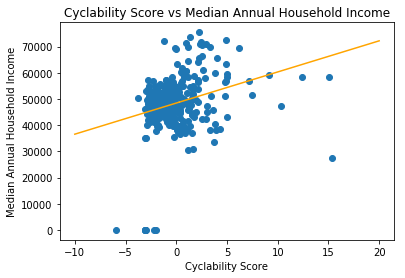

Correlation score: 0.2753092042986492


In [ ]:
graph(z_list,income_list,"Cyclability Score vs Median Annual Household Income","Cyclability Score","Median Annual Household Income")
fit(z_list,income_list)
plt.show()

income_cor = numpy.corrcoef(z_list, income_list)[0, 1]
print("Correlation score: " + str(income_cor))

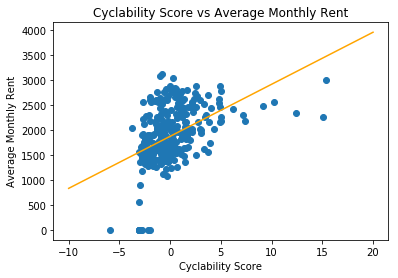

Correlation score: 0.45520124152783603


In [ ]:
graph(z_list,rent_list,"Cyclability Score vs Average Monthly Rent","Cyclability Score","Average Monthly Rent")
fit(z_list,rent_list)
plt.show()

rent_cor = numpy.corrcoef(z_list, rent_list)[0, 1]
print("Correlation score: " + str(rent_cor))

## Plotting scatterplots to analyse the correlation of Z scores with population and number of dwellings in each area.

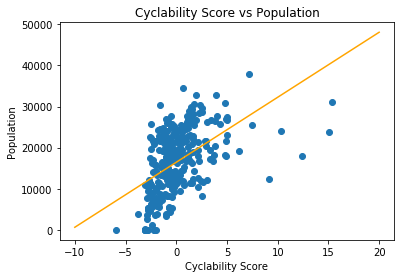

Correlation score: 0.5190944547895076


In [ ]:
query = "SELECT * FROM Neighbourhoods;"
result= pgquery(conn, query, returntype='dict')

population_list = []
z_list = []
for row in result:
    if row['population'] is None:
        row['population'] = 0
    if row['z_score'] is None:
        row['z_score'] = 0
    population_list.append(row['population'])
    z_list.append(row['z_score'])

graph(z_list,population_list,"Cyclability Score vs Population","Cyclability Score","Population")
fit(z_list,population_list)
plt.show()

pop_cor = numpy.corrcoef(z_list, population_list)[0, 1]
print("Correlation score: " + str(pop_cor))

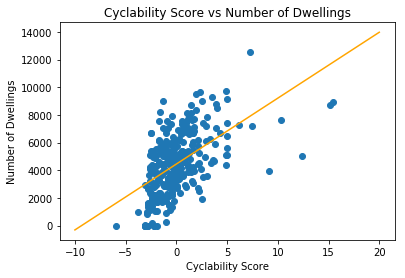

Correlation score: 0.5507596069796865


In [ ]:
query = "SELECT * FROM Neighbourhoods;"
result= pgquery(conn, query, returntype='dict')

dwell_list = []
z_list = []
bus_list = []
for row in result:
    if row['number_of_dwellings'] is None:
        row['number_of_dwellings'] = 0
    if row['number_of_businesses'] is None:
        row['number_of_businesses'] = 0
    if row['z_score'] is None:
        row['z_score'] = 0
    dwell_list.append(row['number_of_dwellings'])
    bus_list.append(row['number_of_businesses'])
    z_list.append(row['z_score'])

graph(z_list,dwell_list,"Cyclability Score vs Number of Dwellings","Cyclability Score","Number of Dwellings")
fit(z_list,dwell_list)
plt.show()

dwell_cor = numpy.corrcoef(z_list, dwell_list)[0, 1]
print("Correlation score: " + str(dwell_cor))

## Plotting scatterplot to show the relationship between population, number of dwellings and Z scores for each area.

In [ ]:
import seaborn as sns
def plot(x,y,z):
    fig, ax = plt.subplots()
    scat = ax.scatter(x, y, c=z, s=50, marker='o')
    return fig.colorbar(scat)

In [ ]:
query = "SELECT * FROM Neighbourhoods;"
result= pgquery(conn, query, returntype='dict')

dwell_list = []
z_list = []
bus_list = []
for row in result:
    if row['number_of_dwellings'] is None:
        row['number_of_dwellings'] = 0
    if row['number_of_businesses'] is None:
        row['number_of_businesses'] = 0
    if row['z_score'] is None:
        row['z_score'] = 0
    if not row['number_of_businesses'] > 35000:
        dwell_list.append(row['number_of_dwellings'])
        bus_list.append(row['number_of_businesses'])
        z_list.append(row['z_score'])

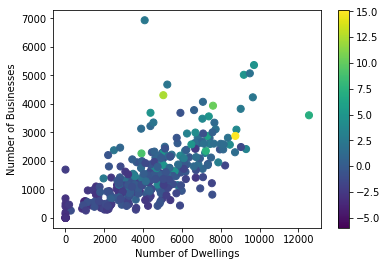

Correlation score: 0.6994568734048553


In [ ]:
plot(dwell_list,bus_list, z_list)
plt.xlabel("Number of Dwellings")
plt.ylabel("Number of Businesses")
plt.show()
bus_cor = numpy.corrcoef(bus_list, dwell_list)[0, 1]
print("Correlation score: " + str(bus_cor))

## Attempt to create a map display of traffic density
The following code blocks were an attempt to merge the first two map displays into one in order to represent traffic density in Greater Sydney. However, the merged map display fails to display the density correctly as the scale of the maps used in the two shapefiles were different. The EPSG code was changed but the scale still remained unchanged, thus this attempt to display the traffic density on a map was a failure.

In [ ]:
import geopandas as gpd

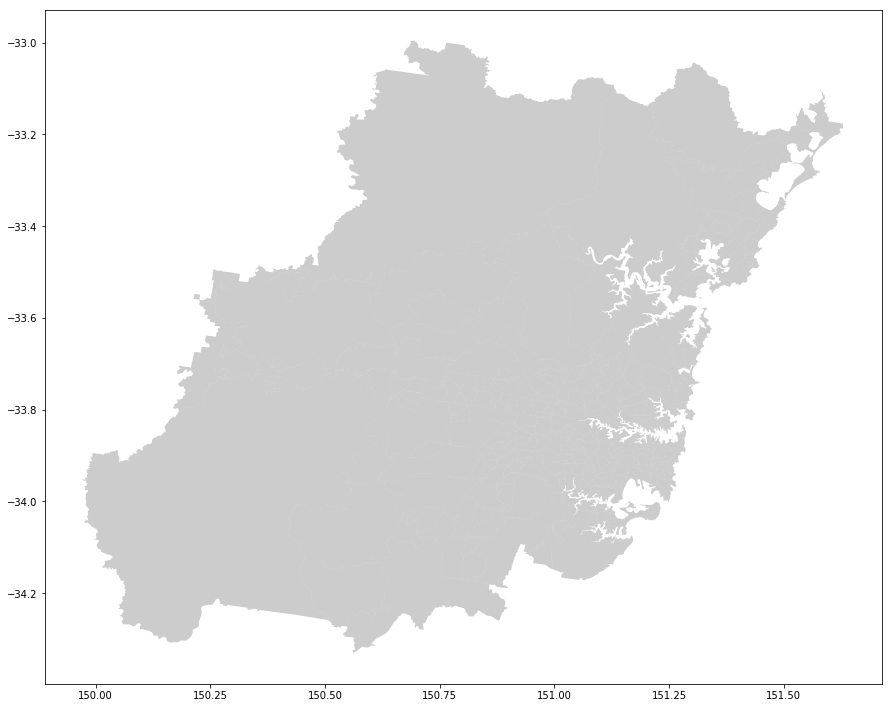

In [ ]:
map_diagram = gpd.read_file('SA2_2016_AUST.shp')
fig,ax = plt.subplots(figsize = (15,15))
map_diagramNSW = map_diagram[(map_diagram.GCC_NAME16 == "Greater Sydney")]
map_diagramNSW.plot(ax=ax,alpha = 0.4, color = "grey")
plt.show()
plt.ion()

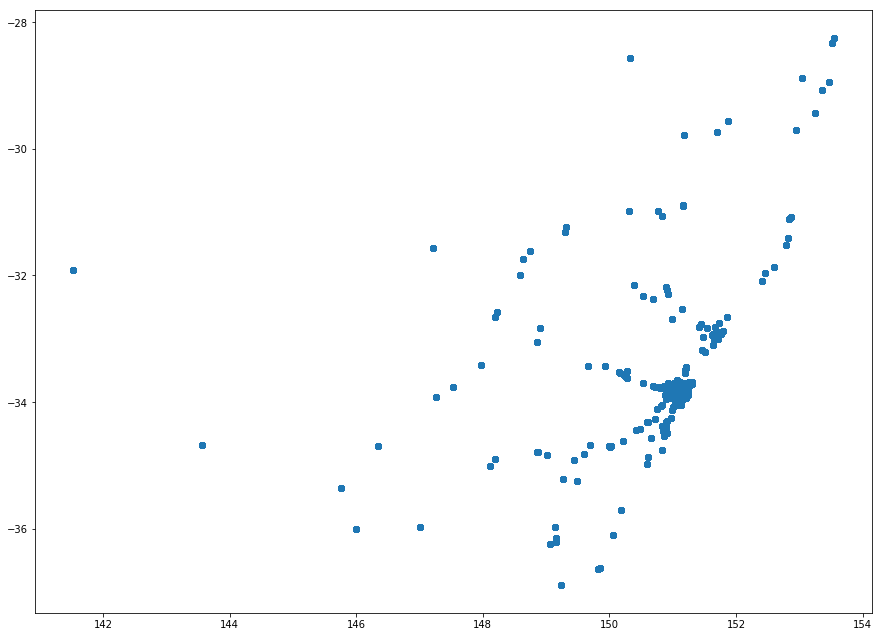

In [ ]:
traffic_diagram = gpd.read_file('Traffic_Volume_Viewer_-_2017_Data.shp')
fig,ax = plt.subplots(figsize = (15,15))
traffic_diagram.plot(ax=ax)
plt.show()
plt.ion()

In [ ]:
data_proj = traffic_diagram.copy()
data_proj['geometry'] = data_proj['geometry'].to_crs(epsg=4283)

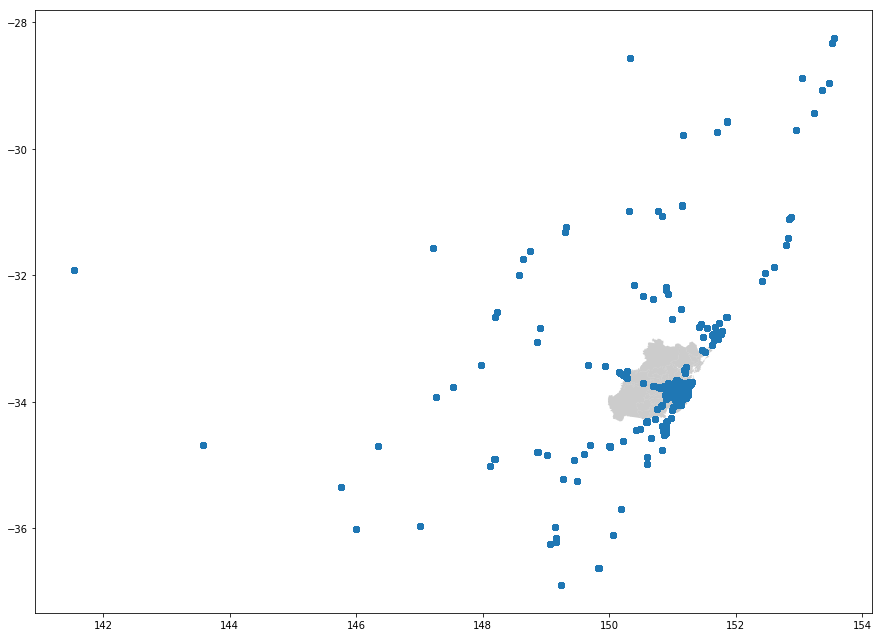

In [ ]:
fig,ax = plt.subplots(figsize = (15,15))
map_diagramNSW.plot(ax=ax, alpha = 0.4, color="grey")
data_proj.plot(ax=ax)
plt.show()